In [1]:
import numpy as np
import scipy.io
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as st
import seaborn as sb
import scipy.stats as stats
from sklearn.metrics import roc_auc_score as auROC
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as ms
import random
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MaxNLocator
import psutil
import multiprocessing



In [101]:
import matplotlib as mpl
plt.rcParams['font.family'] = 'Liberation Sans'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['text.color'] = 'black'

In [3]:
base_dir = './extracted_data/Calcium/'


FR = 20
CueN = 12
BinSize = 6
TimeRange_before = 10
TimeRange_after = 10
Baseline_range = 10
Cueduration = 30
CompareRange_base = 0.5
CompareRange_after = 1.5

FrameRange_before = int(FR*TimeRange_before)
FrameRange_after = int(FR*TimeRange_after)
FrameRange_baseline = int(FR*Baseline_range)
TotalFrame = int(FrameRange_before+FrameRange_after)
Bins = int(TotalFrame/BinSize)
Bins_before = int(FrameRange_before/BinSize)
Baseline_bins = Bins_before - int(FrameRange_baseline/BinSize)
Bins_cueend = Bins_before+int(FR*Cueduration/BinSize)

In [4]:
TotalFrame

400

In [5]:
Baseline_bins

0

In [6]:
Bins_before

33

In [7]:
os.listdir(base_dir)

['6S5.pkl',
 '2Z4.pkl',
 '2N6.pkl',
 '4B6.pkl',
 '7H6.pkl',
 '1I5.pkl',
 '1H6.pkl',
 '7B6.pkl',
 '5B6.pkl',
 '4N6.pkl',
 '6M6.pkl',
 '2I5.pkl',
 '1S5.pkl',
 '9M6.pkl',
 '1B6.pkl',
 '2S5.pkl',
 '7M6.pkl',
 '6H6.pkl',
 '8H6.pkl']

In [8]:
def read_pkl_files(base_dir):
    dataframes = []
    pkl_files = [file for file in os.listdir(base_dir) if file.endswith('.pkl')]

    for pkl_file in pkl_files:
        file_path = os.path.join(base_dir, pkl_file)
        df = pd.read_pickle(file_path)

        # Reset index and use the original index as 'cell_id'
        df.reset_index(inplace=True)
        df.rename(columns={'index': 'cell_id'}, inplace=True)
        
        # Extract animal ID from filename (assuming format 'AnimalID.pkl')
        animal_id = pkl_file.split('.')[0]
        
        # Add animal ID as a new column
        df['Animal_ID'] = animal_id

        # Reorder columns to make 'Animal_ID' front
        columns = ['Animal_ID', 'cell_id'] + [col for col in df.columns if col not in ['Animal_ID', 'cell_id']]
        df = df[columns]

        dataframes.append(df)

    return dataframes

all_dataframes = read_pkl_files(base_dir)


In [9]:
all_dataframes

[   Animal_ID                  cell_id         0    1    2        3         4  \
 0        6S5                        1  0.000000  0.0  0.0  0.00000  0.000000   
 1        6S5                        2  0.000000  0.0  0.0  0.00000  0.000000   
 2        6S5                        3  0.000000  0.0  0.0  0.00000  0.000000   
 3        6S5                        4  0.000000  0.0  0.0  0.00000  0.000000   
 4        6S5                        5  0.000000  0.0  0.0  0.00000  0.000000   
 ..       ...                      ...       ...  ...  ...      ...       ...   
 60       6S5                 Freezing  0.000000  0.0  0.0  0.00000  0.000000   
 61       6S5             In Food Area  1.000000  1.0  1.0  1.00000  1.000000   
 62       6S5         Bar Press active  0.000000  0.0  0.0  0.00000  0.000000   
 63       6S5  Miniscope record active  0.595041  1.0  0.3  0.96875  0.056604   
 64       6S5              Tone active  0.000000  0.0  0.0  0.00000  0.000000   
 
            5    6    7  .

In [10]:
all_dataframes[1].iloc[-10:,:]

Animal_ID                  cell_id         0       1         2         3  \
136       2Z4                      195  0.000000  0.0000  0.000000  0.000000   
137       2Z4                      196  0.000000  0.0000  0.000000  0.000000   
138       2Z4                      197  0.000000  0.0000  0.000000  0.000000   
139       2Z4                 Time (s) -0.032000  0.0260  0.069000  0.123000   
140       2Z4              Speed (m/s)  0.008000  0.0080  0.007000  0.007000   
141       2Z4                 Freezing  0.000000  0.0000  0.000000  0.000000   
142       2Z4             In Food Area  0.000000  0.0000  0.000000  0.000000   
143       2Z4         Bar Press active  0.000000  0.0000  0.000000  0.000000   
144       2Z4  Miniscope record active  0.644444  0.1875  0.469697  0.366667   
145       2Z4              Tone active  0.000000  0.0000  0.000000  0.000000   

            4       5         6         7  ...        29926        29927  \
136  0.000000  0.0000  0.000000  0.000000  ...     0.490338     0.485304   
137  0.000000  0.0000  0.000000  0.000000  ...    13.940576    13.824756   
138  0.000000  0.0000  0.000000  0.000000  ...    57.088811    56.704332   
139  0.169000  0.2200  0.272000  0.322000  ...  4529.497000  4529.550000   
140  0.005542  0.0050  0.005000  0.005000  ...     0.043000     0.043000   
141  0.000000  0.0000  0.000000  0.000000  ...     0.000000     0.000000   
142  0.000000  0.0000  0.000000  0.000000  ...     1.000000     1.000000   
143  0.000000  0.0000  0.000000  0.000000  ...     0.000000     0.000000   
144  0.000000  0.4375  0.535211  0.451613  ...     0.652778     0.090909   
145  0.000000  0.0000  0.000000  0.000000  ...     0.000000     0.000000   

           29928         29929        29930        29931        29932  \
136     0.480322  4.753908e-01     0.470510     0.465680     0.460899   
137    13.709898  1.359599e+01    13.483038    13.371019    13.259931   
138    56.322442  5.594312e+01    55.566362    55.192136    54.820431   
139  4529.601000  4.529650e+03  4529.701000  4529.752000  4529.801000   
140     0.043000  4.300000e-02     0.040000     0.040000     0.030208   
141     0.000000  0.000000e+00     0.000000     0.000000     0.000000   
142     1.000000  1.000000e+00     1.000000     1.000000     1.000000   
143     0.000000  0.000000e+00     0.000000     0.000000     0.000000   
144     0.710145  3.136202e-11     0.656250     0.064516     0.000000   
145     0.000000  0.000000e+00     0.000000     0.000000     0.000000   

           29933        29934        29935  
136     0.456167     0.451484     0.446849  
137    13.149766    13.040516    12.932174  
138    54.451229    54.084514    53.720268  
139  4529.852000  4529.854000  4529.854000  
140     0.030000     0.030000     0.030000  
141     0.000000     0.000000     0.000000  
142     1.000000     1.000000     1.000000  
143     0.000000     0.000000     0.000000  
144     0.071429     0.000000     0.000000  
145     0.000000     0.000000     0.000000  

[10 rows x 29938 columns]

# This section analyze all cells recorded in hungry or satiated session

In [11]:
def calculate_traces_zscore(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=None):
    # Identifying cue onsets
    cue = df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()
    cueonset = np.array(np.where(np.diff(np.concatenate(([0], cue > 0))) > 0)[0])
    if cue_range is not None:
        # Select a subset of cueonset based on cue_range
        if cue_range>0:
            cueonset = cueonset[:cue_range]
        elif cue_range<0:
            cueonset = cueonset[cue_range:]
            
    # Select rows where 'cell_id' is numeric and columns from the third column onwards
    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
#     trace = trace.sub(trace.mean(axis = 1), axis = 0).divide(trace.std(axis = 1), axis = 0)

    tracenew = pd.DataFrame(0, index=trace.index, columns=np.arange(TotalFrame))

    # Aligning traces based on cue onset
    for i in range(TotalFrame):
        start = cueonset - FrameRange_before + i
        valid_starts = start[start >= 0]  # Ensure start is not negative
        tracenew.iloc[:, i] = trace.iloc[:, valid_starts].mean(axis=1)

    # Bin the traces
    tracebin = tracenew.groupby(pd.cut(tracenew.columns, Bins), axis=1).mean()
    tracebin.columns = np.arange(0, Bins)
    
    # Calculate the mean and std, handle the situation of 0 std
    mean_vals = tracebin.iloc[:, Baseline_bins:Bins_before].mean(axis=1)
    std_vals = tracebin.iloc[:, Baseline_bins:Bins_before].std(axis=1)
    
    # Create a mask where the mean is < 0.001 or std is < 0.001
    low_variance_mask = (std_vals < 0.001) #(mean_vals < 0.001) | (std_vals < 0.001)
    
    # Replace std values that are 0 with NaN, as well as where the mean is < 0.001
    std_vals_replaced = std_vals.mask(low_variance_mask, np.nan)
    
    # Calculate z-scores, NaN will result in the z-scores where std is zero
    tracezscore = tracebin.sub(mean_vals, axis=0).divide(std_vals_replaced, axis=0)
    
    # Replace NaN z-scores with 0, as these are the ones with std of 0
    tracezscore = tracezscore.fillna(0)

    return tracebin, tracezscore


In [12]:
hungrycue = 12

# Create a list to hold the dataframes
trace_hungry_list = []
trace_hungry_list_c = []

# Loop through each animal's DataFrame
for df in all_dataframes:
    animal_id = df['Animal_ID'].iloc[0]  # Extract animal ID
    cell_ids = df['cell_id']  # Extract cell IDs

    tracebin, tracesub = calculate_traces_zscore(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=hungrycue)
    tracesub['Animal_ID'] = animal_id  # Add animal ID
    tracesub['cell_id'] = cell_ids  # Add cell IDs
    tracebin['Animal_ID'] = animal_id  # Add animal ID
    tracebin['cell_id'] = cell_ids  # Add cell IDs
    
    # Reorder columns to make 'Animal_ID' front
    columns = ['Animal_ID', 'cell_id'] + [col for col in tracesub.columns if col not in ['Animal_ID', 'cell_id']]
    tracesub = tracesub[columns]
    columns = ['Animal_ID', 'cell_id'] + [col for col in tracebin.columns if col not in ['Animal_ID', 'cell_id']]
    tracebin = tracebin[columns]
    
    trace_hungry_list.append(tracesub)
    trace_hungry_list_c.append(tracebin)

# Concatenate all dataframes in the list
trace_hungry = pd.concat(trace_hungry_list, ignore_index=True)
trace_hungry_c = pd.concat(trace_hungry_list_c, ignore_index=True)




In [13]:
satiatedcue = -12

# Create a list to hold the dataframes
trace_satiated_list = []
trace_satiated_list_c = []

# Loop through each animal's DataFrame
for df in all_dataframes:
    animal_id = df['Animal_ID'].iloc[0]  # Extract animal ID
    cell_ids = df['cell_id']  # Extract cell IDs

    tracebin, tracesub = calculate_traces_zscore(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=satiatedcue)
    tracesub['Animal_ID'] = animal_id  # Add animal ID
    tracesub['cell_id'] = cell_ids  # Add cell IDs
    tracebin['Animal_ID'] = animal_id  # Add animal ID
    tracebin['cell_id'] = cell_ids  # Add cell IDs
    
    # Reorder columns to make 'Animal_ID' front
    columns = ['Animal_ID', 'cell_id'] + [col for col in tracesub.columns if col not in ['Animal_ID', 'cell_id']]
    tracesub = tracesub[columns]
    columns = ['Animal_ID', 'cell_id'] + [col for col in tracebin.columns if col not in ['Animal_ID', 'cell_id']]
    tracebin = tracebin[columns]
    
    trace_satiated_list.append(tracesub)
    trace_satiated_list_c.append(tracebin)

# Concatenate all dataframes in the list
trace_satiated = pd.concat(trace_satiated_list, ignore_index=True)
trace_satiated_c = pd.concat(trace_satiated_list_c, ignore_index=True)



In [14]:
trace_hungry

Animal_ID cell_id         0         1         2         3         4  \
0          6S5       1 -0.974356 -1.036490 -1.091343 -1.143929 -1.194341   
1          6S5       2  1.300211  1.074195  0.573979  0.110636 -0.240893   
2          6S5       3  1.162811  1.060209  0.978639  0.825957  0.676933   
3          6S5       4  0.552738  0.341283  0.095955 -0.134774 -0.351774   
4          6S5       5  0.105960  0.052360 -0.021338 -0.186413 -0.425214   
...        ...     ...       ...       ...       ...       ...       ...   
1106       8H6      63 -1.010739 -1.068321 -1.116711 -1.160988 -1.201501   
1107       8H6      71 -0.577090 -0.675036 -0.758042 -0.834600 -0.905210   
1108       8H6      73  0.000000  0.000000  0.000000  0.000000  0.000000   
1109       8H6      75  2.538170  1.966359  1.517038  1.131163  0.799775   
1110       8H6      97  0.000000  0.000000  0.000000  0.000000  0.000000   

             5         6         7  ...         56         57         58  \
0    -1.242669 -1.269454 -1.306804  ...  -0.266947  -0.308855  -0.352319   
1    -0.488262 -0.867709 -0.848311  ...   2.944911   2.857944   2.584875   
2     1.006085  1.231004  1.353798  ...  16.338843  15.991282  15.647480   
3    -0.174224 -0.388876 -0.358703  ...   8.961927   8.230150   7.515375   
4    -0.617182 -0.695160 -0.699846  ...  -2.267180  -2.236629  -1.877391   
...        ...       ...       ...  ...        ...        ...        ...   
1106 -1.238571 -0.553179  0.436075  ...  -1.562624  -1.568999  -1.574832   
1107 -0.970334 -1.030398 -1.085797  ...  -1.267579  -1.264059  -1.301304   
1108  0.000000  0.000000  0.000000  ...   0.000000   0.000000   0.000000   
1109  0.515181  0.270773  0.133675  ...   0.838804   0.548699   0.299558   
1110  0.000000  0.000000  0.000000  ...   0.000000   0.000000   0.000000   

             59         60         61         62         63         64  \
0     -0.389579  -0.461036  -0.526811  -0.602732  -0.675516  -0.700053   
1      2.047427   2.060740   2.149064   1.723274   2.655658   3.060550   
2     15.307396  15.011186  14.822836  14.617208  14.510671  14.186479   
3      6.843135   6.210898   5.616283   5.080222   5.604845   6.244997   
4     -1.288693  -1.043495  -1.113494  -1.101320  -1.054556  -1.217426   
...         ...        ...        ...        ...        ...        ...   
1106  -1.580170  -1.585053  -1.589522  -1.593610  -1.597352  -1.600775   
1107  -1.335656  -1.367339  -1.396560  -1.423511  -1.448369  -1.320394   
1108   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1109   0.085598  -0.098151  -0.255953  -0.391473  -0.507857  -0.607806   
1110   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

             65  
0     -0.751454  
1      3.285084  
2     13.835385  
3      7.236901  
4     -1.357268  
...         ...  
1106  -1.604152  
1107  -1.284156  
1108   0.000000  
1109  -0.700043  
1110   0.000000  

[1111 rows x 68 columns]

1111 neurons in Combined


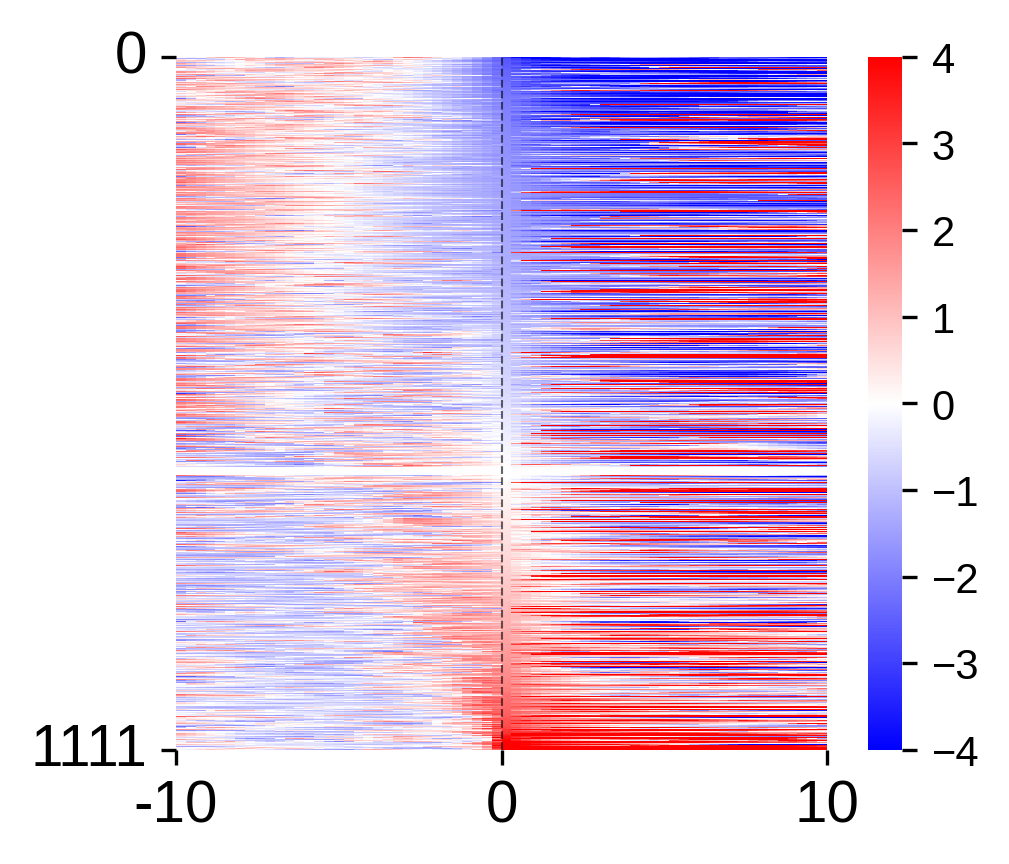

In [15]:
# Sorting and creating the heatmap
tracesorted = trace_hungry.sort_values(by=Bins_before, axis=0)
plt.figure(figsize=(3.5,3), dpi=300)
ax = sb.heatmap(tracesorted.iloc[:, 2:], vmin=-4, vmax=4, cmap="bwr")  # Exclude the last two columns (Animal_ID and cell_id)
ax.set_xticks([0, Bins_before, Bins])
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0, len(tracesorted)])
ax.set_yticklabels([0, len(tracesorted)])
ax.tick_params(labelsize = 14)
ax.axvline(Bins_before, ls = '--', lw = 0.5, c = 'black', alpha = 0.6)
print(f"{len(trace_hungry)} neurons in Combined")

plt.show()

1111 neurons in Combined


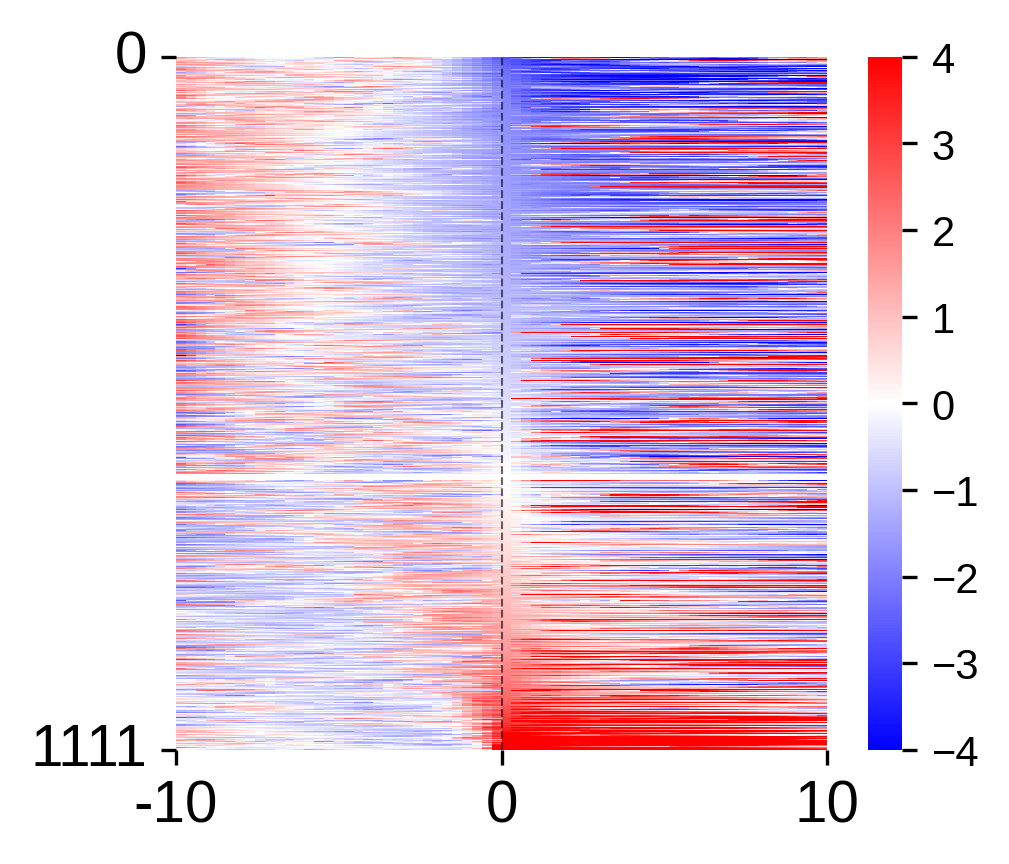

In [16]:
# Sorting and creating the heatmap
tracesorted = trace_satiated.sort_values(by=Bins_before, axis=0)
plt.figure(figsize=(3.5,3), dpi=300)
ax = sb.heatmap(tracesorted.iloc[:, 2:], vmin=-4, vmax=4, cmap="bwr")  # Exclude the last two columns (Animal_ID and cell_id)
ax.set_xticks([0, Bins_before, Bins])
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0, len(tracesorted)])
ax.set_yticklabels([0, len(tracesorted)])
ax.tick_params(labelsize = 14)
ax.axvline(Bins_before, ls = '--', lw = 0.5, c = 'black', alpha = 0.6)
print(f"{len(trace_hungry)} neurons in Combined")

plt.show()

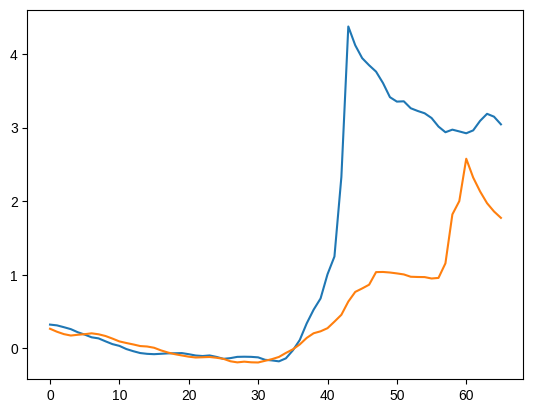

In [17]:
plt.plot(trace_hungry.iloc[:, 2:].mean(axis =0))
plt.plot(trace_satiated.iloc[:, 2:].mean(axis =0))

## auROC 

In [18]:
CompareRange_base = 0.5
CompareRange_after = 1.5

In [91]:
def calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR, cueonset):
    # Define the time window before and after cue onset
    time_before_cue = int(CompareRange_base * FR)
    time_after_cue = int(CompareRange_after * FR)

    # Initialize the binary series for cue onset
    cue_length = time_before_cue + time_after_cue
    cueon_per_cue = [0] * time_before_cue + [1] * time_after_cue
    cueon = cueon_per_cue * len(cueonset)  # Repeat for the number of cues
    
    # Initialize the DataFrame for ROC AUC results with the same index as tracenew_bycue and one column 'auroc'
    roc_aucs = pd.DataFrame(index=tracenew_bycue.index, columns=['auroc'])

    # Calculate the ROC AUC for each neuron
    for neuron_index in tracenew_bycue.index:
        test_neuron = tracenew_bycue.loc[neuron_index, :]
        fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
        roc_auc = auc(fpr, tpr)
        roc_aucs.at[neuron_index, 'auroc'] = roc_auc  # Assign the calculated AUROC value
        
    return roc_aucs


def calculate_traces_auc(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=None):
    # Identifying cue onsets
    cue = df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()
    cueonset = np.array(np.where(np.diff(np.concatenate(([0], cue > 0))) > 0)[0])
    if cue_range is not None:
        # Select a subset of cueonset based on cue_range
        if cue_range>0:
            cueonset = cueonset[:cue_range]
        elif cue_range<0:
            cueonset = cueonset[cue_range:]
    
    # Select rows where 'cell_id' is numeric and columns from the third column onwards
    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
    trace = trace.sub(trace.mean(axis = 1), axis = 0).divide(trace.std(axis = 1), axis = 0)

    
    # Create an empty DataFrame to store concatenated traces for each cell
    total_cue_length = int(CompareRange_base * FR) + int(CompareRange_after * FR)
    tracenew_bycue = pd.DataFrame(index=trace.index, columns=np.arange(total_cue_length * len(cueonset)))

    # Aligning traces based on cue onset and store each trials
    for i, onset in enumerate(cueonset):
            # Calculate the valid start indices for each cue onset
            valid_starts = np.arange(onset - int(CompareRange_base * FR), onset + int(CompareRange_after * FR))
            # Ensure the indices are within the bounds of the trace
            valid_starts = valid_starts[(valid_starts >= 0) & (valid_starts <  len(trace.columns))]

            # Concatenate the trace data around the cue
            tracenew_bycue.iloc[:, i*total_cue_length:(i+1)*total_cue_length] = trace.iloc[:, valid_starts]

    roc_aucs_all = calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR, cueonset)


    return roc_aucs_all


In [20]:
# Create a list to hold the dataframes
trace_hungry_auc_list = []

# Loop through each animal's DataFrame
for df in all_dataframes:
    animal_id = df['Animal_ID'].iloc[0]  # Extract animal ID
    cell_ids = df['cell_id']  # Extract cell IDs
    
    roc_aucs_all = calculate_traces_auc(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=hungrycue)
    roc_aucs_all['Animal_ID'] = animal_id  # Add animal ID
    roc_aucs_all['cell_id'] = cell_ids  # Add cell IDs
    
    # Reorder columns to make 'Animal_ID' front
    columns = ['Animal_ID', 'cell_id'] + [col for col in roc_aucs_all.columns if col not in ['Animal_ID', 'cell_id']]
    roc_aucs_all = roc_aucs_all[columns]
    
    trace_hungry_auc_list.append(roc_aucs_all)
    trace_hungry_list_c.append(tracebin)

# Concatenate all dataframes in the list
trace_hungry_auc = pd.concat(trace_hungry_auc_list, ignore_index=True)


In [21]:
# Identifying cue onsets
df = all_dataframes[11]
cue_range = hungrycue
# Identifying cue onsets
cue = df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()
cueonset = np.array(np.where(np.diff(np.concatenate(([0], cue > 0))) > 0)[0])
if cue_range is not None:
    # Select a subset of cueonset based on cue_range
    if cue_range>0:
        cueonset = cueonset[:cue_range]
    elif cue_range<0:
        cueonset = cueonset[cue_range:]

# Select rows where 'cell_id' is numeric and columns from the third column onwards
trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
trace = trace.sub(trace.mean(axis = 1), axis = 0).divide(trace.std(axis = 1), axis = 0)

tracenew = pd.DataFrame(0, index=trace.index, columns=np.arange(TotalFrame))
# Create an empty DataFrame to store concatenated traces for each cell
total_cue_length = int(CompareRange_base * FR) + int(CompareRange_after * FR)
tracenew_bycue = pd.DataFrame(index=trace.index, columns=np.arange(total_cue_length * len(cueonset)))

# Aligning traces based on cue onset and store each trials
for i, onset in enumerate(cueonset):
        # Calculate the valid start indices for each cue onset
        valid_starts = np.arange(onset - int(CompareRange_base * FR), onset + int(CompareRange_after * FR))
        # Ensure the indices are within the bounds of the trace
        valid_starts = valid_starts[(valid_starts >= 0) & (valid_starts <  len(trace.columns))]
        
        # Concatenate the trace data around the cue
        tracenew_bycue.iloc[:, i*total_cue_length:(i+1)*total_cue_length] = trace.iloc[:, valid_starts]


# Define the time window before and after cue onset
time_before_cue = int(CompareRange_base * FR)
time_after_cue = int(CompareRange_after * FR)

# Initialize the binary series for cue onset
cue_length = time_before_cue + time_after_cue
cueon_per_cue = [0] * time_before_cue + [1] * time_after_cue
cueon = cueon_per_cue * len(cueonset)  # Repeat for the number of cues

In [22]:
test_neuron = tracenew_bycue.iloc[9, :]
fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
roc_auc = auc(fpr, tpr)

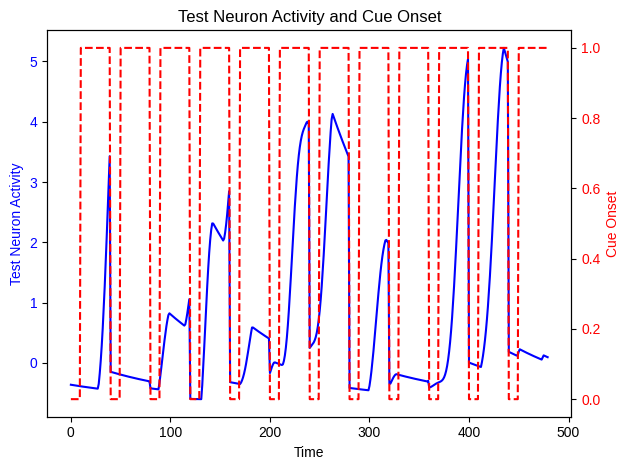

In [23]:
fig, ax1 = plt.subplots()
# Plotting test neuron data
ax1.plot(test_neuron, color='b', label='Test Neuron')
ax1.set_xlabel('Time')
ax1.set_ylabel('Test Neuron Activity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create another axis for the binary cue data
ax2 = ax1.twinx()
ax2.plot(cueon, color='r', linestyle='--', label='Cue Onset')
ax2.set_ylabel('Cue Onset', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Showing the plot
plt.title('Test Neuron Activity and Cue Onset')
fig.tight_layout()
plt.show()

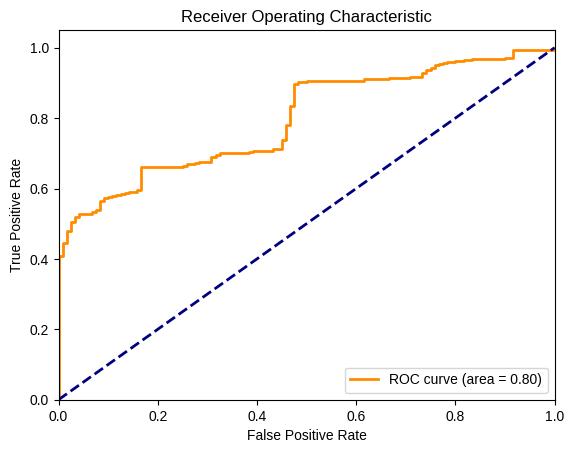

In [24]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


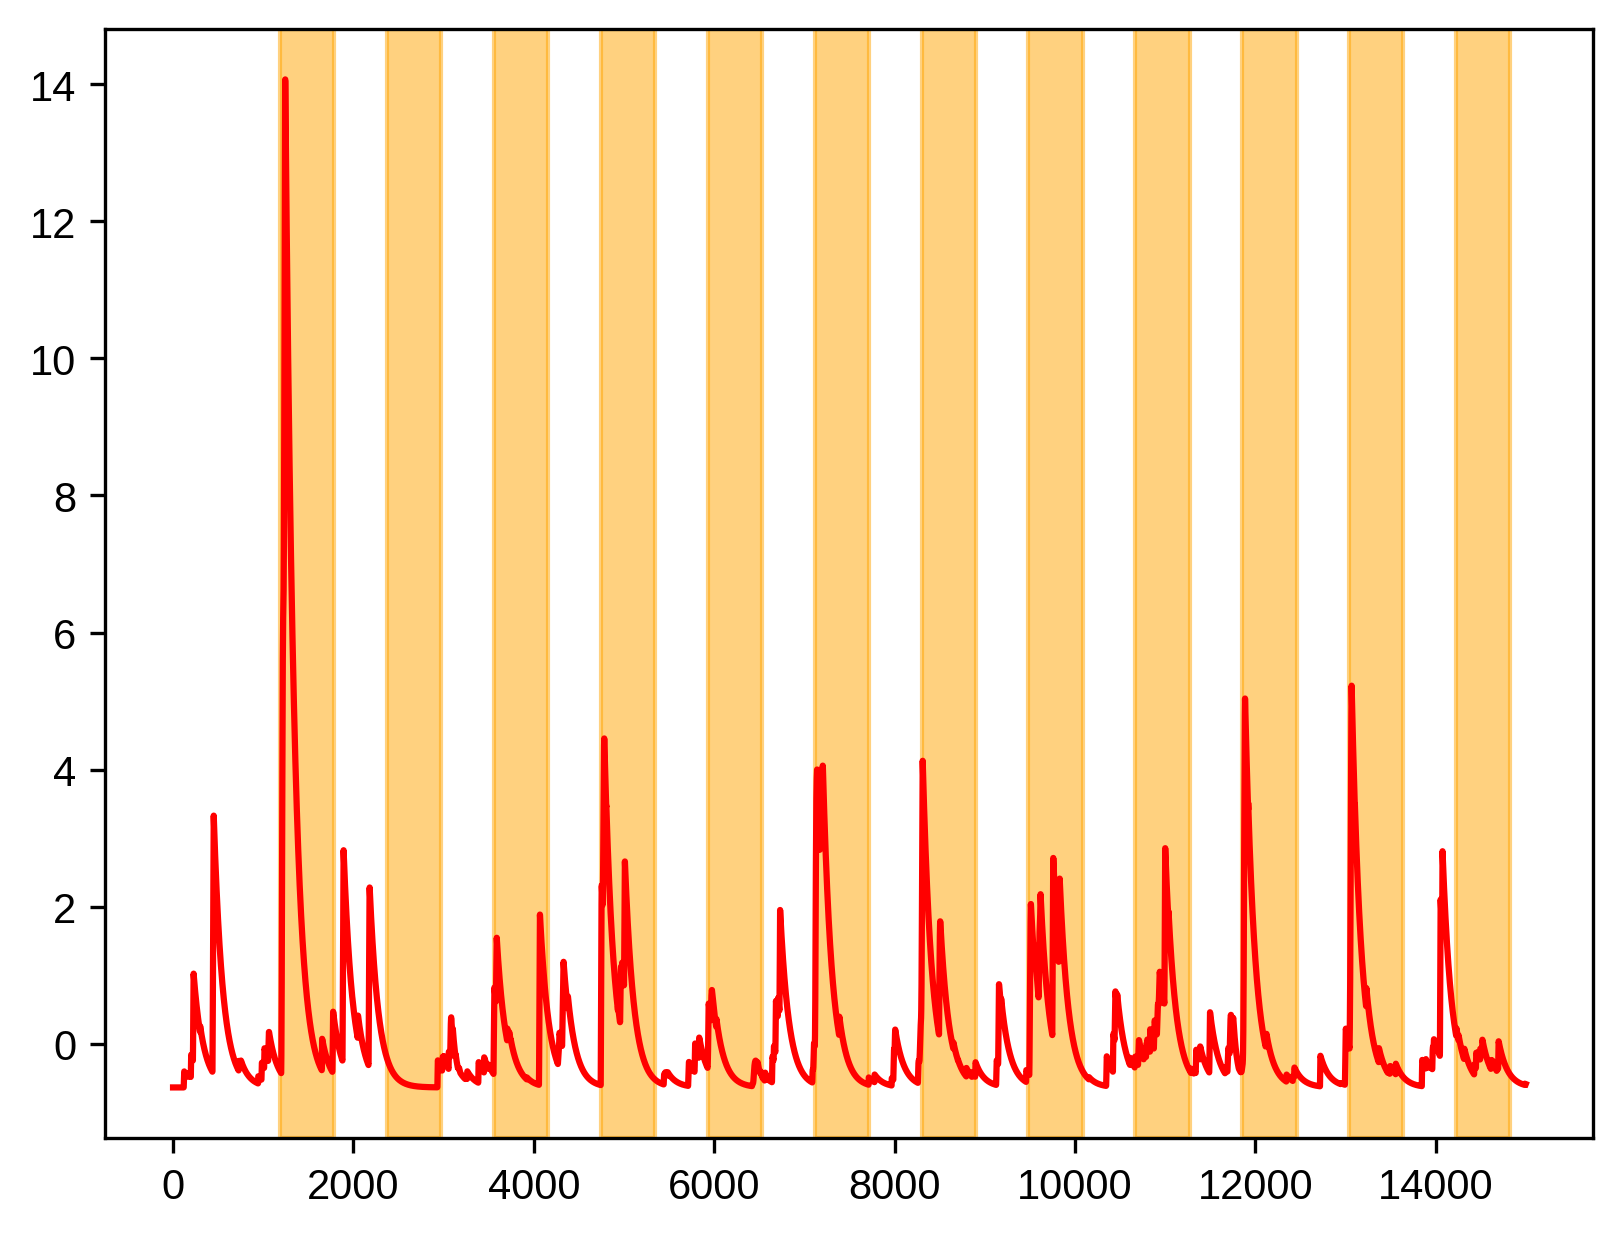

In [25]:
fig, ax = plt.subplots(dpi=300)
ax.plot(trace.iloc[9,:15000], color = 'red') #[(cueonset[5]-3000):(cueonset[5]+3000)]
for i in cueonset:
    ax.axvspan(i, i+30*FR, color = 'Orange', alpha = 0.5)

In [26]:
def calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR):
    # Define the time window before and after cue onset
    time_before_cue = int(CompareRange_base * FR)
    time_after_cue = int(CompareRange_after * FR)

    # Initialize the binary series for cue onset
    cue_length = time_before_cue + time_after_cue
    cueon_per_cue = [0] * time_before_cue + [1] * time_after_cue
    cueon = cueon_per_cue * len(cueonset)  # Repeat for the number of cues
    
    # Initialize the DataFrame for ROC AUC results with the same index as tracenew_bycue and one column 'auroc'
    roc_aucs = pd.DataFrame(index=tracenew_bycue.index, columns=['auroc'])

    # Calculate the ROC AUC for each neuron
    for neuron_index in tracenew_bycue.index:
        test_neuron = tracenew_bycue.loc[neuron_index, :]
        fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
        roc_auc = auc(fpr, tpr)
        roc_aucs.at[neuron_index, 'auroc'] = roc_auc  # Assign the calculated AUROC value
        
    return roc_aucs

def calculate_changes_auc_bycue(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, num_shifts=1000, seed=999):
    random.seed(seed)
    # Identifying cue onsets
    cue = df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()
    cueonset = np.array(np.where(np.diff(np.concatenate(([0], cue > 0))) > 0)[0])
    if cue_range is not None:
        # Select a subset of cueonset based on cue_range
        if cue_range>0:
            cueonset = cueonset[:cue_range]
        elif cue_range<0:
            cueonset = cueonset[cue_range:]
            
    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
    trace = trace.sub(trace.mean(axis=1), axis=0).divide(trace.std(axis=1), axis=0)

    # Initialize a list to store the ROC AUC DataFrames for all shifts
    roc_aucs_list = []

    for j in range(num_shifts):
        shift = random.randint(0, len(trace.columns))
        shifted_trace = np.roll(trace.values, shift, axis=1)

        # Create an empty DataFrame to store concatenated traces for each cell
        total_cue_length = int(CompareRange_base * FR) + int(CompareRange_after * FR)
        tracenew_bycue = pd.DataFrame(index=trace.index, columns=np.arange(total_cue_length * len(cueonset)))

        # Concatenate the trace data around each cue for each shift
        for i, onset in enumerate(cueonset):
            valid_starts = np.arange(onset - int(CompareRange_base * FR), onset + int(CompareRange_after * FR))
            valid_starts = valid_starts[(valid_starts >= 0) & (valid_starts < len(shifted_trace[0]))]
            tracenew_bycue.iloc[:, i * total_cue_length : (i + 1) * total_cue_length] = shifted_trace[:, valid_starts]

        # Calculate the ROC AUC for this shift
        roc_aucs_shift = calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR)
        
        # Append the DataFrame of AUROCs from this shift to the list
        roc_aucs_shift.rename(columns={'auroc': f'Shift_{j}'}, inplace=True)
        roc_aucs_list.append(roc_aucs_shift)

    # Concatenate all DataFrames in the list to a single DataFrame
    roc_aucs_all_shifts = pd.concat(roc_aucs_list, axis=1)

    return roc_aucs_all_shifts


def worker_process_auc(data):
    FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, df = data
    # Call the calculate_changes_auc function with appropriate parameters
    return calculate_changes_auc_bycue(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range)

def parallel_process_and_calculate_change_auc(all_dataframes, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range):
    # Determining the number of processes based on available CPU cores
    num_processes = psutil.cpu_count(logical=False)

    # Create a multiprocessing pool and process data
    pool = multiprocessing.Pool(processes=num_processes)
    results = pool.map(worker_process_auc, [(FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, df) for df in all_dataframes])
    pool.close()
    pool.join()

    # Flatten list of results and convert to DataFrame
    final_df = pd.concat([pd.DataFrame(result) for result in results], ignore_index=True)
    return final_df


# The final_results_df contains the calculated changes for each DataFrame


In [27]:
%%time
change_shift_auc = parallel_process_and_calculate_change_auc(all_dataframes, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=hungrycue)

CPU times: user 1.7 s, sys: 680 ms, total: 2.38 s
Wall time: 2min 16s


<Axes: xlabel='6', ylabel='Count'>

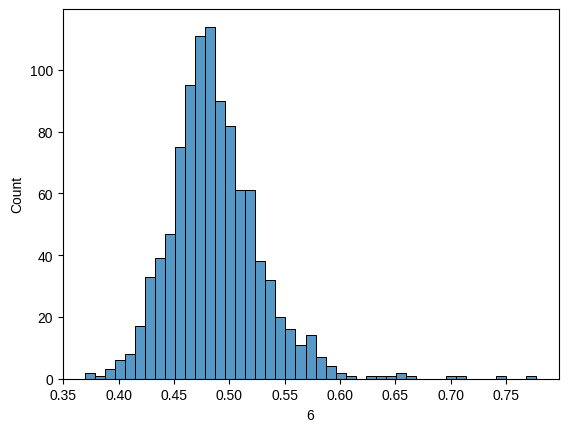

In [28]:
sb.histplot(change_shift_auc.iloc[6])


In [44]:
before_hungry = trace_hungry.iloc[:, (Bins_before - int(CompareRange_base * FR / BinSize)+2) : Bins_before+2]
after_hungry = trace_hungry.iloc[:,Bins_before+2:(Bins_before+int(CompareRange_after*FR/BinSize)+2)]
change_hungry = after_hungry.mean(axis= 1) - before_hungry.mean(axis=1)

change_hungry_auc = trace_hungry_auc.auroc
excited_hungry_auc = pd.DataFrame()
inhibited_hungry_auc = pd.DataFrame()


excited_indices_auc = []
inhibited_indices_auc = []

for i in range(len(trace_hungry)):
    change = change_hungry_auc[i]
    change_dist = change_shift_auc.iloc[i, :]

    if change > np.quantile(change_dist, 0.975): 
        excited_indices_auc.append(i)
    elif change < np.quantile(change_dist, 0.025): 
        inhibited_indices_auc.append(i)

excited_indices_auc = set(excited_indices_auc).intersection(set(np.where(change_hungry>0.5)[0]))
inhibited_indices_auc = set(inhibited_indices_auc).intersection(set(np.where(change_hungry<-0.5)[0]))

# Using .iloc to select rows and then concat to form the final DataFrame
excited_hungry_auc = pd.concat([trace_hungry.iloc[i] for i in excited_indices_auc], axis=1).T
inhibited_hungry_auc = pd.concat([trace_hungry.iloc[i] for i in inhibited_indices_auc], axis=1).T

# excited_hungry_auc = excited_hungry_auc[(excited_hungry_auc.iloc[:,Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]> 0.5).any(axis =1)]
# # excited_hungry_auc = excited_hungry_auc[(excited_hungry_auc.iloc[:,Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]>-1.96).all(axis =1)]
excited_hungry_auc = excited_hungry_auc[(excited_hungry_auc.iloc[:, Bins_before-int(CompareRange_base*FR/BinSize)+2:Bins_before+2]< 1).all(axis =1)]

# inhibited_hungry_auc = inhibited_hungry_auc[(inhibited_hungry_auc.iloc[:, Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]< -0.5).any(axis =1)]
# # inhibited_hungry_auc = inhibited_hungry_auc[(inhibited_hungry_auc.iloc[:, Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]< 1.96).all(axis =1)]
inhibited_hungry_auc = inhibited_hungry_auc[(inhibited_hungry_auc.iloc[:, Bins_before-int(CompareRange_base*FR/BinSize)+2:Bins_before+2]> -1).all(axis =1)]

# excited_hungry_auc = excited_hungry_auc[trace_hungry_auc.iloc[excited_hungry_auc.index.values].auroc>0.55]
# inhibited_hungry_auc = inhibited_hungry_auc[trace_hungry_auc.iloc[inhibited_hungry_auc.index.values].auroc<0.45]

excited_indices_auc = excited_hungry_auc.index.values.tolist()
inhibited_indices_auc = inhibited_hungry_auc.index.values.tolist()

excited_hungry_mean_auc = excited_hungry_auc.iloc[:,2:].mean(axis=0).astype('float')
excited_hungry_sem_auc = excited_hungry_auc.iloc[:,2:].sem(axis=0).astype('float')
inhibited_hungry_mean_auc = inhibited_hungry_auc.iloc[:,2:].mean(axis=0).astype('float')
inhibited_hungry_sem_auc = inhibited_hungry_auc.iloc[:,2:].sem(axis=0).astype('float')


45

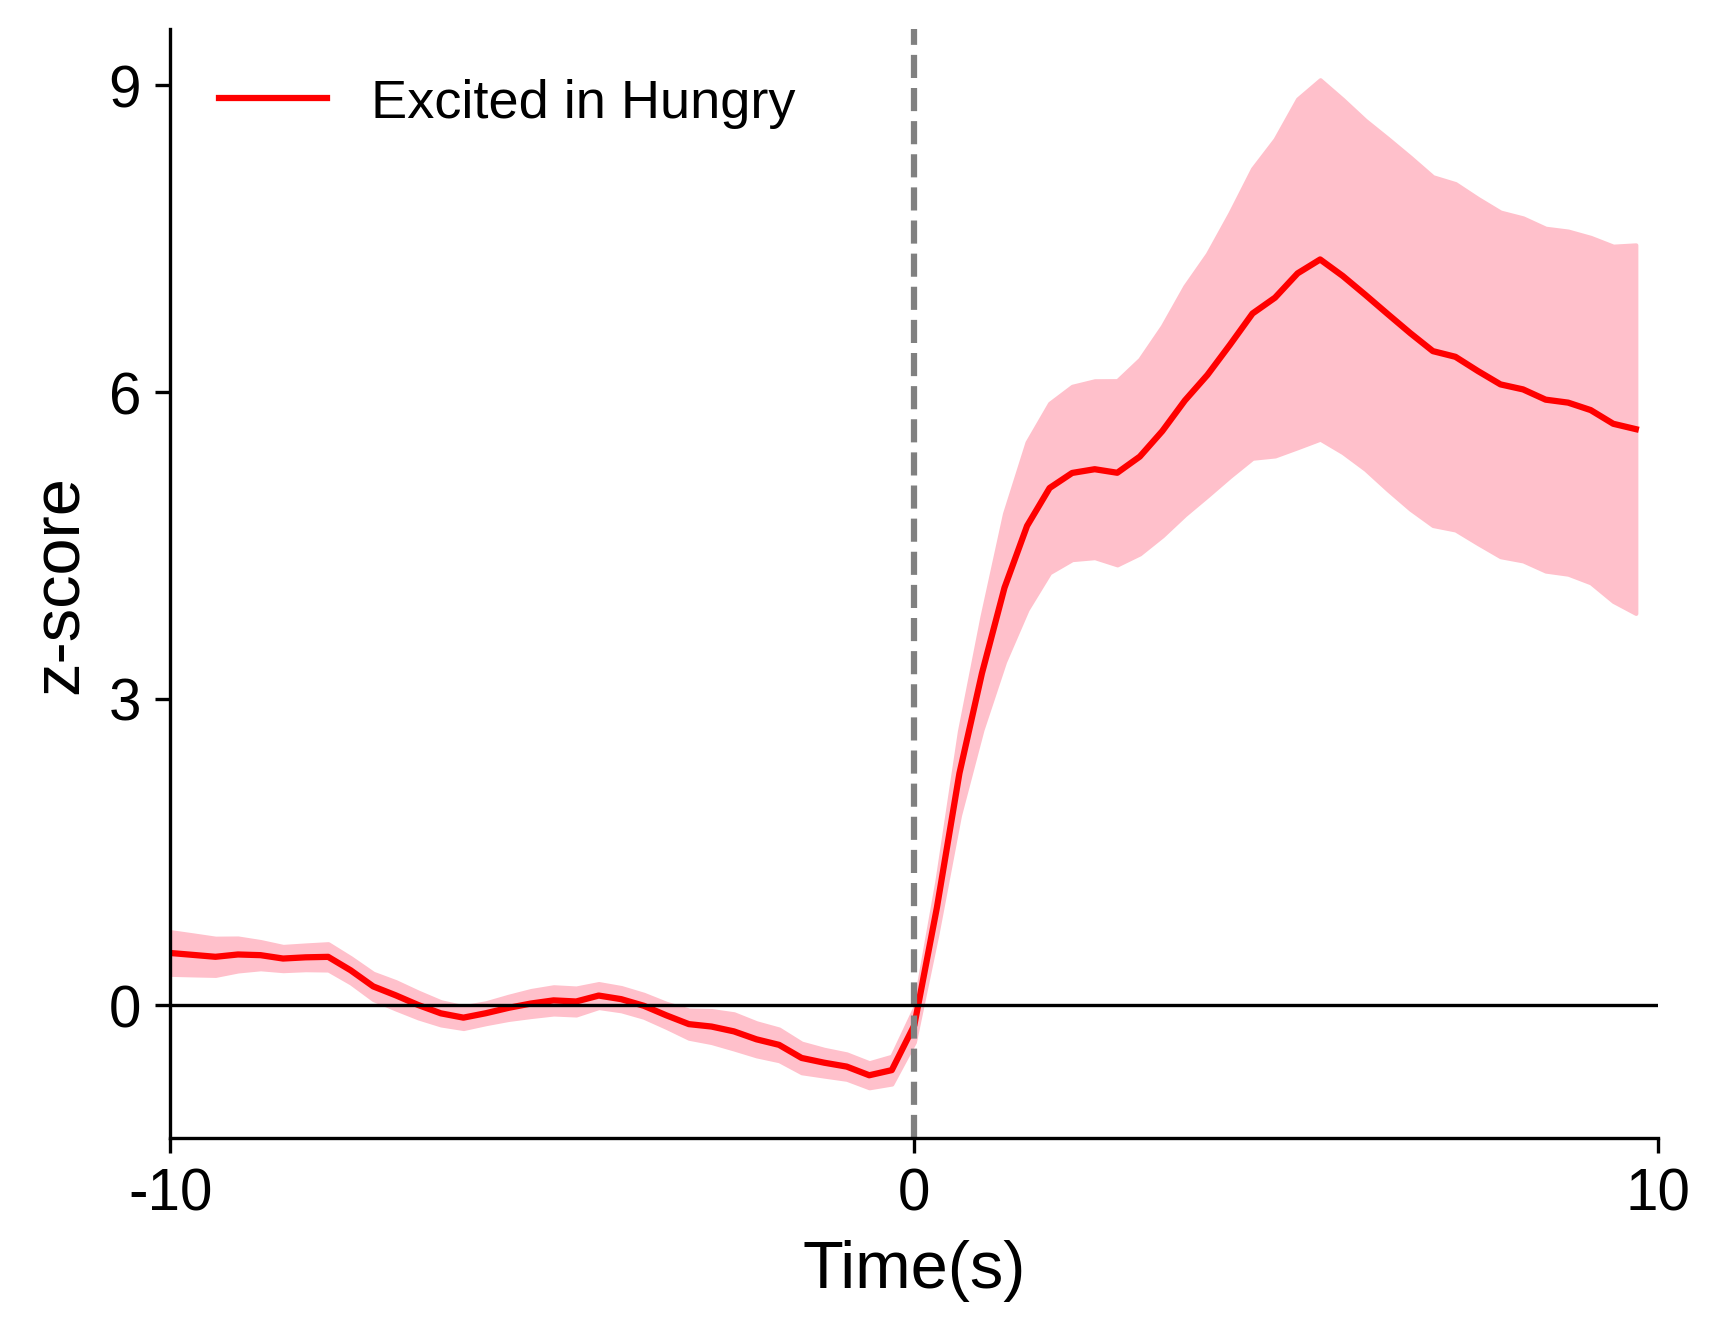

In [45]:
x=np.arange(Bins)
y=excited_hungry_mean_auc
err = excited_hungry_sem_auc
fig, ax = plt.subplots(dpi = 300)
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.fill_between(x, y-err, y+err, color='pink')
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.tick_params(labelsize = 14)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.set_xticks([0,Bins_before,Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.axvline(Bins_before, color = 'grey', ls = '--')
ax.axhline(0, color = 'black', ls = '-', lw = 0.8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 2, framealpha = 0, fontsize='13')
len(excited_hungry_auc)

21

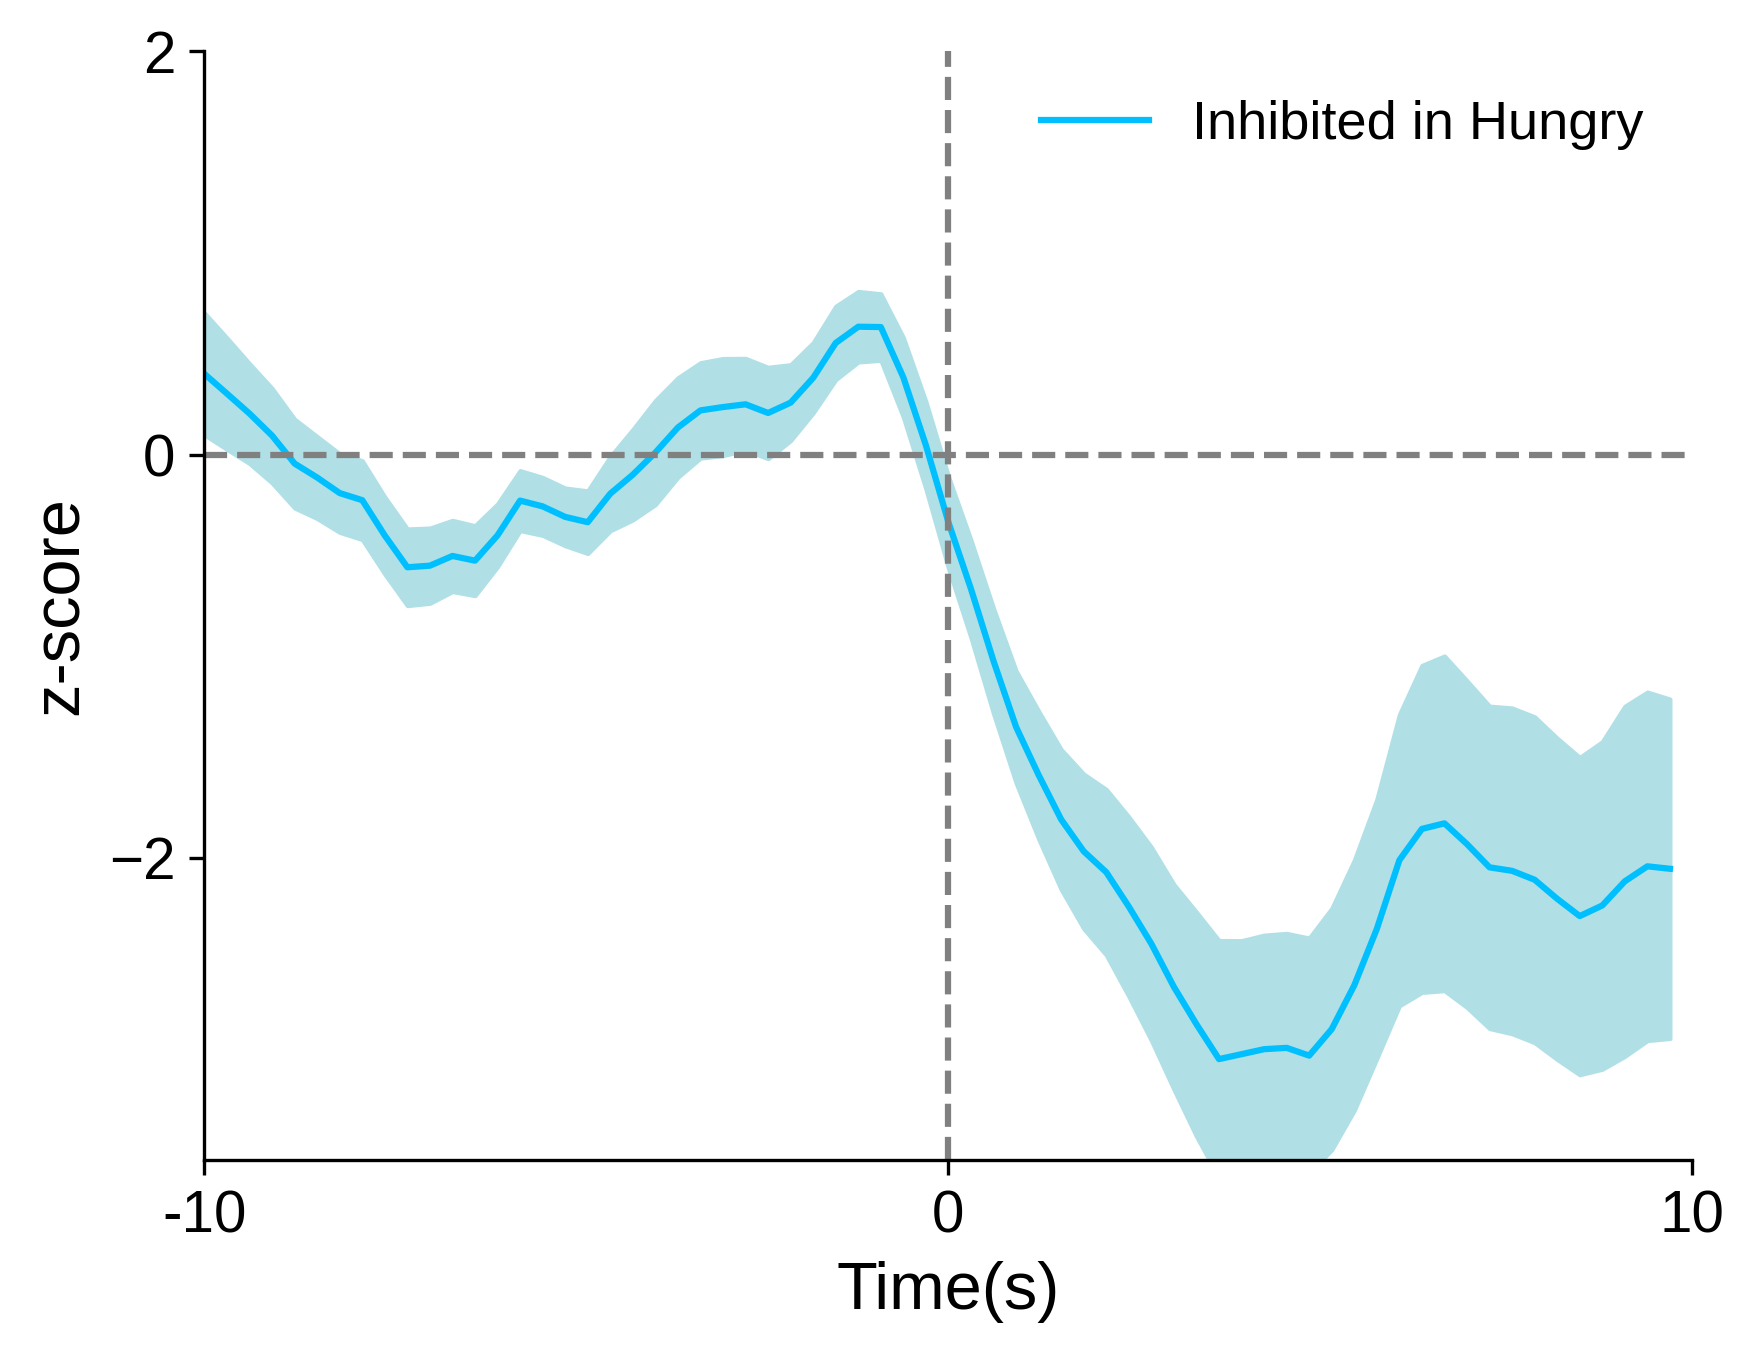

In [46]:
x=np.arange(Bins)
y=inhibited_hungry_mean_auc
err = inhibited_hungry_sem_auc
fig, ax = plt.subplots(dpi = 300)
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue', linestyle = '-')
ax.fill_between(x, y-err, y+err, color='powderblue')
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.tick_params(labelsize = 14)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.set_xticks([0, Bins_before,Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-3.5,2)
ax.axvline(Bins_before, color = 'grey', ls = '--')
ax.axhline(0, color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry_auc)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


45

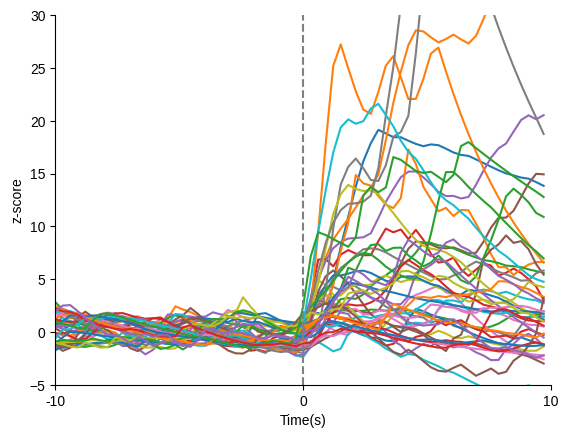

In [47]:
x=np.arange(Bins)
y=excited_hungry_auc.iloc[:,2:]
fig, ax = plt.subplots()
for i in range(len(y)):
    ax.plot(x, y.iloc[i,:])
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-5,30)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry_auc)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


21

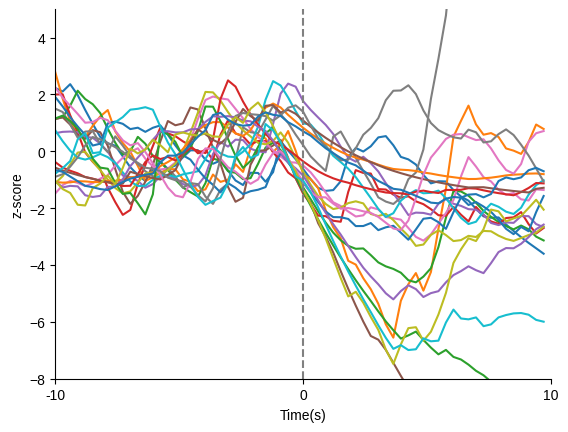

In [48]:
x=np.arange(Bins)
y=inhibited_hungry_auc.iloc[:,2:]
err = inhibited_hungry_sem_auc
fig, ax = plt.subplots()
for i in range(len(y)):
    ax.plot(x, y.iloc[i,:])
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-8,5)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry_auc)

[Text(0, 0, '0'), Text(0, 21, '21')]

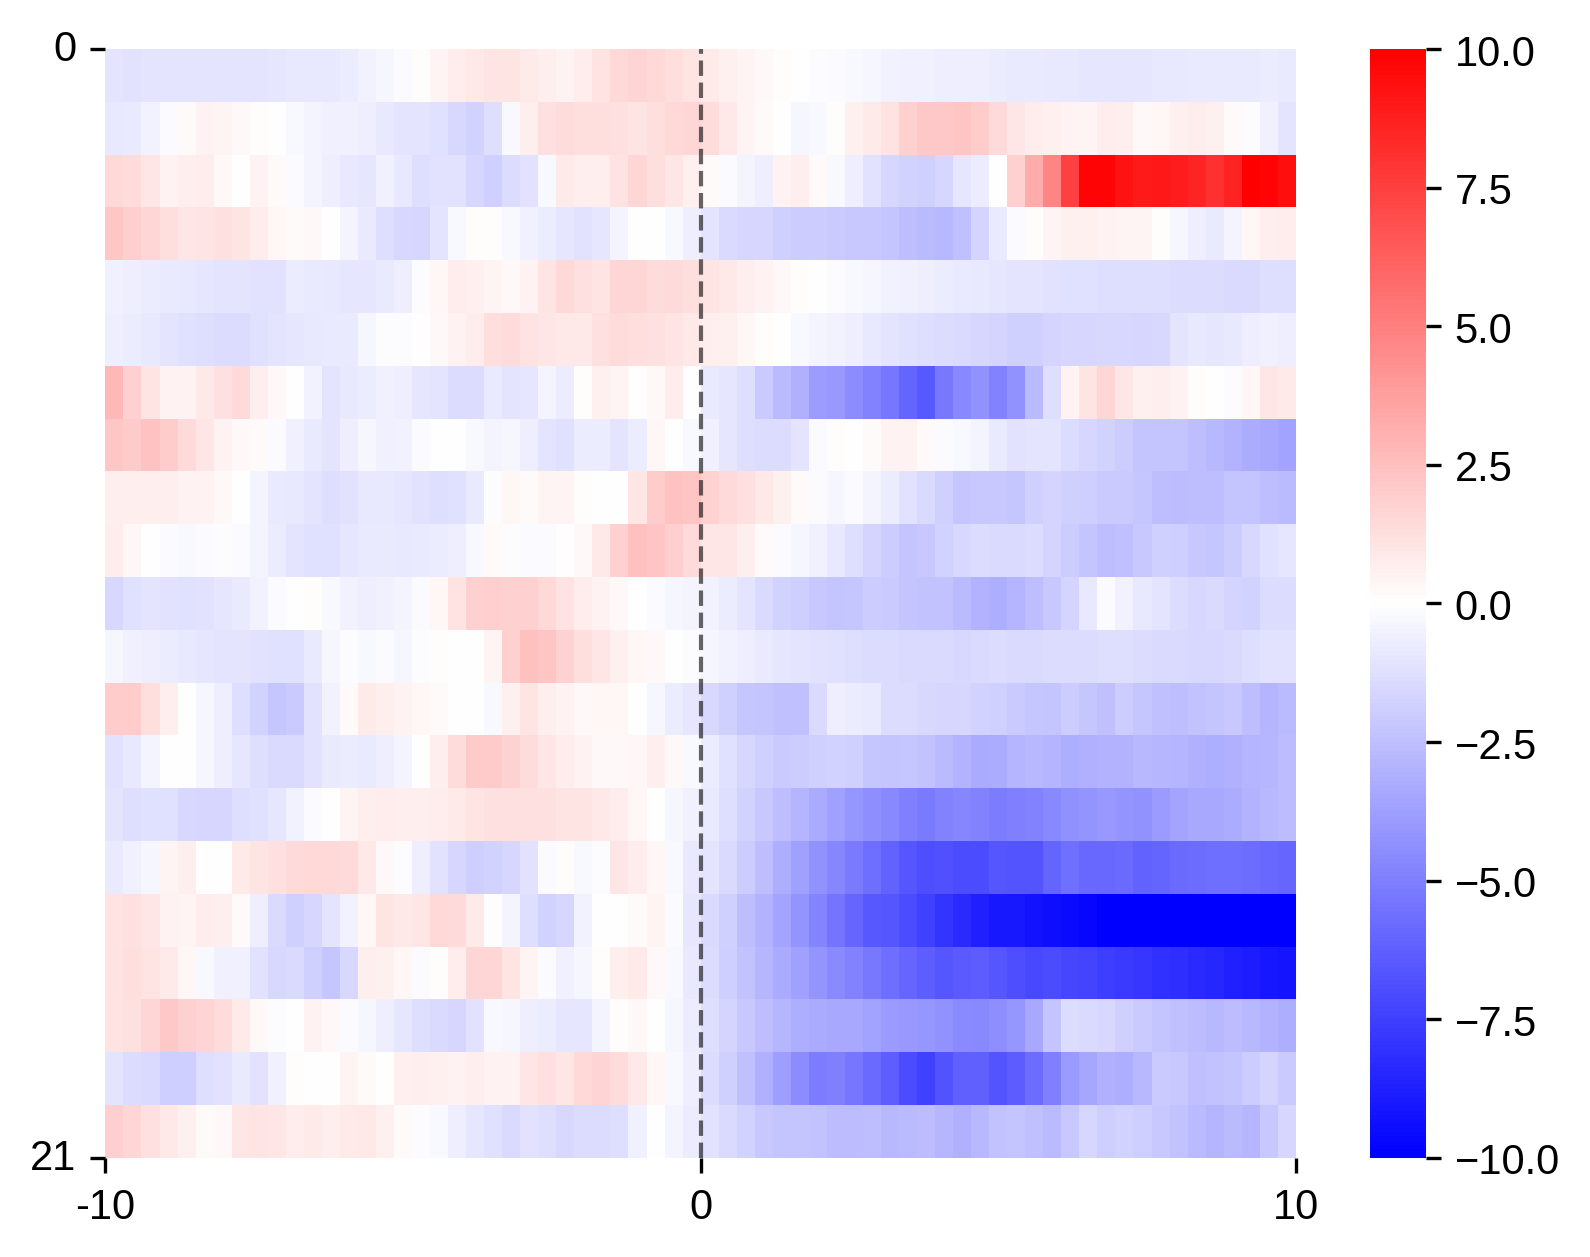

In [49]:
# Calculate the count of bins with value > 2 after int(Bins/2) for each neuron
inhibited_hungry_sort = inhibited_hungry_auc.copy()
inhibited_hungry_sort['count_gt_2'] = (inhibited_hungry_sort.iloc[:, Bins_before + 2:].astype('float') < -1).sum(axis=1)

# Sort the DataFrame based on this count
inhibited_hungry_sorted = inhibited_hungry_sort.sort_values(by='count_gt_2', ascending=True).drop('count_gt_2', axis=1)

fig, ax = plt.subplots(dpi = 300)
ax = sb.heatmap(inhibited_hungry_sorted.iloc[:,2:].astype('float'), vmin = -10, vmax= 10, cmap = "bwr")
ax.set_xticks([0,int(Bins/2),Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0,len(inhibited_hungry_auc)])
ax.set_yticklabels([0, len(inhibited_hungry_auc)])

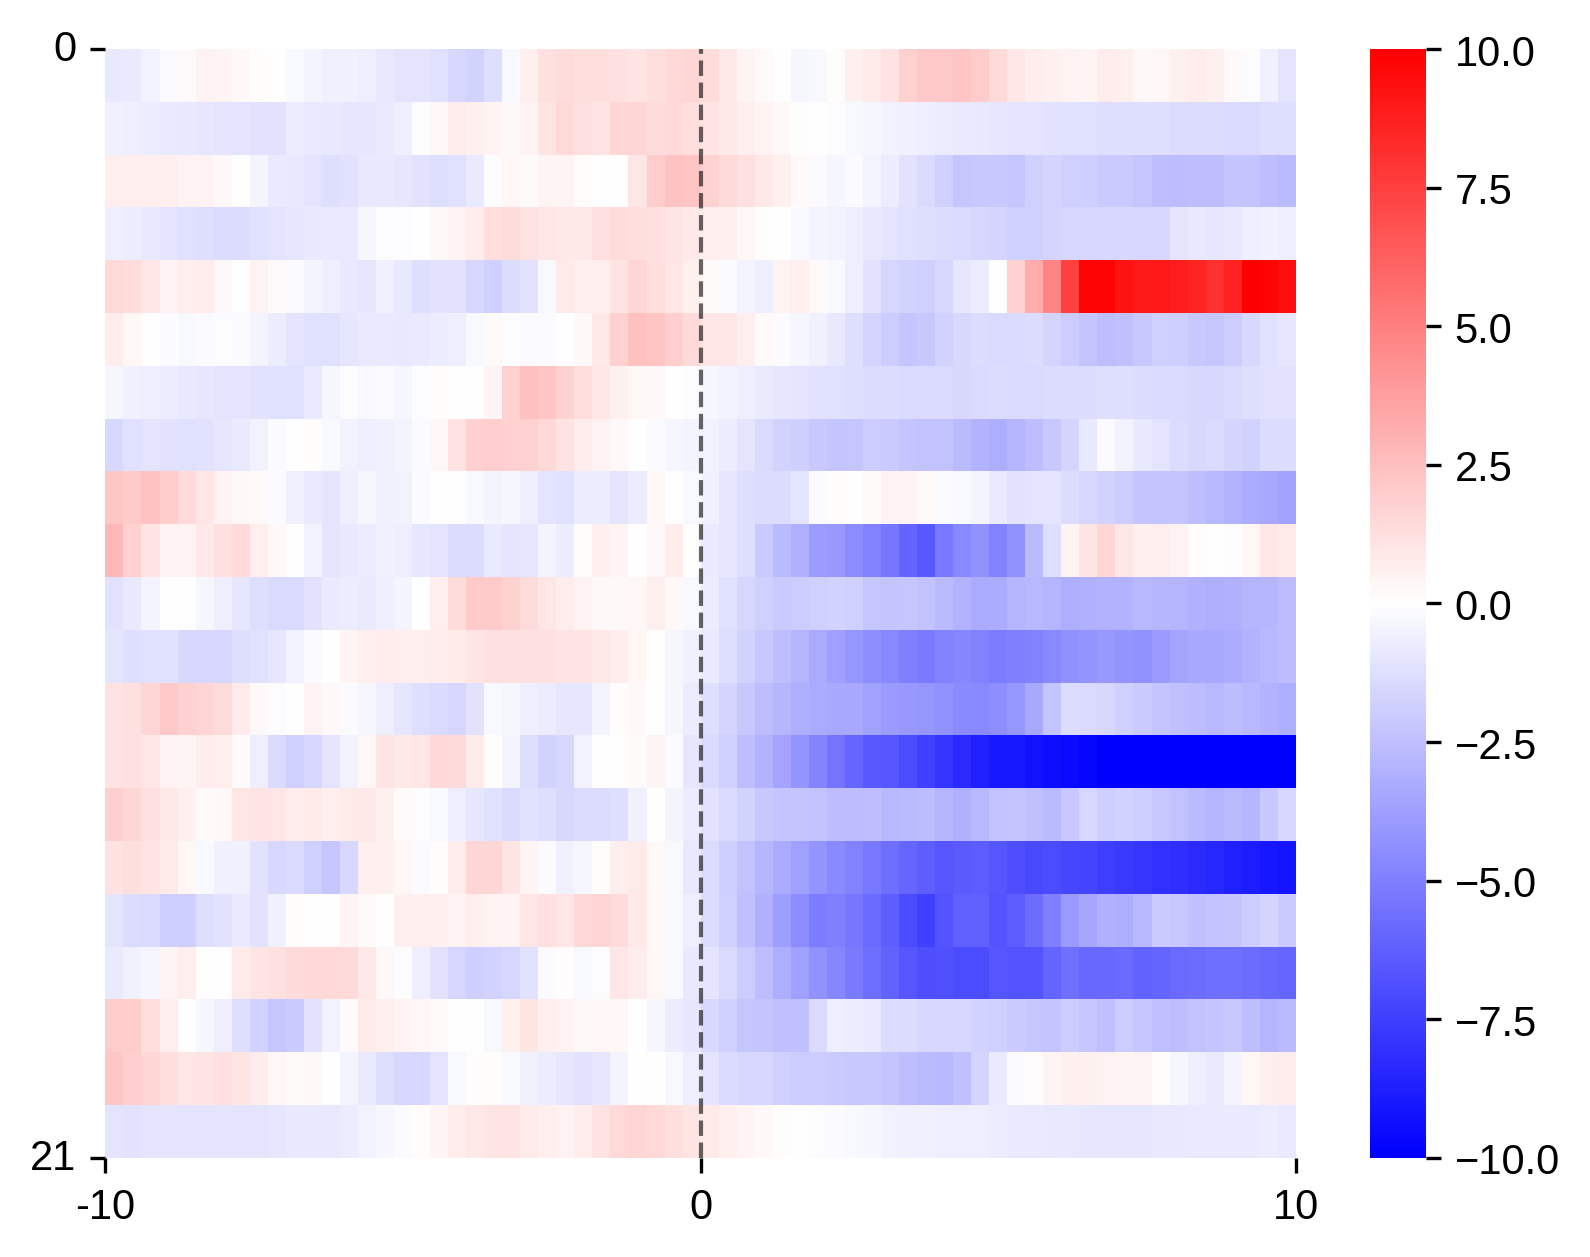

In [50]:

# Function to calculate the first time to reach -1.645 and the duration below -1.645
def calculate_metrics(row):
    after_bins_before = row[Bins_before+2:].astype('float')
    below_threshold = after_bins_before < -1
    first_reach = np.where(below_threshold)[0]
    if len(first_reach) == 0:
        return [np.nan, 0]  # Never reaches -1.645
    first_reach_bin = first_reach[0]
    duration = below_threshold[first_reach_bin:].sum()
    return [first_reach_bin, duration]

# Apply the function to each row
metrics = inhibited_hungry_auc.apply(calculate_metrics, axis=1)
inhibited_hungry_auc['first_reach'] = metrics.str[0]
inhibited_hungry_auc['duration'] = metrics.str[1]

# Sort the DataFrame by 'first_reach' and then by 'duration'
inhibited_hungry_sorted = inhibited_hungry_auc.sort_values(by=['first_reach', 'duration'], ascending=[False, False]).drop(['first_reach', 'duration'], axis=1)

# Create the heatmap
fig, ax = plt.subplots(dpi=300)
sb.heatmap(inhibited_hungry_sorted.iloc[:, 2:].astype('float'), vmin=-10, vmax=10, cmap="bwr")
ax.set_xticks([0, int(Bins/2), Bins])
ax.axvline(Bins_before, ls='--', lw=1, c='black', alpha=0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0, len(inhibited_hungry_auc)])
ax.set_yticklabels([0, len(inhibited_hungry_auc)])

plt.show()


[Text(0, 0, '0'), Text(0, 45, '45')]

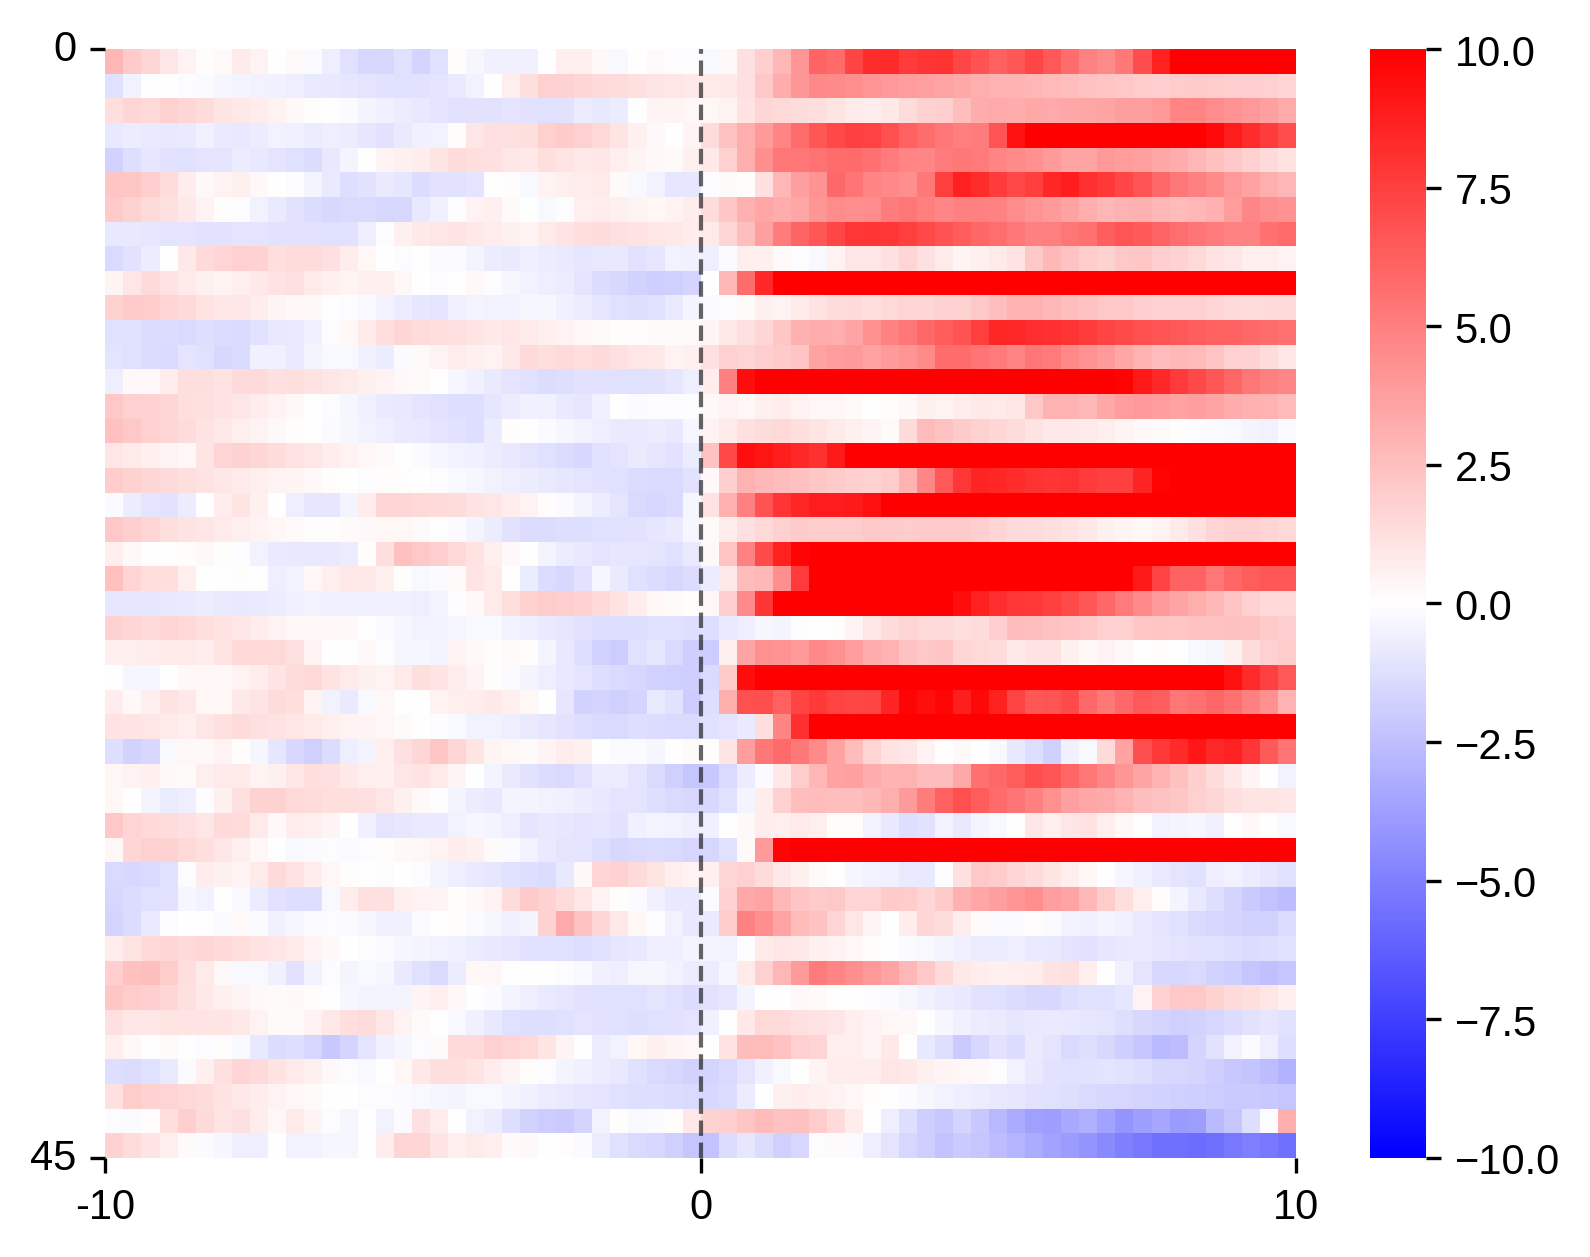

In [51]:
# Calculate the count of bins with value > 2 after int(Bins/2) for each neuron
excited_hungry_sort = excited_hungry_auc.copy()
excited_hungry_sort['count_gt_2'] = (excited_hungry_sort.iloc[:, Bins_before + 2:].astype('float') < -1).sum(axis=1)

# Sort the DataFrame based on this count
excited_hungry_sort = excited_hungry_sort.sort_values(by='count_gt_2', ascending=True).drop('count_gt_2', axis=1)

fig, ax = plt.subplots(dpi = 300)

ax = sb.heatmap(excited_hungry_sort.iloc[:,2:].astype('float'), vmin = -10, vmax= 10, cmap = "bwr")
ax.set_xticks([0,int(Bins/2),Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0,len(excited_hungry_sort)])
ax.set_yticklabels([0, len(excited_hungry_sort)])

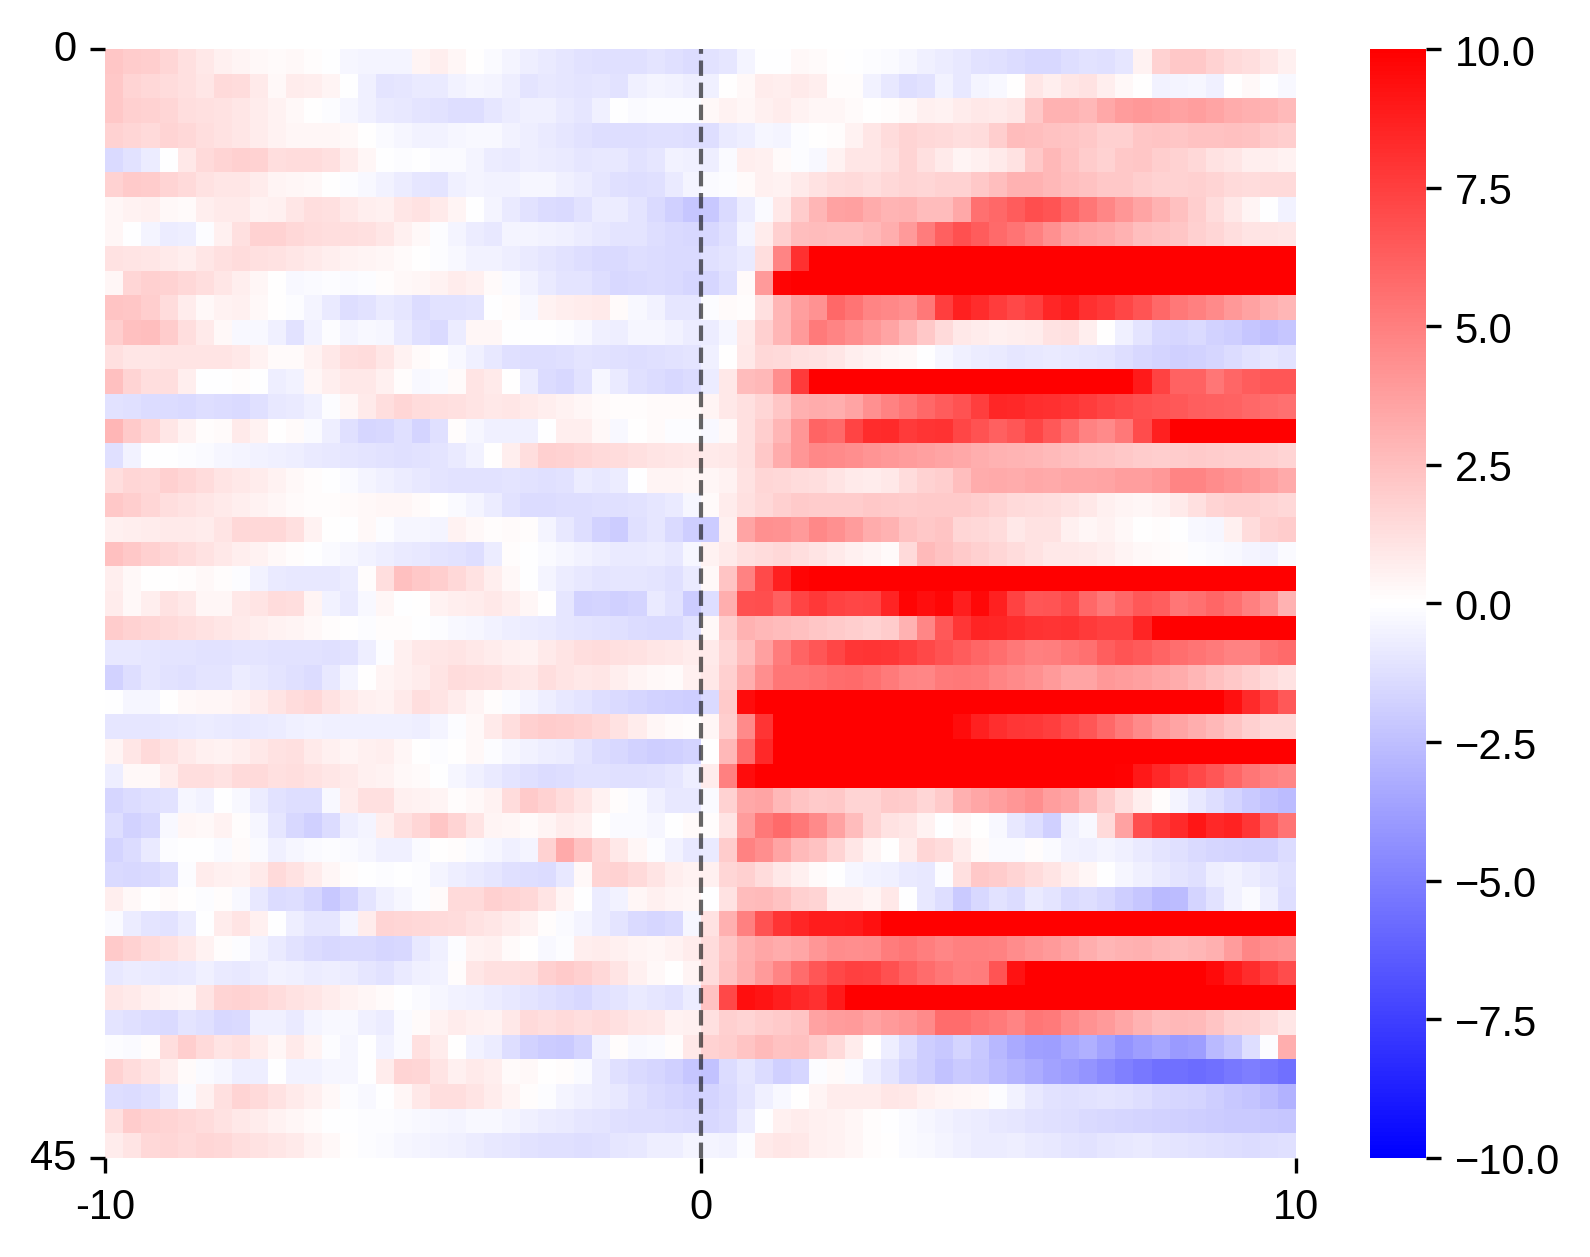

In [52]:

# Function to calculate the first time to reach -1.645 and the duration below -1.645
def calculate_metrics(row):
    after_bins_before = row[Bins_before+2:].astype('float')
    below_threshold = after_bins_before > 1
    first_reach = np.where(below_threshold)[0]
    if len(first_reach) == 0:
        return [np.nan, 0]  # Never reaches -1.645
    first_reach_bin = first_reach[0]
    duration = below_threshold[first_reach_bin:].sum()
    return [first_reach_bin, duration]

# Apply the function to each row
metrics = excited_hungry_auc.apply(calculate_metrics, axis=1)
excited_hungry_auc['first_reach'] = metrics.str[0]
excited_hungry_auc['duration'] = metrics.str[1]

# Sort the DataFrame by 'first_reach' and then by 'duration'
excited_hungry_sorted = excited_hungry_auc.sort_values(by=['first_reach', 'duration'], ascending=[False, False]).drop(['first_reach', 'duration'], axis=1)

# Create the heatmap
fig, ax = plt.subplots(dpi=300)
sb.heatmap(excited_hungry_sorted.iloc[:, 2:].astype('float'), vmin=-10, vmax=10, cmap="bwr")
ax.set_xticks([0, int(Bins/2), Bins])
ax.axvline(Bins_before, ls='--', lw=1, c='black', alpha=0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0, len(excited_hungry_sorted)])
ax.set_yticklabels([0, len(excited_hungry_sorted)])

plt.show()

In [53]:
len(np.unique(inhibited_hungry_auc.Animal_ID))

12

In [54]:
len(np.unique(excited_hungry_auc.Animal_ID))

12

In [55]:
sig_hungry_auc = np.unique(np.concatenate([inhibited_hungry_auc['Animal_ID'], excited_hungry_auc['Animal_ID']]))
sig_hungry_auc

array(['1I5', '1S5', '2I5', '2S5', '2Z4', '4N6', '6H6', '6M6', '6S5',
       '7B6', '7H6', '7M6', '8H6', '9M6'], dtype=object)

In [56]:
set(np.unique(trace_hungry['Animal_ID'])).difference(set(sig_hungry_auc))

{'1B6', '1H6', '2N6', '4B6', '5B6'}

## auROC Satiation

In [92]:
# Create a list to hold the dataframes
trace_satiation_auc_list = []
trace_satiation_auc_list_c = []

# Loop through each animal's DataFrame
for df in all_dataframes:
    animal_id = df['Animal_ID'].iloc[0]  # Extract animal ID
    cell_ids = df['cell_id']  # Extract cell IDs
    
    roc_aucs_all = calculate_traces_auc(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=satiatedcue)
    roc_aucs_all['Animal_ID'] = animal_id  # Add animal ID
    roc_aucs_all['cell_id'] = cell_ids  # Add cell IDs
    
    # Reorder columns to make 'Animal_ID' front
    columns = ['Animal_ID', 'cell_id'] + [col for col in roc_aucs_all.columns if col not in ['Animal_ID', 'cell_id']]
    roc_aucs_all = roc_aucs_all[columns]
    
    trace_satiation_auc_list.append(roc_aucs_all)
    trace_satiation_auc_list_c.append(tracebin)

# Concatenate all dataframes in the list
trace_satiation_auc = pd.concat(trace_satiation_auc_list, ignore_index=True)


In [93]:
np.argmax(trace_satiation_auc.auroc.values)

275

In [94]:
trace_satiated.iloc[275]

Animal_ID         7H6
cell_id             8
0            2.249233
1            1.909693
2            1.623096
               ...   
61           3.428441
62           3.018555
63           2.755718
64           2.614799
65            3.83452
Name: 275, Length: 68, dtype: object

In [95]:
all_dataframes[4]

Animal_ID                  cell_id         0         1         2         3  \
0        7H6                        0  0.000000  0.000000  0.000000  0.000000   
1        7H6                        1  0.000000  0.000000  0.000000  0.000000   
2        7H6                        2  0.000000  0.000000  0.000000  0.000000   
3        7H6                        3  0.000000  0.000000  0.000000  0.000000   
4        7H6                        4  0.000000  0.000000  0.000000  0.000000   
5        7H6                        6  0.000000  0.000000  0.000000  0.000000   
6        7H6                        7  0.000000  0.000000  0.000000  0.000000   
7        7H6                        8  0.000000  0.000000  0.000000  0.000000   
8        7H6                        9  0.000000  0.000000  0.000000  0.000000   
9        7H6                       15  0.000000  0.000000  0.000000  0.000000   
10       7H6                       11  0.000000  0.000000  0.000000  0.000000   
11       7H6                       13  0.000000  0.000000  0.000000  0.000000   
12       7H6                       21  0.000000  0.000000  0.000000  0.000000   
13       7H6                       20  0.000000  0.000000  0.000000  0.000000   
14       7H6                       22  0.000000  0.000000  0.000000  0.000000   
15       7H6                       23  0.000000  0.000000  0.000000  0.000000   
16       7H6                       27  0.000000  0.000000  0.000000  0.000000   
17       7H6                       31  0.000000  0.000000  0.000000  0.000000   
18       7H6                       38  0.000000  0.000000  0.000000  0.000000   
19       7H6                       36  0.000000  0.000000  0.000000  0.000000   
20       7H6                       49  0.000000  0.000000  0.000000  0.000000   
21       7H6                       50  0.000000  0.000000  0.000000  0.000000   
22       7H6                       43  0.000000  0.000000  0.000000  0.000000   
23       7H6                       52  0.000000  0.000000  0.000000  0.000000   
24       7H6                       48  0.000000  0.000000  0.000000  0.000000   
25       7H6                       54  0.000000  0.000000  0.000000  0.000000   
26       7H6                       57  0.000000  0.000000  0.000000  0.000000   
27       7H6                       58  0.000000  0.000000  0.000000  0.000000   
28       7H6                       59  0.000000  0.000000  0.000000  0.000000   
29       7H6                       61  0.000000  0.000000  0.000000  0.000000   
30       7H6                       63  0.000000  0.000000  0.000000  0.000000   
31       7H6                       64  0.000000  0.000000  0.000000  0.000000   
32       7H6                       65  0.000000  0.000000  0.000000  0.000000   
33       7H6                       68  0.000000  0.000000  0.000000  0.000000   
34       7H6                 Time (s) -0.003000  0.050000  0.100000  0.152000   
35       7H6              Speed (m/s)  0.026000  0.016000  0.016000  0.012000   
36       7H6                 Freezing  0.000000  0.000000  0.000000  0.000000   
37       7H6             In Food Area  0.000000  0.000000  0.000000  0.000000   
38       7H6         Bar Press active  0.000000  0.000000  0.000000  0.000000   
39       7H6  Miniscope record active  0.970874  0.242857  0.957143  0.223881   
40       7H6              Tone active  0.000000  0.000000  0.000000  0.000000   

           4      5         6         7  ...        30050        30051  \
0   0.000000  0.000  0.000000  0.000000  ...     0.896059     0.886581   
1   0.000000  0.000  0.000000  0.000000  ...     0.000000     0.000000   
2   0.000000  0.000  0.000000  0.000000  ...     0.212070     0.206335   
3   0.000000  0.000  0.000000  0.000000  ...     0.034699     0.034079   
4   0.000000  0.000  0.000000  0.000000  ...     0.734271     0.722396   
5   0.000000  0.000  0.000000  0.000000  ...     0.290197     0.285106   
6   0.000000  0.000  0.000000  0.000000  ...     0.308465     0.303337   
7   0.00

In [97]:
# Identifying cue onsets
df = all_dataframes[4]
cue_range = satiatedcue
cue = df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()
cueonset = np.array(np.where(np.diff(np.concatenate(([0], cue > 0))) > 0)[0])
if cue_range is not None:
    # Select a subset of cueonset based on cue_range
    if cue_range>0:
        cueonset = cueonset[:cue_range]
    elif cue_range<0:
        cueonset = cueonset[cue_range:]

# Select rows where 'cell_id' is numeric and columns from the third column onwards
trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
trace = trace.sub(trace.mean(axis = 1), axis = 0).divide(trace.std(axis = 1), axis = 0)

tracenew = pd.DataFrame(0, index=trace.index, columns=np.arange(TotalFrame))
# Create an empty DataFrame to store concatenated traces for each cell
total_cue_length = int(CompareRange_base * FR) + int(CompareRange_after * FR)
tracenew_bycue = pd.DataFrame(index=trace.index, columns=np.arange(total_cue_length * len(cueonset)))

# Aligning traces based on cue onset and store each trials
for i, onset in enumerate(cueonset):
        # Calculate the valid start indices for each cue onset
        valid_starts = np.arange(onset - int(CompareRange_base * FR), onset + int(CompareRange_after * FR))
        # Ensure the indices are within the bounds of the trace
        valid_starts = valid_starts[(valid_starts >= 0) & (valid_starts <  len(trace.columns))]
        
        # Concatenate the trace data around the cue
        tracenew_bycue.iloc[:, i*total_cue_length:(i+1)*total_cue_length] = trace.iloc[:, valid_starts]


# Define the time window before and after cue onset
time_before_cue = int(CompareRange_base * FR)
time_after_cue = int(CompareRange_after * FR)

# Initialize the binary series for cue onset
cue_length = time_before_cue + time_after_cue
cueon_per_cue = [0] * time_before_cue + [1] * time_after_cue
cueon = cueon_per_cue * len(cueonset)  # Repeat for the number of cues

In [98]:
test_neuron = tracenew_bycue.iloc[7, :]
fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
roc_auc = auc(fpr, tpr)

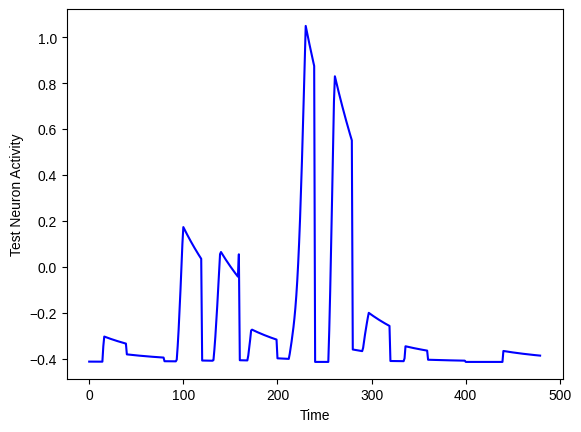

In [106]:
fig, ax1 = plt.subplots()

ax1.plot(test_neuron, color='b', label='Test Neuron')
ax1.set_xlabel('Time')
ax1.set_ylabel('Test Neuron Activity', color='k')
ax1.tick_params(axis='y', labelcolor='k')
plt.show()

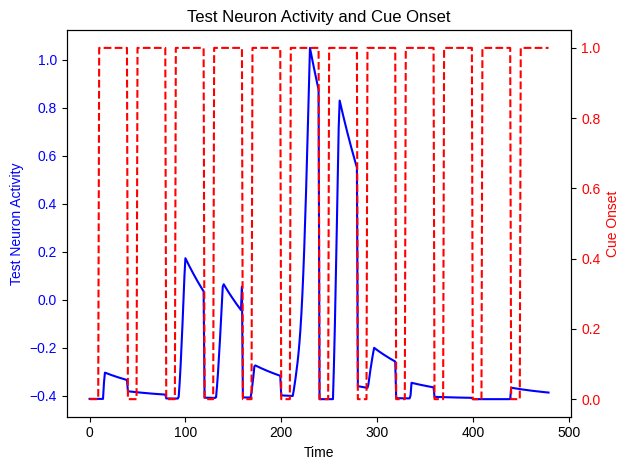

In [103]:
fig, ax1 = plt.subplots()
# Plotting test neuron data
ax1.plot(test_neuron, color='b', label='Test Neuron')
ax1.set_xlabel('Time')
ax1.set_ylabel('Test Neuron Activity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create another axis for the binary cue data
ax2 = ax1.twinx()
ax2.plot(cueon, color='r', linestyle='--', label='Cue Onset')
ax2.set_ylabel('Cue Onset', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Showing the plot
plt.title('Test Neuron Activity and Cue Onset')
fig.tight_layout()
plt.show()

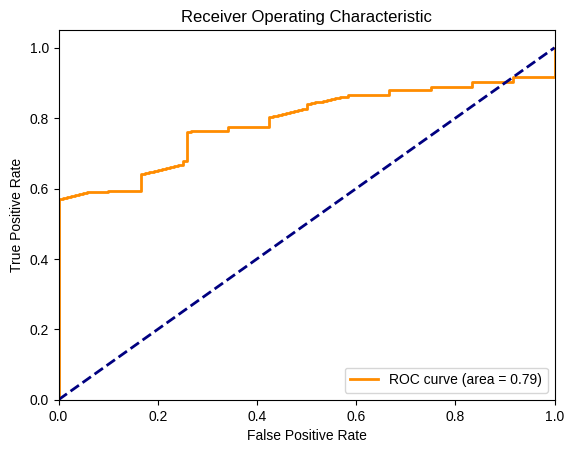

In [107]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


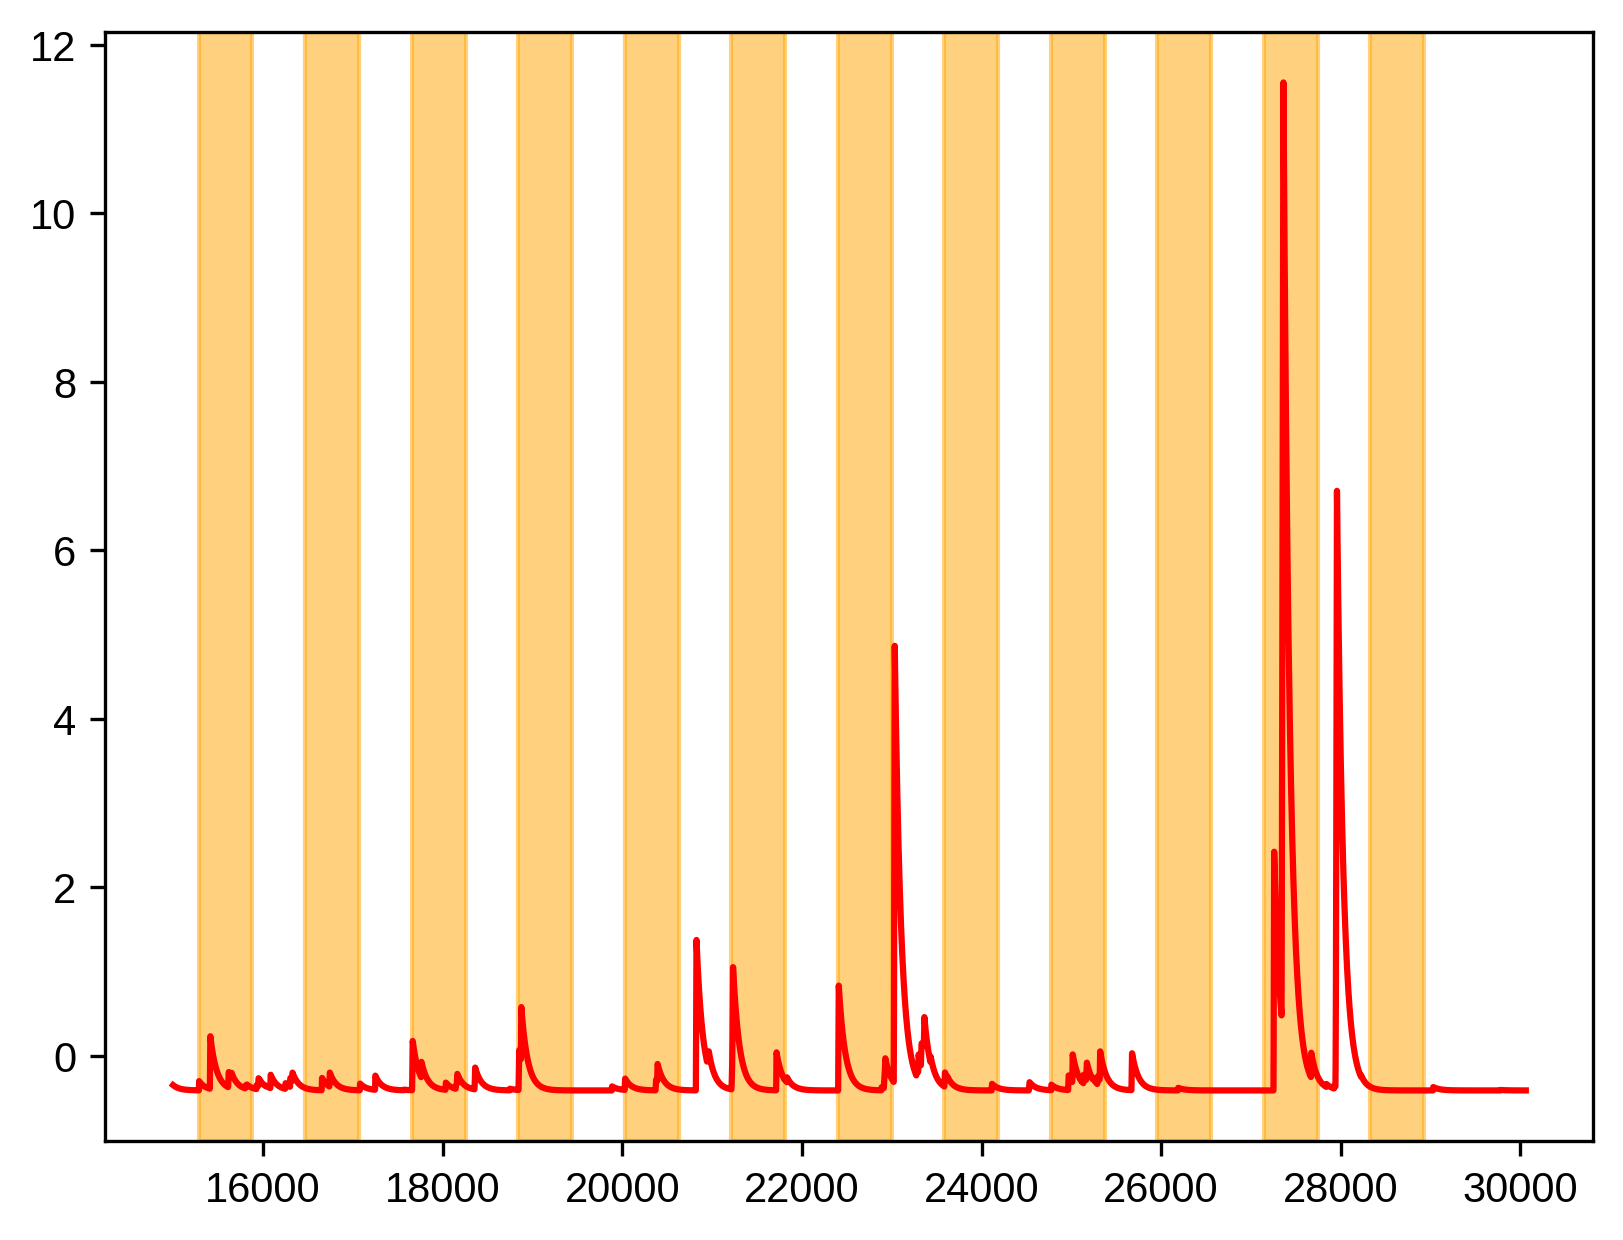

In [108]:
fig, ax = plt.subplots(dpi=300)
ax.plot(trace.iloc[7,15000:], color = 'red') #[(cueonset[5]-3000):(cueonset[5]+3000)]
for i in cueonset:
    ax.axvspan(i, i+30*FR, color = 'Orange', alpha = 0.5)

In [110]:
def calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR):
    # Define the time window before and after cue onset
    time_before_cue = int(CompareRange_base * FR)
    time_after_cue = int(CompareRange_after * FR)

    # Initialize the binary series for cue onset
    cue_length = time_before_cue + time_after_cue
    cueon_per_cue = [0] * time_before_cue + [1] * time_after_cue
    cueon = cueon_per_cue * len(cueonset)  # Repeat for the number of cues
    
    # Initialize the DataFrame for ROC AUC results with the same index as tracenew_bycue and one column 'auroc'
    roc_aucs = pd.DataFrame(index=tracenew_bycue.index, columns=['auroc'])

    # Calculate the ROC AUC for each neuron
    for neuron_index in tracenew_bycue.index:
        test_neuron = tracenew_bycue.loc[neuron_index, :]
        fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
        roc_auc = auc(fpr, tpr)
        roc_aucs.at[neuron_index, 'auroc'] = roc_auc  # Assign the calculated AUROC value
        
    return roc_aucs

def calculate_changes_auc_bycue(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, num_shifts=1000, seed=999):
    random.seed(seed)
    cue = df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()
    cueonset = np.array(np.where(np.diff(np.concatenate(([0], cue > 0))) > 0)[0])
    if cue_range is not None:
        # Select a subset of cueonset based on cue_range
        if cue_range>0:
            cueonset = cueonset[:cue_range]
        elif cue_range<0:
            cueonset = cueonset[cue_range:]
            
    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
    trace = trace.sub(trace.mean(axis=1), axis=0).divide(trace.std(axis=1), axis=0)

    # Initialize a list to store the ROC AUC DataFrames for all shifts
    roc_aucs_list = []

    for j in range(num_shifts):
        shift = random.randint(0, len(trace.columns))
        shifted_trace = np.roll(trace.values, shift, axis=1)

        # Create an empty DataFrame to store concatenated traces for each cell
        total_cue_length = int(CompareRange_base * FR) + int(CompareRange_after * FR)
        tracenew_bycue = pd.DataFrame(index=trace.index, columns=np.arange(total_cue_length * len(cueonset)))

        # Concatenate the trace data around each cue for each shift
        for i, onset in enumerate(cueonset):
            valid_starts = np.arange(onset - int(CompareRange_base * FR), onset + int(CompareRange_after * FR))
            valid_starts = valid_starts[(valid_starts >= 0) & (valid_starts < len(shifted_trace[0]))]
            tracenew_bycue.iloc[:, i * total_cue_length : (i + 1) * total_cue_length] = shifted_trace[:, valid_starts]

        # Calculate the ROC AUC for this shift
        roc_aucs_shift = calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR)
        
        # Append the DataFrame of AUROCs from this shift to the list
        roc_aucs_shift.rename(columns={'auroc': f'Shift_{j}'}, inplace=True)
        roc_aucs_list.append(roc_aucs_shift)

    # Concatenate all DataFrames in the list to a single DataFrame
    roc_aucs_all_shifts = pd.concat(roc_aucs_list, axis=1)

    return roc_aucs_all_shifts


def worker_process_auc(data):
    FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, df = data
    # Call the calculate_changes_auc function with appropriate parameters
    return calculate_changes_auc_bycue(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range)

def parallel_process_and_calculate_change_auc(all_dataframes, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range):
    # Determining the number of processes based on available CPU cores
    num_processes = psutil.cpu_count(logical=False)

    # Create a multiprocessing pool and process data
    pool = multiprocessing.Pool(processes=num_processes)
    results = pool.map(worker_process_auc, [(FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, df) for df in all_dataframes])
    pool.close()
    pool.join()

    # Flatten list of results and convert to DataFrame
    final_df = pd.concat([pd.DataFrame(result) for result in results], ignore_index=True)
    return final_df


# The final_results_df contains the calculated changes for each DataFrame


In [111]:
%%time
change_satiated_shift_auc = parallel_process_and_calculate_change_auc(all_dataframes, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=satiatedcue)

CPU times: user 1.79 s, sys: 799 ms, total: 2.59 s
Wall time: 2min 15s


<Axes: xlabel='275', ylabel='Count'>

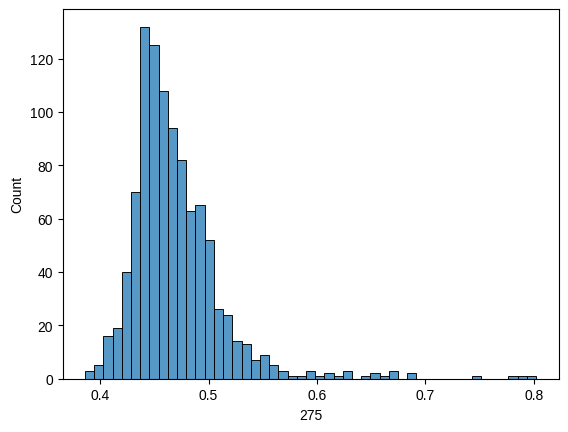

In [112]:
sb.histplot(change_satiated_shift_auc.iloc[275])


In [113]:
before_satiated = trace_satiated.iloc[:, (Bins_before - int(CompareRange_base * FR / BinSize)+2) : Bins_before+2]
after_satiated = trace_satiated.iloc[:,Bins_before+2:(Bins_before+int(CompareRange_after*FR/BinSize)+2)]
change_satiated = after_satiated.mean(axis= 1) - before_satiated.mean(axis=1)

change_satiated_auc = trace_satiation_auc.auroc
excited_satiated_auc = pd.DataFrame()
inhibited_satiated_auc = pd.DataFrame()


excited_satiated_indices_auc = []
inhibited_satiated_indices_auc = []

for i in range(len(trace_satiated)):
    change = change_satiated_auc[i]
    change_dist = change_satiated_shift_auc.iloc[i, :]

    if change > np.quantile(change_dist, 0.975): 
        excited_satiated_indices_auc.append(i)
    elif change < np.quantile(change_dist, 0.025): 
        inhibited_satiated_indices_auc.append(i)

excited_satiated_indices_auc = set(excited_satiated_indices_auc).intersection(set(np.where(change_satiated>0.5)[0]))
inhibited_satiated_indices_auc = set(inhibited_satiated_indices_auc).intersection(set(np.where(change_satiated<-0.5)[0]))

# Using .iloc to select rows and then concat to form the final DataFrame
excited_satiated_auc = pd.concat([trace_satiated.iloc[i] for i in excited_satiated_indices_auc], axis=1).T
inhibited_satiated_auc = pd.concat([trace_satiated.iloc[i] for i in inhibited_satiated_indices_auc], axis=1).T

# excited_satiated_auc = excited_satiated_auc[(excited_satiated_auc.iloc[:,Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]> 1.645).any(axis =1)]
# # excited_satiated_auc = excited_satiated_auc[(excited_satiated_auc.iloc[:,Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]>-1.96).all(axis =1)]
excited_satiated_auc = excited_satiated_auc[(excited_satiated_auc.iloc[:, Bins_before-int(CompareRange_base*FR/BinSize)+2:Bins_before+2]< 1).all(axis =1)]

# inhibited_satiated_auc = inhibited_satiated_auc[(inhibited_satiated_auc.iloc[:, Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]< -1.645).any(axis =1)]
# # inhibited_satiated_auc = inhibited_satiated_auc[(inhibited_satiated_auc.iloc[:, Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]< 1.96).all(axis =1)]
inhibited_satiated_auc = inhibited_satiated_auc[(inhibited_satiated_auc.iloc[:, Bins_before-int(CompareRange_base*FR/BinSize)+2:Bins_before+2]> -1).all(axis =1)]

# excited_hungry_auc = excited_hungry_auc[trace_hungry_auc.iloc[excited_hungry_auc.index.values].auroc>0.55]
# inhibited_hungry_auc = inhibited_hungry_auc[trace_hungry_auc.iloc[inhibited_hungry_auc.index.values].auroc<0.45]

excited_satiated_indices_auc = excited_satiated_auc.index.values.tolist()
inhibited_satiated_indices_auc = inhibited_hungry_auc.index.values.tolist()

excited_satiated_mean_auc = excited_satiated_auc.iloc[:,2:].mean(axis=0).astype('float')
excited_satiated_sem_auc = excited_satiated_auc.iloc[:,2:].sem(axis=0).astype('float')
inhibited_satiated_mean_auc = inhibited_satiated_auc.iloc[:,2:].mean(axis=0).astype('float')
inhibited_satiated_sem_auc = inhibited_satiated_auc.iloc[:,2:].sem(axis=0).astype('float')


17

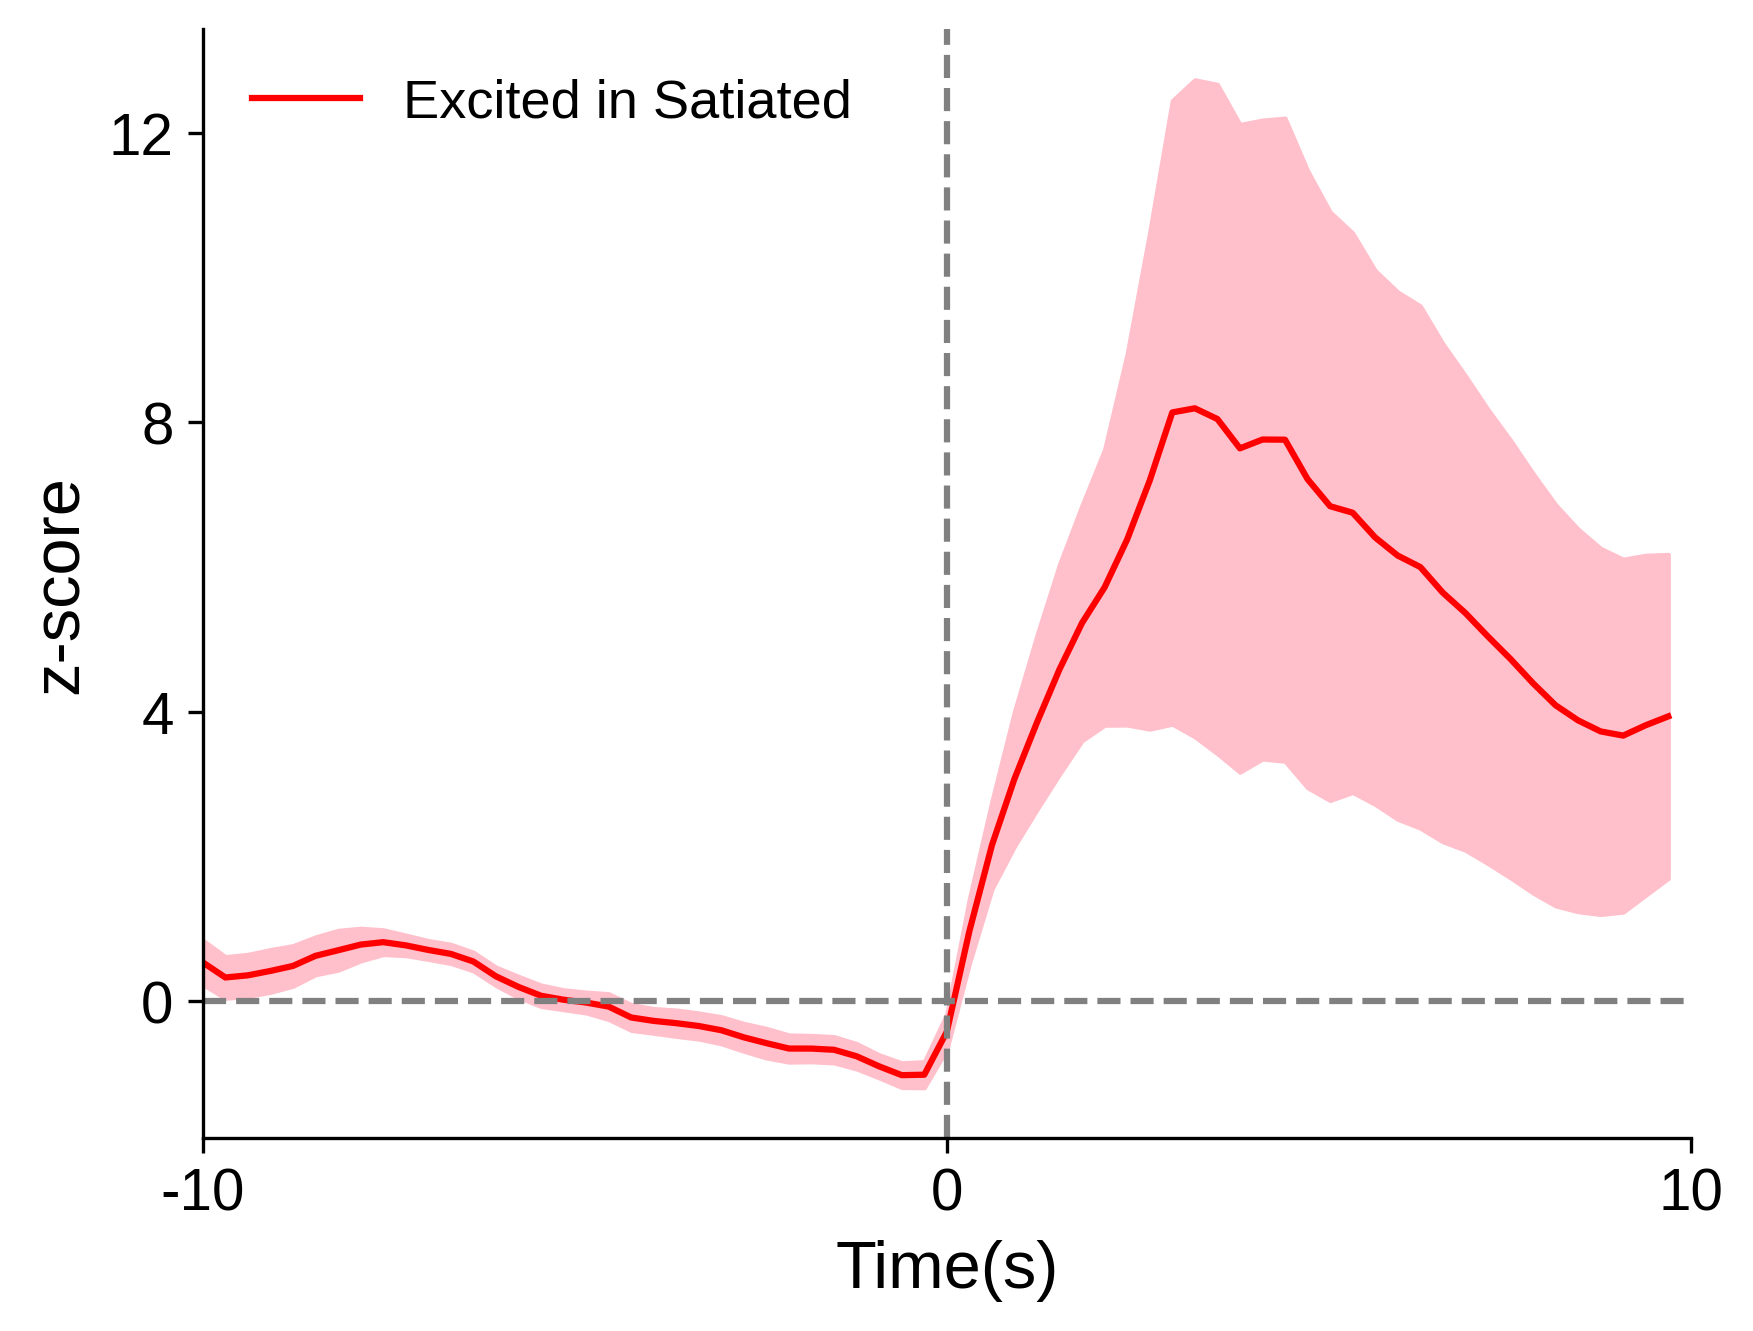

In [114]:
x=np.arange(Bins)
y=excited_satiated_mean_auc
err = excited_satiated_sem_auc
fig, ax = plt.subplots(dpi = 300)
ax.plot(x, y, label = 'Excited in Satiated', color = 'red')
ax.fill_between(x, y-err, y+err, color='pink')
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.tick_params(labelsize = 14)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.set_xticks([0,Bins_before,Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.axvline(Bins_before, color = 'grey', ls = '--')
ax.axhline(0, color = 'grey', ls = '--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 2, framealpha = 0, fontsize='13')
len(excited_satiated_auc)

12

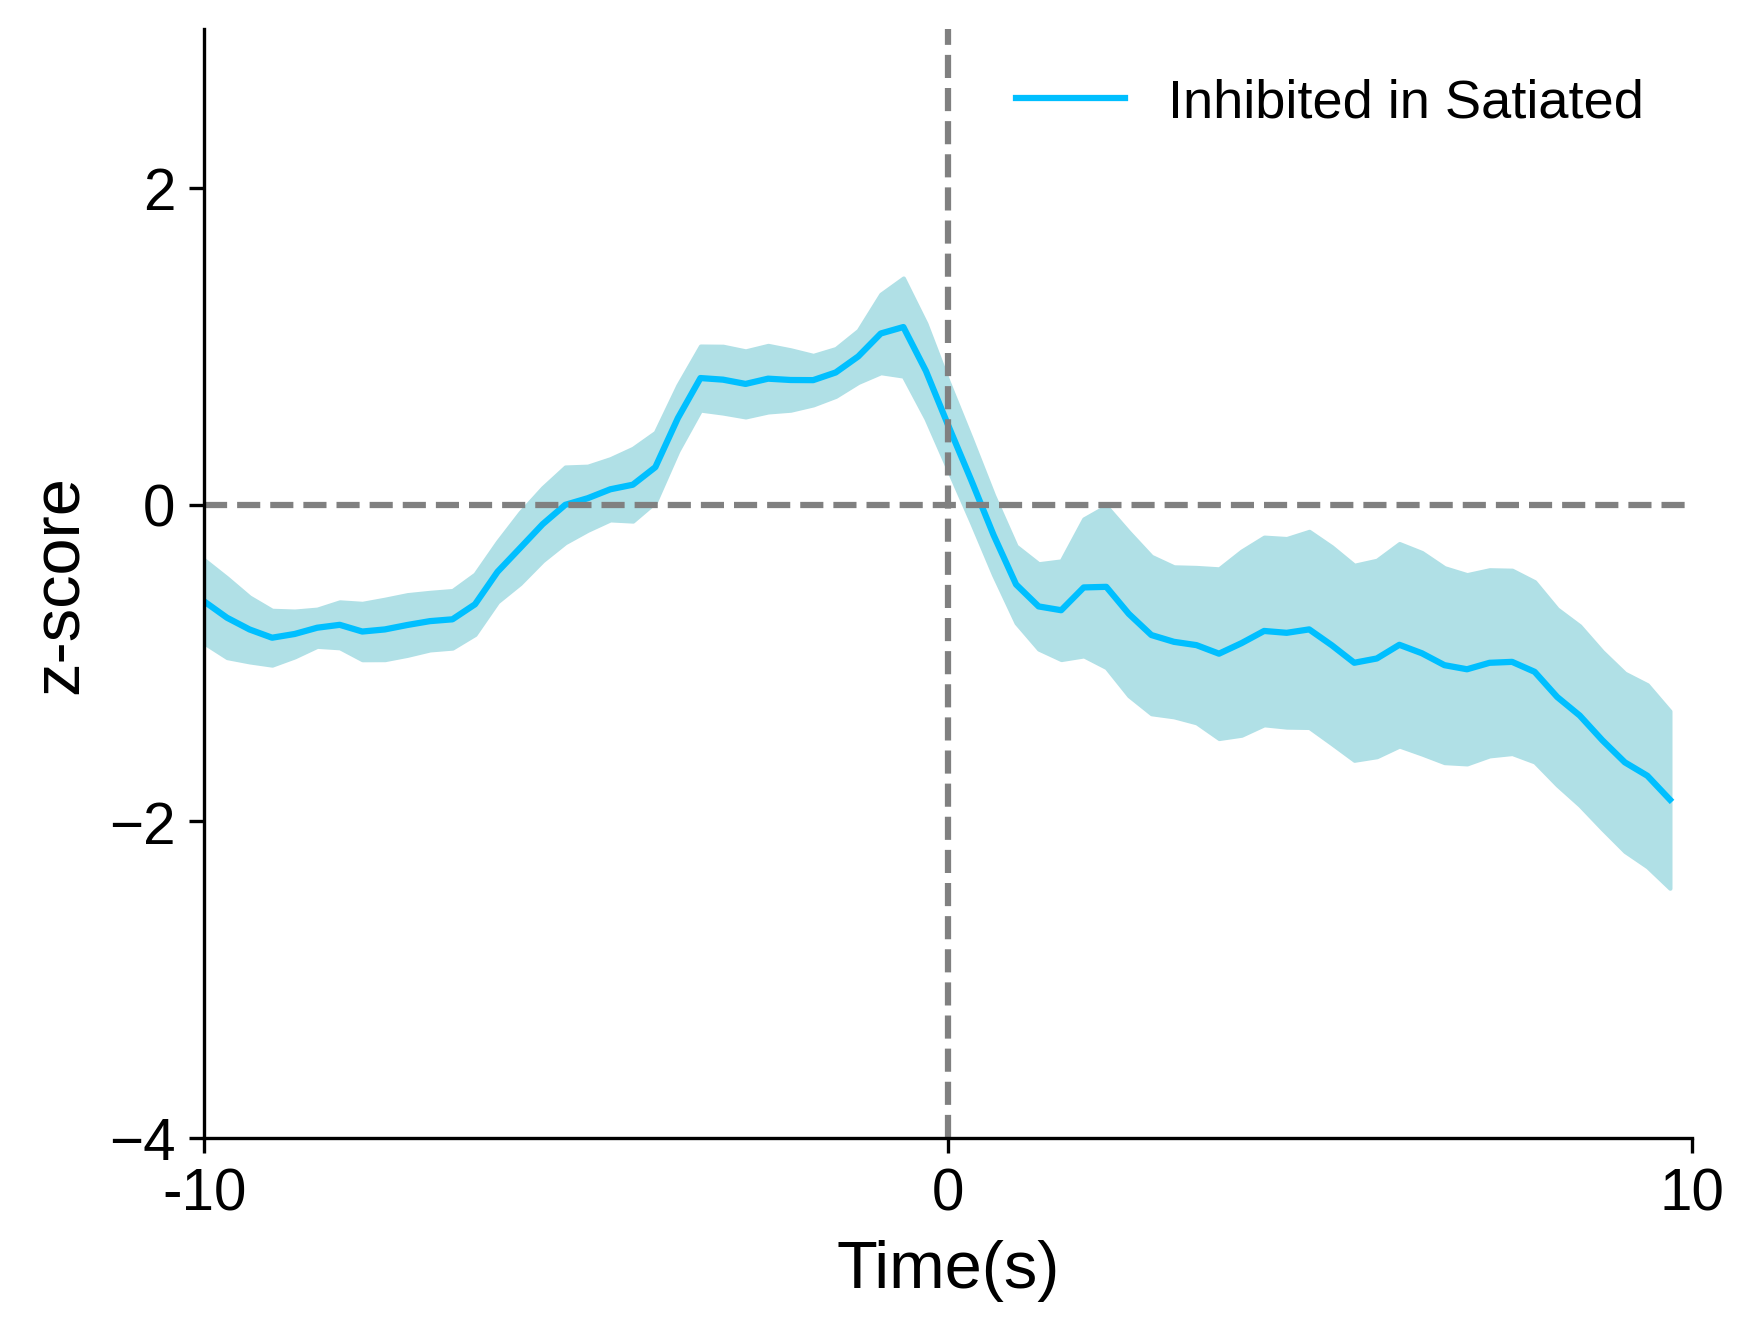

In [115]:
x=np.arange(Bins)
y=inhibited_satiated_mean_auc
err = inhibited_satiated_sem_auc
fig, ax = plt.subplots(dpi = 300)
ax.plot(x, y, label = 'Inhibited in Satiated', color = 'deepskyblue', linestyle = '-')
ax.fill_between(x, y-err, y+err, color='powderblue')
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.tick_params(labelsize = 14)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.set_xticks([0, Bins_before,Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-4,3)
ax.axvline(Bins_before, color = 'grey', ls = '--')
ax.axhline(0, color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_satiated_auc)

In [ ]:
x=np.arange(Bins)
y=excited_satiated_auc.iloc[:,2:]
fig, ax = plt.subplots()
for i in range(len(y)):
    ax.plot(x, y.iloc[i,:])
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-5,30)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_satiated_auc)

In [ ]:
x=np.arange(Bins)
y=inhibited_satiated_auc.iloc[:,2:]
err = inhibited_hungry_sem
fig, ax = plt.subplots()
for i in range(len(y)):
    ax.plot(x, y.iloc[i,:])
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-8,5)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_satiated_auc)

In [ ]:
# Calculate the count of bins with value > 2 after int(Bins/2) for each neuron
inhibited_satiated_sort = inhibited_satiated_auc.copy()
inhibited_satiated_sort['count_gt_2'] = (inhibited_satiated_sort.iloc[:, Bins_before + 2:].astype('float') < -1).sum(axis=1)

# Sort the DataFrame based on this count
inhibited_satiated_sort = inhibited_satiated_sort.sort_values(by='count_gt_2', ascending=True).drop('count_gt_2', axis=1)

fig, ax = plt.subplots(dpi = 300)
ax = sb.heatmap(inhibited_satiated_sort.iloc[:,2:].astype('float'), vmin = -10, vmax= 10, cmap = "bwr")
ax.set_xticks([0,int(Bins/2),Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0,len(inhibited_satiated_auc)])
ax.set_yticklabels([0, len(inhibited_satiated_auc)])

In [ ]:

# Function to calculate the first time to reach -1.645 and the duration below -1.645
def calculate_metrics(row):
    after_bins_before = row[Bins_before+2:].astype('float')
    below_threshold = after_bins_before < -1
    first_reach = np.where(below_threshold)[0]
    if len(first_reach) == 0:
        return [np.nan, 0]  # Never reaches -1.645
    first_reach_bin = first_reach[0]
    duration = below_threshold[first_reach_bin:].sum()
    return [first_reach_bin, duration]

# Apply the function to each row
metrics = inhibited_satiated_auc.apply(calculate_metrics, axis=1)
inhibited_satiated_auc['first_reach'] = metrics.str[0]
inhibited_satiated_auc['duration'] = metrics.str[1]

# Sort the DataFrame by 'first_reach' and then by 'duration'
inhibited_satiated_sorted = inhibited_satiated_auc.sort_values(by=['first_reach', 'duration'], ascending=[False, False]).drop(['first_reach', 'duration'], axis=1)

# Create the heatmap
fig, ax = plt.subplots(dpi=300)
sb.heatmap(inhibited_satiated_sorted.iloc[:, 2:].astype('float'), vmin=-10, vmax=10, cmap="bwr")
ax.set_xticks([0, int(Bins/2), Bins])
ax.axvline(Bins_before, ls='--', lw=1, c='black', alpha=0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0, len(inhibited_satiated_sorted)])
ax.set_yticklabels([0, len(inhibited_satiated_sorted)])

plt.show()


In [ ]:
# Calculate the count of bins with value > 2 after int(Bins/2) for each neuron
excited_satiated_sort = excited_satiated_auc.copy()
excited_satiated_sort['count_gt_2'] = (excited_satiated_sort.iloc[:, Bins_before + 2:].astype('float') < -1).sum(axis=1)

# Sort the DataFrame based on this count
excited_satiated_sort = excited_satiated_sort.sort_values(by='count_gt_2', ascending=True).drop('count_gt_2', axis=1)

fig, ax = plt.subplots(dpi = 300)

ax = sb.heatmap(excited_satiated_sort.iloc[:,2:].astype('float'), vmin = -10, vmax= 10, cmap = "bwr")
ax.set_xticks([0,int(Bins/2),Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0,len(excited_satiated_sort)])
ax.set_yticklabels([0, len(excited_satiated_sort)])

In [ ]:

# Function to calculate the first time to reach -1.645 and the duration below -1.645
def calculate_metrics(row):
    after_bins_before = row[Bins_before+2:].astype('float')
    below_threshold = after_bins_before > 1
    first_reach = np.where(below_threshold)[0]
    if len(first_reach) == 0:
        return [np.nan, 0]  # Never reaches -1.645
    first_reach_bin = first_reach[0]
    duration = below_threshold[first_reach_bin:].sum()
    return [first_reach_bin, duration]

# Apply the function to each row
metrics = excited_satiated_auc.apply(calculate_metrics, axis=1)
excited_satiated_auc['first_reach'] = metrics.str[0]
excited_satiated_auc['duration'] = metrics.str[1]

# Sort the DataFrame by 'first_reach' and then by 'duration'
excited_satiated_sorted = excited_satiated_auc.sort_values(by=['first_reach', 'duration'], ascending=[False, False]).drop(['first_reach', 'duration'], axis=1)

# Create the heatmap
fig, ax = plt.subplots(dpi=300)
sb.heatmap(excited_satiated_sorted.iloc[:, 2:].astype('float'), vmin=-10, vmax=10, cmap="bwr")
ax.set_xticks([0, int(Bins/2), Bins])
ax.axvline(Bins_before, ls='--', lw=1, c='black', alpha=0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0, len(excited_satiated_sorted)])
ax.set_yticklabels([0, len(excited_satiated_sorted)])

plt.show()

In [ ]:
x=np.arange(Bins)
y=excited_hungry_mean_auc
z=excited_satiated_mean_auc
erry = excited_hungry_sem_auc
errz = excited_satiated_sem_auc
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.plot(x, z, label = 'Excited in Satiated', color = 'darkorange')
ax.fill_between(x, y-erry, y+erry, color='pink', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='peachpuff', alpha = 0.4)
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
# ax.set_ylim(-2, 12)
#ax.set_ylim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.axhline(0, color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry_auc)

In [ ]:
x=np.arange(Bins)
y=inhibited_hungry_mean_auc
z=inhibited_satiated_mean_auc
erry = inhibited_hungry_sem_auc
errz = inhibited_satiated_sem_auc
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue')
ax.plot(x, z, label = 'Inhibited in Satiated', color = 'turquoise')
ax.fill_between(x, y-erry, y+erry, color='lightskyblue', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='aquamarine', alpha = 0.4)
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-4, 2)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.axhline(0, color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize= 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry_auc)

In [ ]:
excited_hungry_insatiated_mean = trace_satiated.iloc[excited_indices_auc, 2:].mean(axis=0)
excited_hungry_insatiated_sem =  trace_satiated.iloc[excited_indices_auc, 2:].sem(axis=0)
inhibited_hungry_insatiated_mean = trace_satiated.iloc[inhibited_indices_auc, 2:].mean(axis=0)
inhibited_hungry_insatiated_sem =  trace_satiated.iloc[inhibited_indices_auc, 2:].sem(axis=0)

In [ ]:
excited_satiated_inhungry_mean = trace_hungry.iloc[excited_satiated_indices_auc, 2:].mean(axis=0)
excited_satiated_inhungry_sem =  trace_hungry.iloc[excited_satiated_indices_auc, 2:].sem(axis=0)
inhibited_satiated_inhungry_mean = trace_hungry.iloc[inhibited_satiated_indices_auc, 2:].mean(axis=0)
inhibited_satiated_inhungry_sem =  trace_hungry.iloc[inhibited_satiated_indices_auc, 2:].sem(axis=0)

In [ ]:
x=np.arange(Bins)
y=excited_hungry_mean_auc
z=excited_hungry_insatiated_mean
erry = excited_hungry_sem_auc
errz = excited_hungry_insatiated_sem
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.plot(x, z, label = 'Same Cell in Satiated', color = 'grey')
ax.fill_between(x, y-erry, y+erry, color='pink', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='lightgrey', alpha = 0.4)
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
# ax.set_ylim(-2, 12)
ax.axvline(int((Bins/2)), ymax=0.8, color = 'grey', ls = '--')
ax.axhline(0, color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry_auc)

In [ ]:
x=np.arange(Bins)
y=inhibited_hungry_mean_auc
z=inhibited_hungry_insatiated_mean
erry = inhibited_hungry_sem_auc
errz = inhibited_hungry_insatiated_sem
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.plot(x, y, label = 'Inhibited in Hungry', color='deepskyblue')
ax.plot(x, z, label = 'Same Cell in Satiated', color='grey')
ax.fill_between(x, y-erry, y+erry, color = 'powderblue', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color = 'lightgrey', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
# ax.set_ylim(-4, 3)
ax.axvline(int((Bins/2)), ymax=0.8,color = 'grey', ls = '--')
ax.axhline(0, color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry_auc)

In [ ]:
x=np.arange(Bins)
y=excited_satiated_mean_auc
z=excited_satiated_inhungry_mean
erry = excited_satiated_sem_auc
errz = excited_satiated_inhungry_sem
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.plot(x, y, label = 'Excited in Satiated',color='red')
ax.plot(x, z, label = 'Same Cell in Hungry',color='grey')
ax.fill_between(x, y-erry, y+erry, color = 'pink', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color = 'lightgrey', alpha = 0.4)
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
# ax.set_ylim(-3, 12)
ax.axvline(int((Bins/2)), ymax = 0.8,color = 'grey', ls = '--')
ax.axhline(0, color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_satiated_auc)

In [ ]:
x=np.arange(Bins)
y=inhibited_satiated_mean_auc
z=inhibited_satiated_inhungry_mean
erry = inhibited_satiated_sem_auc
errz = inhibited_satiated_inhungry_sem
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.plot(x, y, label = 'Inhibited in Satiated',color='deepskyblue')
ax.plot(x, z, label = 'Same Cell in Hungry',color='grey')
ax.fill_between(x, y-erry, y+erry, color = 'powderblue', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color = 'lightgrey', alpha = 0.4)
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), ymax = 0.8, color = 'grey', ls = '--')
ax.axhline(0, color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_satiated_auc)

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,3), dpi=300)
tracesorted = trace_hungry.sort_values(by=Bins_before, axis=0)
sb.heatmap(tracesorted.iloc[:, 2:], vmin=-6, vmax=6, cmap="bwr",ax = ax1)  # Exclude the last two columns (Animal_ID and cell_id)
ax1.set_xticks([0, Bins_before, Bins])
ax1.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax1.set_yticks([0, len(tracesorted)])
ax1.set_yticklabels([0, len(tracesorted)])
ax1.set_title('Ranked Hungry Cue Responses',fontsize =6, pad = 10)
ax1.tick_params(labelsize = 8)
# Change font size of colorbar labels for the first heatmap
cbar1 = ax1.collections[0].colorbar
cbar1.ax.tick_params(labelsize=8) 

tracesorted_random = trace_satiated.reindex(tracesorted.index)
sb.heatmap(tracesorted_random.iloc[:, 2:], vmin=-6, vmax=6, cmap="bwr", ax = ax2)  # Exclude the last two columns (Animal_ID and cell_id)
ax2.set_xticks([0, Bins_before, Bins])
ax2.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax2.set_yticks([0, len(tracesorted)])
ax2.set_yticklabels([0, len(tracesorted)])
ax2.set_title('Satiated Cue Responses (same order)', fontsize =6, pad = 10)
ax2.tick_params(labelsize = 8)
cbar2 = ax2.collections[0].colorbar
cbar2.ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,3), dpi=300)
tracesorted = trace_satiated.sort_values(by=Bins_before, axis=0)
sb.heatmap(tracesorted.iloc[:, 2:], vmin=-6, vmax=6, cmap="bwr",ax = ax1)  # Exclude the last two columns (Animal_ID and cell_id)
ax1.set_xticks([0, Bins_before, Bins])
ax1.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax1.set_yticks([0, len(tracesorted)])
ax1.set_yticklabels([0, len(tracesorted)])
ax1.set_title('Ranked Satiated Cue Responses',fontsize =6, pad = 10)
ax1.tick_params(labelsize = 8)
# Change font size of colorbar labels for the first heatmap
cbar1 = ax1.collections[0].colorbar
cbar1.ax.tick_params(labelsize=8) 

tracesorted_random = trace_hungry.reindex(tracesorted.index)
sb.heatmap(tracesorted_random.iloc[:, 2:], vmin=-6, vmax=6, cmap="bwr", ax = ax2)  # Exclude the last two columns (Animal_ID and cell_id)
ax2.set_xticks([0, Bins_before, Bins])
ax2.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax2.set_yticks([0, len(tracesorted)])
ax2.set_yticklabels([0, len(tracesorted)])
ax2.set_title('Hungry Cue Responses (same order)', fontsize =6, pad = 10)
ax2.tick_params(labelsize = 8)
cbar2 = ax2.collections[0].colorbar
cbar2.ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()

In [ ]:
tracesatiated_mean = trace_satiated.iloc[:,2:].mean(axis=0)#.dropna(axis=0))
tracesatiated_sem = trace_satiated.iloc[:,2:].sem(axis=0)#.dropna(axis=0))
tracehungry_mean = trace_hungry.iloc[:,2:].mean(axis=0)#.dropna(axis=0)
tracehungry_sem = trace_hungry.iloc[:,2:].sem(axis=0)#.dropna(axis=0)

In [ ]:
x=np.arange(Bins)
y=tracesatiated_mean
z=tracehungry_mean
erry = tracesatiated_sem
errz = tracehungry_sem
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.plot(x, y, label = 'Average Response in Hungry', color = '#687eac')
ax.plot(x, z, label = 'Average Response in Satiated', color = '#e66943')
ax.fill_between(x, y-erry, y+erry, color='steelblue', alpha = 0.3)
ax.fill_between(x, z-errz, z+errz, color='lightsalmon', alpha = 0.3)
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
# ax.set_ylim(-2,2)
ax.tick_params(labelsize = 16)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--', ymax = 0.8)
ax.axhline(0, color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#len(excited_hungry)

In [70]:
hungrycells = np.append(excited_indices_auc, inhibited_indices_auc)
satiatedcells = np.append(excited_satiated_indices_auc, inhibited_satiated_indices_auc)

NameError: name 'excited_satiated_indices_auc' is not defined

In [71]:
len(np.intersect1d(hungrycells, satiatedcells))

NameError: name 'satiatedcells' is not defined

In [72]:
len((satiatedcells))

NameError: name 'satiatedcells' is not defined

In [73]:
len((hungrycells))

66

In [74]:
len(np.unique(inhibited_satiated_auc.Animal_ID))

NameError: name 'inhibited_satiated_auc' is not defined

In [75]:
len(np.unique(excited_satiated_auc.Animal_ID))

NameError: name 'excited_satiated_auc' is not defined

In [76]:
sig_satiated_auc = np.unique(np.concatenate([inhibited_satiated_auc['Animal_ID'], excited_satiated_auc['Animal_ID']]))
sig_satiated_auc

NameError: name 'inhibited_satiated_auc' is not defined

In [77]:
sig_both_auc = np.unique(np.concatenate([sig_satiated_auc, sig_hungry_auc]))

NameError: name 'sig_satiated_auc' is not defined

In [78]:
set(np.unique(trace_hungry['Animal_ID'])).difference(set(sig_both_auc))

NameError: name 'sig_both_auc' is not defined

## auROC random time

In [79]:
def calculate_traces_zscore_random(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=None, seed = 1989):
    random.seed(seed)
    # Identifying cue onsets
    cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) >0.5)[0])
    if cue_range is not None:
        # Select a subset of cueonset based on cue_range
        cueonset = cueonset[cue_range[0]:cue_range[1]]
        
    cueonset_random = np.array(sorted(random.sample(range(1, cueonset[-1]+int(FR*Cueduration), int((TimeRange_before)*FR)),len(cueonset))),dtype='int')
    
    # Select rows where 'cell_id' is numeric and columns from the third column onwards
    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
#     trace = trace.sub(trace.mean(axis = 1), axis = 0).divide(trace.std(axis = 1), axis = 0)

    tracenew = pd.DataFrame(0, index=trace.index, columns=np.arange(TotalFrame))

    # Aligning traces based on cue onset
    for i in range(TotalFrame):
        start = cueonset_random - FrameRange_before + i
        valid_starts = start[start >= 0]  # Ensure start is not negative
        tracenew.iloc[:, i] = trace.iloc[:, valid_starts].mean(axis=1)

    # Bin the traces
    tracebin = tracenew.groupby(pd.cut(tracenew.columns, Bins), axis=1).mean()
    tracebin.columns = np.arange(0, Bins)
    
    # Calculate the mean and std, handle the situation of 0 std
    mean_vals = tracebin.iloc[:, 0:Bins_before].mean(axis=1)
    std_vals = tracebin.iloc[:, 0:Bins_before].std(axis=1)
    
    # Create a mask where the mean is < 0.001 or std is < 0.001
    low_variance_mask = (std_vals < 0.001) #(mean_vals < 0.001) | (std_vals < 0.001)
    
    # Replace std values that are 0 with NaN, as well as where the mean is < 0.001
    std_vals_replaced = std_vals.mask(low_variance_mask, np.nan)
    
    # Calculate z-scores, NaN will result in the z-scores where std is zero
    tracezscore = tracebin.sub(mean_vals, axis=0).divide(std_vals_replaced, axis=0)
    
    # Replace NaN z-scores with 0, as these are the ones with std of 0
    tracezscore = tracezscore.fillna(0)

    return tracebin, tracezscore


In [80]:
hungrycue = (0, 12)

# Create a list to hold the dataframes
trace_hungry_list = []
trace_hungry_list_c = []

# Loop through each animal's DataFrame
for df in all_dataframes:
    animal_id = df['Animal_ID'].iloc[0]  # Extract animal ID
    cell_ids = df['cell_id']  # Extract cell IDs

    tracebin, tracesub = calculate_traces_zscore_random(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=hungrycue)
    tracesub['Animal_ID'] = animal_id  # Add animal ID
    tracesub['cell_id'] = cell_ids  # Add cell IDs
    tracebin['Animal_ID'] = animal_id  # Add animal ID
    tracebin['cell_id'] = cell_ids  # Add cell IDs
    
    # Reorder columns to make 'Animal_ID' front
    columns = ['Animal_ID', 'cell_id'] + [col for col in tracesub.columns if col not in ['Animal_ID', 'cell_id']]
    tracesub = tracesub[columns]
    columns = ['Animal_ID', 'cell_id'] + [col for col in tracebin.columns if col not in ['Animal_ID', 'cell_id']]
    tracebin = tracebin[columns]
    
    trace_hungry_list.append(tracesub)
    trace_hungry_list_c.append(tracebin)

# Concatenate all dataframes in the list
trace_hungry_random = pd.concat(trace_hungry_list, ignore_index=True)
trace_hungry_c_random = pd.concat(trace_hungry_list_c, ignore_index=True)




In [81]:
def calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR, cueonset):
    # Define the time window before and after cue onset
    time_before_cue = int(CompareRange_base * FR)
    time_after_cue = int(CompareRange_after * FR)

    # Initialize the binary series for cue onset
    cue_length = time_before_cue + time_after_cue
    cueon_per_cue = [0] * time_before_cue + [1] * time_after_cue
    cueon = cueon_per_cue * len(cueonset)  # Repeat for the number of cues
    
    # Initialize the DataFrame for ROC AUC results with the same index as tracenew_bycue and one column 'auroc'
    roc_aucs = pd.DataFrame(index=tracenew_bycue.index, columns=['auroc'])

    # Calculate the ROC AUC for each neuron
    for neuron_index in tracenew_bycue.index:
        test_neuron = tracenew_bycue.loc[neuron_index, :]
        fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
        roc_auc = auc(fpr, tpr)
        roc_aucs.at[neuron_index, 'auroc'] = roc_auc  # Assign the calculated AUROC value
        
    return roc_aucs


def calculate_traces_auc_random(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=None, seed = 1989):
    random.seed(seed)
    # Identifying cue onsets
    cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) >0.5)[0]) + 1 -int(30*FR)
    if cue_range is not None:
        # Select a subset of cueonset based on cue_range
        cueonset = cueonset[cue_range[0]:cue_range[1]]
    
    cueonset_random = np.array(sorted(random.sample(range(1, cueonset[-1]+int(FR*Cueduration), int((TimeRange_before)*FR)),len(cueonset))),dtype='int')

    # Select rows where 'cell_id' is numeric and columns from the third column onwards
    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
    trace = trace.sub(trace.mean(axis = 1), axis = 0).divide(trace.std(axis = 1), axis = 0)

    
    # Create an empty DataFrame to store concatenated traces for each cell
    total_cue_length = int(CompareRange_base * FR) + int(CompareRange_after * FR)
    tracenew_bycue = pd.DataFrame(index=trace.index, columns=np.arange(total_cue_length * len(cueonset)))

    # Aligning traces based on cue onset and store each trials
    for i, onset in enumerate(cueonset_random):
            # Calculate the valid start indices for each cue onset
            valid_starts = np.arange(onset - int(CompareRange_base * FR), onset + int(CompareRange_after * FR))
            # Ensure the indices are within the bounds of the trace
            valid_starts = valid_starts[(valid_starts >= 0) & (valid_starts <  len(trace.columns))]

            # Concatenate the trace data around the cue
            tracenew_bycue.iloc[:, i*total_cue_length:(i+1)*total_cue_length] = trace.iloc[:, valid_starts]

    roc_aucs_all = calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR, cueonset_random)


    return roc_aucs_all


In [82]:
# Create a list to hold the dataframes
trace_hungry_auc_list = []

# Loop through each animal's DataFrame
for df in all_dataframes:
    animal_id = df['Animal_ID'].iloc[0]  # Extract animal ID
    cell_ids = df['cell_id']  # Extract cell IDs
    
    roc_aucs_all = calculate_traces_auc_random(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=hungrycue)
    roc_aucs_all['Animal_ID'] = animal_id  # Add animal ID
    roc_aucs_all['cell_id'] = cell_ids  # Add cell IDs
    
    # Reorder columns to make 'Animal_ID' front
    columns = ['Animal_ID', 'cell_id'] + [col for col in roc_aucs_all.columns if col not in ['Animal_ID', 'cell_id']]
    roc_aucs_all = roc_aucs_all[columns]
    
    trace_hungry_auc_list.append(roc_aucs_all)
    trace_hungry_list_c.append(tracebin)

# Concatenate all dataframes in the list
trace_hungry_auc_random = pd.concat(trace_hungry_auc_list, ignore_index=True)


[Text(0, 0, '-10'), Text(33, 0, '0'), Text(66, 0, '10')]

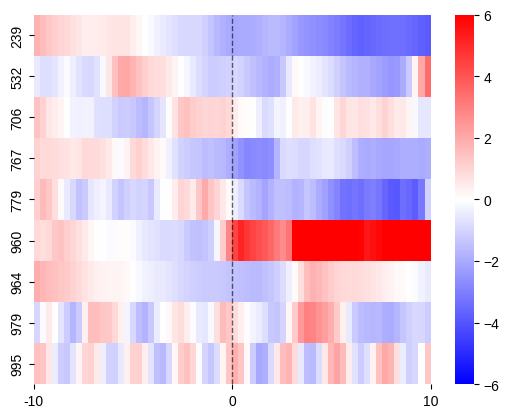

In [83]:
ax = sb.heatmap(trace_hungry_random[trace_hungry_auc_random.auroc<0.4].iloc[:,2:].astype('float'), vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int(Bins/2),Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])

In [84]:
# Identifying cue onsets
df = all_dataframes[11]
random.seed(1989)
cue_range = hungrycue
cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) >0.5)[0]) + 1
if cue_range is not None:
    # Select a subset of cueonset based on cue_range
    cueonset = cueonset[cue_range[0]:cue_range[1]]

cueonset_random = np.array(sorted(random.sample(range(1, cueonset[-1]+int(FR*Cueduration), int((TimeRange_before)*FR)),len(cueonset))),dtype='int')

# Select rows where 'cell_id' is numeric and columns from the third column onwards
trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
trace = trace.sub(trace.mean(axis = 1), axis = 0).divide(trace.std(axis = 1), axis = 0)

tracenew = pd.DataFrame(0, index=trace.index, columns=np.arange(TotalFrame))
# Create an empty DataFrame to store concatenated traces for each cell
total_cue_length = int(CompareRange_base * FR) + int(CompareRange_after * FR)
tracenew_bycue_random = pd.DataFrame(index=trace.index, columns=np.arange(total_cue_length * len(cueonset)))

# Aligning traces based on cue onset and store each trials
for i, onset in enumerate(cueonset_random):
        # Calculate the valid start indices for each cue onset
        valid_starts = np.arange(onset - int(CompareRange_base * FR), onset + int(CompareRange_after * FR))
        # Ensure the indices are within the bounds of the trace
        valid_starts = valid_starts[(valid_starts >= 0) & (valid_starts <  len(trace.columns))]
        
        # Concatenate the trace data around the cue
        tracenew_bycue_random.iloc[:, i*total_cue_length:(i+1)*total_cue_length] = trace.iloc[:, valid_starts]


# Define the time window before and after cue onset
time_before_cue = int(CompareRange_base * FR)
time_after_cue = int(CompareRange_after * FR)

# Initialize the binary series for cue onset
cue_length = time_before_cue + time_after_cue
cueon_per_cue = [0] * time_before_cue + [1] * time_after_cue
cueon = cueon_per_cue * len(cueonset_random)  # Repeat for the number of cues

In [85]:
test_neuron = tracenew_bycue_random.iloc[9, :]
fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
roc_auc = auc(fpr, tpr)

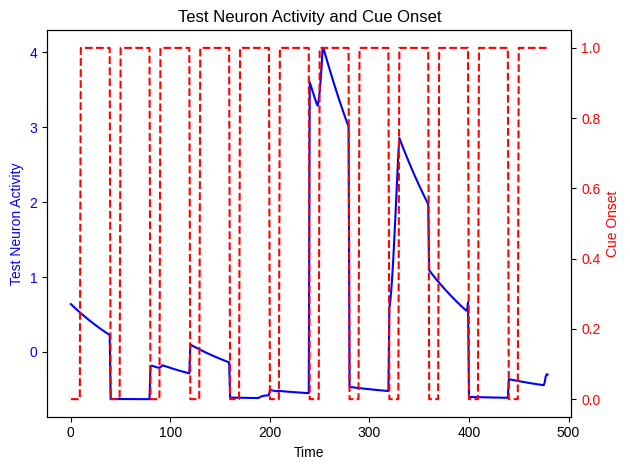

In [86]:
fig, ax1 = plt.subplots()
# Plotting test neuron data
ax1.plot(test_neuron, color='b', label='Test Neuron')
ax1.set_xlabel('Time')
ax1.set_ylabel('Test Neuron Activity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create another axis for the binary cue data
ax2 = ax1.twinx()
ax2.plot(cueon, color='r', linestyle='--', label='Cue Onset')
ax2.set_ylabel('Cue Onset', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Showing the plot
plt.title('Test Neuron Activity and Cue Onset')
fig.tight_layout()
plt.show()

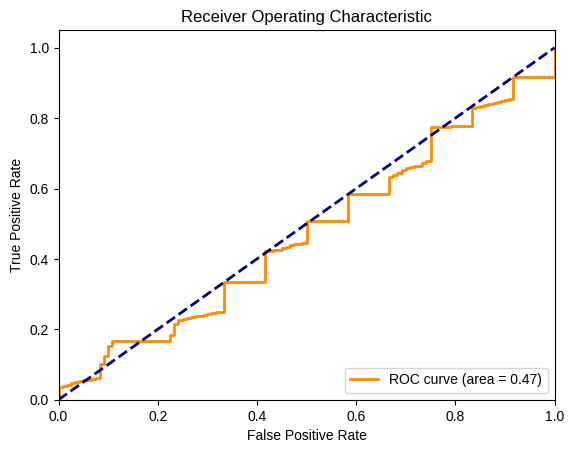

In [87]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [88]:
def calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR, cueonset):
    # Define the time window before and after cue onset
    time_before_cue = int(CompareRange_base * FR)
    time_after_cue = int(CompareRange_after * FR)

    # Initialize the binary series for cue onset
    cue_length = time_before_cue + time_after_cue
    cueon_per_cue = [0] * time_before_cue + [1] * time_after_cue
    cueon = cueon_per_cue * len(cueonset)  # Repeat for the number of cues
    
    # Initialize the DataFrame for ROC AUC results with the same index as tracenew_bycue and one column 'auroc'
    roc_aucs = pd.DataFrame(index=tracenew_bycue.index, columns=['auroc'])

    # Calculate the ROC AUC for each neuron
    for neuron_index in tracenew_bycue.index:
        test_neuron = tracenew_bycue.loc[neuron_index, :]
        fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
        roc_auc = auc(fpr, tpr)
        roc_aucs.at[neuron_index, 'auroc'] = roc_auc  # Assign the calculated AUROC value
        
    return roc_aucs

def calculate_changes_auc_bycue_random(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, num_shifts=1000, seed=1989):
    random.seed(seed)
    cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) > 0.5)[0]) + 1 - int(30*FR)
    if cue_range is not None:
        cueonset = cueonset[cue_range[0]:cue_range[1]]
    cueonset_random = np.array(sorted(random.sample(range(1, cueonset[-1]+int(FR*Cueduration), int((TimeRange_before)*FR)),len(cueonset))),dtype='int')

    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
    trace = trace.sub(trace.mean(axis=1), axis=0).divide(trace.std(axis=1), axis=0)

    # Initialize a list to store the ROC AUC DataFrames for all shifts
    roc_aucs_list = []

    for j in range(num_shifts):
        shift = random.randint(0, len(trace.columns))
        shifted_trace = np.roll(trace.values, shift, axis=1)

        # Create an empty DataFrame to store concatenated traces for each cell
        total_cue_length = int(CompareRange_base * FR) + int(CompareRange_after * FR)
        tracenew_bycue = pd.DataFrame(index=trace.index, columns=np.arange(total_cue_length * len(cueonset)))

        # Concatenate the trace data around each cue for each shift
        for i, onset in enumerate(cueonset_random):
            valid_starts = np.arange(onset - int(CompareRange_base * FR), onset + int(CompareRange_after * FR))
            valid_starts = valid_starts[(valid_starts >= 0) & (valid_starts < len(shifted_trace[0]))]
            tracenew_bycue.iloc[:, i * total_cue_length : (i + 1) * total_cue_length] = shifted_trace[:, valid_starts]

        # Calculate the ROC AUC for this shift
        roc_aucs_shift = calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR, cueonset_random)
        
        # Append the DataFrame of AUROCs from this shift to the list
        roc_aucs_shift.rename(columns={'auroc': f'Shift_{j}'}, inplace=True)
        roc_aucs_list.append(roc_aucs_shift)

    # Concatenate all DataFrames in the list to a single DataFrame
    roc_aucs_all_shifts = pd.concat(roc_aucs_list, axis=1)

    return roc_aucs_all_shifts


def worker_process_auc_random(data):
    FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, df = data
    # Call the calculate_changes_auc function with appropriate parameters
    return calculate_changes_auc_bycue_random(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range)

def parallel_process_and_calculate_change_auc_random(all_dataframes, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range):
    # Determining the number of processes based on available CPU cores
    num_processes = psutil.cpu_count(logical=False)

    # Create a multiprocessing pool and process data
    pool = multiprocessing.Pool(processes=num_processes)
    results = pool.map(worker_process_auc_random, [(FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, df) for df in all_dataframes])
    pool.close()
    pool.join()

    # Flatten list of results and convert to DataFrame
    final_df = pd.concat([pd.DataFrame(result) for result in results], ignore_index=True)
    return final_df


# The final_results_df contains the calculated changes for each DataFrame


In [89]:
%%time
change_shift_auc_random = parallel_process_and_calculate_change_auc_random(all_dataframes, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=hungrycue)

Process ForkPoolWorker-72:
Process ForkPoolWorker-79:
Process ForkPoolWorker-68:
Process ForkPoolWorker-67:
Process ForkPoolWorker-89:
Process ForkPoolWorker-83:
Process ForkPoolWorker-77:
Process ForkPoolWorker-91:
Process ForkPoolWorker-85:
Process ForkPoolWorker-78:
Process ForkPoolWorker-90:
Process ForkPoolWorker-86:
Process ForkPoolWorker-94:
Process ForkPoolWorker-66:
Process ForkPoolWorker-71:
Process ForkPoolWorker-87:
Process ForkPoolWorker-73:
Process ForkPoolWorker-96:
Process ForkPoolWorker-75:
Process ForkPoolWorker-92:
Process ForkPoolWorker-93:
Process ForkPoolWorker-70:
Process ForkPoolWorker-81:
Process ForkPoolWorker-88:
Process ForkPoolWorker-74:
Process ForkPoolWorker-69:
Process ForkPoolWorker-80:
Process ForkPoolWorker-95:
Process ForkPoolWorker-82:
Process ForkPoolWorker-65:
Process ForkPoolWorker-84:
Process ForkPoolWorker-76:
Traceback (most recent call last):
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/process.py", line

KeyboardInterrupt: 

Traceback (most recent call last):
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/site-packages/pandas/core/internals/construction.py", line 153, in arrays_to_mgr
    return create_block_manager_from_column_arrays(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Traceback (most recent call last):
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run

  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/work/09117/xz6783/ls

  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
KeyboardInterrupt
KeyboardInterrupt
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
                    ^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt
  File "/work/091

  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
                    ^^^^^^^^^^^^^^^^^^^
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
           ^^^^^^^^^^^^^^^^
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
           ^^^^^^^^^^^^^^^^
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
           ^^^^^^^^^^^^^^^^
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*

  File "/tmp/ipykernel_3950971/2129704833.py", line 51, in calculate_changes_auc_bycue_random
    roc_aucs_shift = calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR, cueonset_random)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_3950971/2129704833.py", line 51, in calculate_changes_auc_bycue_random
    roc_aucs_shift = calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR, cueonset_random)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_3950971/2129704833.py", line 17, in calculate_roc_auc_bycue
    fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_3950971/2129704833.py", line 51, in calculate_changes_auc_bycue_random
    roc_aucs_shift = calculate_roc_au

  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/site-packages/sklearn/metrics/_ranking.py", line 752, in _binary_clf_curve
    y_true = column_or_1d(y_true)
             ^^^^^^^^^^^^^^^^^^^^
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/site-packages/sklearn/metrics/_ranking.py", line 747, in _binary_clf_curve
    y_type = type_of_target(y_true, input_name="y_true")
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/site-packages/sklearn/metrics/_ranking.py", line 752, in _binary_clf_curve
    y_true = column_or_1d(y_true)
             ^^^^^^^^^^^^^^^^^^^^
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/site-packages/sklearn/metrics/_ranking.py", line 752, in _binary_clf_curve
    y_true = column_or_1d(y_true)
             ^^^^^^^^^^^^^^^^^^^^
  File "<__array_function__ internals>", line 200, in trapz
  File "/tmp/ipykernel_3950971/2129704833.py", lin

  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/site-packages/pandas/core/dtypes/common.py", line 186, in is_object_dtype
    return _is_dtype_type(arr_or_dtype, classes(np.object_))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/site-packages/sklearn/utils/validation.py", line 581, in _check_estimator_name
    def _check_estimator_name(estimator):
    
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 63, in __getattr__
    def __getattr__(self, name):
    
KeyboardInterrupt
  File "/work/09117/xz6783/ls6/Anaconda/envs/sklearn/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<__array_function__ internals>", line 200, in isclose
  File 

In [90]:
sb.histplot(change_shift_auc_random.iloc[6])


NameError: name 'change_shift_auc_random' is not defined

In [ ]:
before_hungry_random = trace_hungry_random.iloc[:, (Bins_before - int(CompareRange_base * FR / BinSize)+2) : Bins_before+2]
after_hungry_random = trace_hungry_random.iloc[:,Bins_before+2:(Bins_before+int(CompareRange_after*FR/BinSize)+2)]
change_hungry_random = after_hungry_random.mean(axis= 1) - before_hungry_random.mean(axis=1)

change_hungry_auc_random = trace_hungry_auc_random.auroc
excited_hungry_auc_random = pd.DataFrame()
inhibited_hungry_auc_random = pd.DataFrame()


excited_indices_auc_random = []
inhibited_indices_auc_random = []

for i in range(len(trace_hungry_auc_random)):
    change = change_hungry_auc_random[i]
    change_dist = change_shift_auc_random.iloc[i, :]

    if change > np.quantile(change_dist, 0.975): 
        excited_indices_auc_random.append(i)
    elif change < np.quantile(change_dist, 0.025): 
        inhibited_indices_auc_random.append(i)
        
excited_indices_auc_random = set(excited_indices_auc_random).intersection(set(np.where(change_hungry_random>0.5)[0]))
inhibited_indices_auc_random = set(inhibited_indices_auc_random).intersection(set(np.where(change_hungry_random<-0.5)[0]))

# Using .iloc to select rows and then concat to form the final DataFrame
excited_hungry_auc_random = pd.concat([trace_hungry_random.iloc[i] for i in excited_indices_auc_random], axis=1).T
inhibited_hungry_auc_random = pd.concat([trace_hungry_random.iloc[i] for i in inhibited_indices_auc_random], axis=1).T

# excited_hungry_auc_random = excited_hungry_auc_random[(excited_hungry_auc_random.iloc[:,Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]>1.645).any(axis =1)]
# excited_hungry_auc_random = excited_hungry_auc_random[(excited_hungry_auc_random.iloc[:,Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]>-1.96).all(axis =1)]
excited_hungry_auc_random = excited_hungry_auc_random[(excited_hungry_auc_random.iloc[:, Bins_before-int(CompareRange_base*FR/BinSize)+2:Bins_before+2]< 1).all(axis =1)]

# inhibited_hungry_auc_random = inhibited_hungry_auc_random[(inhibited_hungry_auc_random.iloc[:, Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]< -1.645).any(axis =1)]
# inhibited_hungry_auc_random = inhibited_hungry_auc_random[(inhibited_hungry_auc_random.iloc[:, Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]< 1.96).all(axis =1)]
inhibited_hungry_auc_random = inhibited_hungry_auc_random[(inhibited_hungry_auc_random.iloc[:, Bins_before-int(CompareRange_base*FR/BinSize)+2:Bins_before+2]> -1).all(axis =1)]

# excited_hungry_auc_random = excited_hungry_auc_random[trace_hungry_auc_random.iloc[excited_hungry_auc_random.index.values].auroc>0.55]
# inhibited_hungry_auc_random = inhibited_hungry_auc_random[trace_hungry_auc_random.iloc[inhibited_hungry_auc_random.index.values].auroc<0.45]

excited_indices_auc_random = excited_hungry_auc_random.index.values.tolist()
inhibited_indices_auc_random = inhibited_hungry_auc_random.index.values.tolist()

excited_hungry_mean_auc_random = excited_hungry_auc_random.iloc[:,2:].mean(axis=0).astype('float')
excited_hungry_sem_auc_random = excited_hungry_auc_random.iloc[:,2:].sem(axis=0).astype('float')
inhibited_hungry_mean_auc_random = inhibited_hungry_auc_random.iloc[:,2:].mean(axis=0).astype('float')
inhibited_hungry_sem_auc_random = inhibited_hungry_auc_random.iloc[:,2:].sem(axis=0).astype('float')


In [ ]:
x=np.arange(Bins)
y=excited_hungry_mean_auc_random
err = excited_hungry_sem_auc_random
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.fill_between(x, y-err, y+err, color='pink')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 2, framealpha = 0)
len(excited_hungry_auc_random)

In [ ]:
x=np.arange(Bins)
y=inhibited_hungry_mean_auc_random
err = inhibited_hungry_sem_auc_random
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue', linestyle = '-')
ax.fill_between(x, y-err, y+err, color='powderblue')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
# ax.set_ylim(-,1)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry_auc_random)

In [ ]:
x=np.arange(Bins)
y=excited_hungry_auc_random.iloc[:,2:]
fig, ax = plt.subplots()
for i in range(len(y)):
    ax.plot(x, y.iloc[i,:])
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
# ax.set_ylim(-5,30)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry_auc_random)

In [ ]:
x=np.arange(Bins)
y=inhibited_hungry_auc_random.iloc[:,2:]
err = inhibited_hungry_sem_auc_random
fig, ax = plt.subplots()
for i in range(len(y)):
    ax.plot(x, y.iloc[i,:])
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
# ax.set_ylim(-4.,5)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry_auc_random)

In [ ]:
ax = sb.heatmap(inhibited_hungry_auc_random.iloc[:,2:].astype('float'), vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,Bins_before,Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0,len(inhibited_hungry_auc_random)])
ax.set_yticklabels([0, len(inhibited_hungry_auc_random)])

In [ ]:
ax = sb.heatmap(excited_hungry_auc_random.iloc[:,2:].astype('float'), vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int(Bins/2),Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0,len(excited_hungry_auc_random)])
ax.set_yticklabels([0, len(excited_hungry_auc_random)])

In [ ]:
common_excited_indices

In [ ]:
common_inhibited_indices

In [ ]:
total_cells = len(trace_hungry_random)

# Calculate percentages
percent_excited_random = len(excited_hungry_auc_random) / total_cells * 100
percent_inhibited_random = len(inhibited_hungry_auc_random) / total_cells * 100

# Assuming excited_indices contains the indices for excited cells from the original trace_hungry DataFrame
percent_excited = len(excited_hungry_auc) / total_cells * 100
percent_inhibited = len(inhibited_indices_auc) / total_cells * 100

# Find the intersection (cells that are in both excited_indices_30s and excited_indices)
common_excited_indices = set(excited_indices_auc_random).intersection(set(excited_indices_auc))
percent_common_excited = len(common_excited_indices) / total_cells * 100

common_inhibited_indices = set(inhibited_indices_auc_random).intersection(set(inhibited_indices_auc))
percent_common_inhibited = len(common_inhibited_indices) / total_cells * 100

excited_inhibitedrandom_indices = set(excited_indices_auc).intersection(set(inhibited_indices_auc_random))
percent_excited_inhibitedrandom = len(excited_inhibitedrandom_indices) / total_cells * 100

inhibited_excitedrandom_indices = set(inhibited_indices_auc).intersection(set(excited_indices_auc_random))
percent_inhibited_excitedrandom = len(inhibited_excitedrandom_indices) / total_cells * 100

# Printing the results
print(f"Percentage of excited cells (30s): {percent_excited_random:.2f}%")
print(f"Percentage of inhibited cells (30s): {percent_inhibited_random:.2f}%")
print(f"Percentage of excited cells: {percent_excited:.2f}%")
print(f"Percentage of inhibited cells: {percent_inhibited:.2f}%")
print(f"Percentage of cells excited in both cases: {percent_common_excited:.2f}%")
print(f"Percentage of cells inhibited in both cases: {percent_common_inhibited:.2f}%")
print(f"Percentage of cells excited in hungry cues and inhibited 30s before: {percent_excited_inhibitedrandom:.2f}%")
print(f"Percentage of cells inhibited in hungry cues and excited 30s before: {percent_inhibited_excitedrandom:.2f}%")



In [ ]:
# Assuming you have the total number of cells and the counts for each category
total_cells = len(trace_hungry_auc.index)
excited_auc_random_count = len(excited_indices_auc_random)
inhibited_auc_random_count = len(inhibited_indices_auc_random)
excited_count = len(excited_indices_auc)
inhibited_count = len(inhibited_indices_auc)
common_excited_count = len(common_excited_indices)
common_inhibited_count = len(common_inhibited_indices)
excited_inhibitedrandom_count = len(excited_inhibitedrandom_indices)
inhibited_excitedrandom_count = len(inhibited_excitedrandom_indices)

# Calculate the count of cells not in any of the above categories
other_count = total_cells - (excited_auc_random_count + inhibited_auc_random_count + excited_count + inhibited_count + common_excited_count + common_inhibited_count + excited_inhibitedrandom_count + inhibited_excitedrandom_count)

# Calculate percentages
percentages = {
    "Excited (random)": excited_auc_random_count / total_cells * 100,
    "Inhibited (random)": inhibited_auc_random_count / total_cells * 100,
    "Excited": excited_count / total_cells * 100,
    "Inhibited": inhibited_count / total_cells * 100,
    "Common Excited": common_excited_count / total_cells * 100,
    "Common Inhibited": common_inhibited_count / total_cells * 100,
    "Excited but Inhibited in random": excited_inhibitedrandom_count / total_cells * 100,
    "Inhibited but Excited in random": inhibited_excitedrandom_count / total_cells * 100,
    "Other": other_count / total_cells * 100
}

# Code to create a pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(percentages.values(), labels=percentages.keys(), autopct='%1.1f%%', startangle=140)

# Draw a legend with some space around each entry
ax.legend(wedges, percentages.keys(), loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Composition of Cell Responses')
plt.show()





In [ ]:
excited_indices_auc_random[1]

In [ ]:
trace_hungry.iloc[456]

In [ ]:
all_dataframes[9].iloc[7]

In [ ]:
plt.plot(all_dataframes[9].iloc[7,2:])

In [ ]:
random.seed(1989)
df = all_dataframes[9]
cue_range = hungrycue
cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) >0.5)[0]) + 1
if cue_range is not None:
    # Select a subset of cueonset based on cue_range
    cueonset = cueonset[cue_range[0]:cue_range[1]]
cueonset_random = np.array(sorted(random.sample(range(1, cueonset[-1]+int(FR*Cueduration), int((TimeRange_before)*FR)),len(cueonset))),dtype='int')

plt.plot(all_dataframes[9].iloc[7, 2:15000])
for i in range(len(cueonset)):
    plt.axvline(cueonset[i], c = 'r')
    plt.axvline(cueonset_random[i], c = 'g')

In [ ]:
plt.plot(trace_hungry.iloc[456, 2:])
plt.plot(trace_hungry_random.iloc[456, 2:])

In [ ]:
x=np.arange(Bins)
y=excited_hungry_mean_auc
z=excited_hungry_mean_auc_random
erry = excited_hungry_sem_auc
errz = excited_hungry_sem_auc_random
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.plot(x, z, label = 'Excited in random', color = 'darkorange')
ax.fill_between(x, y-erry, y+erry, color='pink', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='peachpuff', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry_auc)


In [ ]:
x=np.arange(Bins)
y=inhibited_hungry_mean_auc
z=inhibited_hungry_mean_auc_random
erry = inhibited_hungry_sem_auc
errz = inhibited_hungry_sem_auc_random
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue')
ax.plot(x, z, label = 'Inhibited in random', color = 'turquoise')
ax.fill_between(x, y-erry, y+erry, color='lightskyblue', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='aquamarine', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-4, 3)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize= 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry_auc)

In [ ]:
tracesatiated = pd.DataFrame()

for n in range(len(os.listdir(satiated_dir))):
    f = pd.read_pickle(os.path.join(satiated_dir, os.listdir(satiated_dir)[n]))
    cueonset = np.array(np.where(np.diff(np.concatenate(([0],f.loc['cue']>0)))>0)[0])
    start = cueonset-FrameRange
    trace = f[:(len(f)-2)] 
    tracenew = pd.DataFrame(0, index = trace.index, columns= np.arange(TotalFrame))
    for i in range(TotalFrame):
        tracenew.iloc[:,i] = trace.iloc[:,start+i].mean(axis=1)
    tracebin = tracenew.groupby(pd.cut(tracenew.columns,Bins),axis=1).mean()
    tracebin.columns = np.arange(0,Bins)
    tracezscore = tracebin.sub(tracebin.iloc[:,0:int((Bins/2))].mean(axis=1),axis = 0).divide(tracebin.iloc[:,0:int((Bins/2))].std(axis=1),axis=0)
    tracesatiated = tracesatiated.append(tracezscore)

tracesorted_satiated = tracesatiated.sort_values(by=int((Bins/2)), axis =0)
ax = sb.heatmap(tracesorted_satiated, vmin = -5, vmax= 5, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(tracesorted_satiated)])
ax.set_yticklabels([0, len(tracesorted_satiated)])
print(str(len(tracesatiated)) + ' neurons in Satiated')

In [ ]:
tracesatiated.iloc[excited_satiated_where[0].values]

In [ ]:
tracehungry.iloc[inhibited_hungry_where[0].values]

In [ ]:
trace=pd.read_pickle(os.path.join(hungry_dir, os.listdir(hungry_dir)[4]))
len(trace)

In [ ]:
fig, ax = plt.subplots()
ax.plot(trace.loc['17'][(cueonset[5]-3000):(cueonset[5]+3000)], color = 'gray')
ax.axvspan(3921, 3921+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(5107, 5107+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(6292, 6292+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(7478, 7478+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(8664, 8664+10*FR, color = 'Orange', alpha = 0.5)
ax.axhline(y = 0, xmin = 0.89, xmax=0.965, lw=2, color = 'black')
ax.axvline(x= 10000, ymin =0.05, ymax = 0.26, lw =1, color = 'black')

In [ ]:
fig, ax = plt.subplots()
ax.plot(trace.loc['30'][(cueonset[5]-3000):(cueonset[5]+3000)], color = 'red')
ax.axvspan(3921, 3921+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(5107, 5107+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(6292, 6292+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(7478, 7478+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(8664, 8664+10*FR, color = 'Orange', alpha = 0.5)

In [ ]:
fig, ax = plt.subplots()
ax.plot(trace.iloc[21, (cueonset[5]-3000):(cueonset[5]+3000)], color = 'red')
ax.axvspan(3921, 3921+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(5107, 5107+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(6292, 6292+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(7478, 7478+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(8664, 8664+10*FR, color = 'Orange', alpha = 0.5)

In [ ]:
fig, ax = plt.subplots()
ax.plot(trace.loc['66'][(cueonset[5]-3000):(cueonset[5]+3000)], color = 'deepskyblue')
ax.axvspan(3921, 3921+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(5107, 5107+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(6292, 6292+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(7478, 7478+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(8664, 8664+10*FR, color = 'Orange', alpha = 0.5)

In [ ]:
fig, ax = plt.subplots()
ax.plot(trace.loc['2'][(cueonset[5]-3000):(cueonset[5]+3000)], color = 'deepskyblue')
ax.axvspan(3921, 3921+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(5107, 5107+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(6292, 6292+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(7478, 7478+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(8664, 8664+10*FR, color = 'Orange', alpha = 0.5)

In [ ]:
fig, ax = plt.subplots()
ax.plot(trace.loc['190'][(cueonset[5]-3000):(cueonset[5]+3000)], color = 'deepskyblue')
ax.axvspan(3921, 3921+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(5107, 5107+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(6292, 6292+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(7478, 7478+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(8664, 8664+10*FR, color = 'Orange', alpha = 0.5)

In [ ]:
cueonset

In [ ]:
%%time

change_shift_satiated = np.array([])

for n in range(len(os.listdir(satiated_dir))):
    f = pd.read_pickle(os.path.join(satiated_dir, os.listdir(satiated_dir)[n]))
    cueonset = np.array(np.where(np.diff(np.concatenate(([0],f.loc['cue']>0)))>0)[0])
    start = cueonset-FrameRange
    trace = f[:(len(f)-2)]
    change_shift = np.zeros((len(trace), 100))
    shift = random.sample(range(len(trace.columns)), 100)
    trace = np.array(trace)
    for j in range(len(shift)):        
        tracenew = pd.DataFrame(0, index = f[:(len(f)-2)].index, columns= np.arange(TotalFrame))
        trace = np.roll(trace, shift[j], axis = 1)
        for i in range(TotalFrame):
            tracenew.iloc[:,i] = trace[:,start+i].mean(axis=1)
        tracebin = tracenew.groupby(pd.cut(tracenew.columns,Bins),axis=1).mean()
        tracebin.columns = np.arange(0,Bins)
        tracezscore = tracebin.sub(tracebin.iloc[:,0:int((Bins/2))].mean(axis=1),axis = 0).divide(tracebin.iloc[:,0:int((Bins/2))].std(axis=1),axis=0)
        before_shift = tracezscore.iloc[:,(int(Bins/2)-int(CompareRange_base*FR/BinSize)):(int((Bins/2)))].mean(axis=1)
        after_shift = tracezscore.iloc[:,(int((Bins/2))):(int(Bins/2)+int(CompareRange_after*FR/BinSize))].mean(axis=1)
        change = after_shift - before_shift
        change_shift[:, j] = change
    change_shift_satiated = np.vstack([change_shift_satiated, change_shift]) if change_shift_satiated.size else change_shift

In [ ]:
before_satiated = tracesatiated.iloc[:,(int(Bins/2)-int(CompareRange_base*FR/BinSize)):(int((Bins/2)))]
after_satiated = tracesatiated.iloc[:,(int((Bins/2))):(int(Bins/2)+int(CompareRange_after*FR/BinSize))]
change_satiated = after_satiated.mean(axis= 1) - before_satiated.mean(axis=1)

excited_satiated = pd.DataFrame()
inhibited_satiated = pd.DataFrame()
excitedsem_satiated = pd.DataFrame()
inhibitedsem_satiated = pd.DataFrame()

excited_satiated_where = pd.DataFrame()
inhibited_satiated_where = pd.DataFrame()

for i in range(len(tracesatiated)):
    if (change_satiated[i] > np.quantile(change_shift_satiated[i], 0.975)):#  & (np.absolute(tracesatiated.iloc[:,(int(Bins/2)-int(1*FR/BinSize)):(int((Bins/2)))].mean(axis=1)[i]) < 1):
        excited_satiated = excited_satiated.append(tracesatiated.iloc[i,:])
        excited_satiated_where = excited_satiated_where.append([i])
        #excitedsem = excitedsem.append(trace_sem.iloc[i,:])
    elif (change_satiated[i] < np.quantile(change_shift_satiated[i], 0.025)):#  &  (np.absolute(tracesatiated.iloc[:,(int(Bins/2)-int(1*FR/BinSize)):(int((Bins/2)))].mean(axis=1)[i]) < 1):
        inhibited_satiated = inhibited_satiated.append(tracesatiated.iloc[i,:])
        inhibited_satiated_where = inhibited_satiated_where.append([i])
        #inhibitedsem = inhibitedsem.append(trace_sem.iloc[i,:])


excited_satiated_mean = excited_satiated.mean(axis=0)
excited_satiated_sem = excited_satiated.sem(axis=0)
inhibited_satiated_mean = inhibited_satiated.mean(axis=0)
inhibited_satiated_sem = inhibited_satiated.sem(axis=0)

In [ ]:
x=np.arange(Bins)
y=excited_satiated_mean
err = excited_satiated_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Satiated', color = 'red')
ax.fill_between(x, y-err, y+err, color='pink')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_satiated)

In [ ]:
x=np.arange(Bins)
y=inhibited_satiated_mean
err = inhibited_satiated_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Satiated', color = 'deepskyblue')
ax.fill_between(x, y-err, y+err, color='powderblue')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_satiated)

In [ ]:
ax = sb.heatmap(inhibited_satiated, vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(inhibited_satiated)])
ax.set_yticklabels([0, len(inhibited_satiated)])

In [ ]:
ax = sb.heatmap(excited_satiated, vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(excited_satiated)])
ax.set_yticklabels([0, len(excited_satiated)])

In [ ]:
x=np.arange(Bins)
y=excited_hungry_mean
z=excited_satiated_mean
erry = excited_hungry_sem
errz = excited_satiated_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.plot(x, z, label = 'Excited in Satiated', color = 'darkorange')
ax.fill_between(x, y-erry, y+erry, color='pink', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='peachpuff', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry)

In [ ]:
x=np.arange(Bins)
y=inhibited_hungry_mean
z=inhibited_satiated_mean
erry = inhibited_hungry_sem
errz = inhibited_satiated_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue')
ax.plot(x, z, label = 'Inhibited in Satiated', color = 'turquoise')
ax.fill_between(x, y-erry, y+erry, color='lightskyblue', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='aquamarine', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-4, 3)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize= 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry)

In [ ]:
excited_hungry_insatiated_mean = tracesatiated.iloc[excited_hungry_where[0].values].mean(axis=0)
excited_hungry_insatiated_sem =  tracesatiated.iloc[excited_hungry_where[0].values].sem(axis=0)

In [ ]:
x=np.arange(Bins)
y=excited_hungry_mean
z=excited_hungry_insatiated_mean
erry = excited_hungry_sem
errz = excited_hungry_insatiated_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.plot(x, z, label = 'Same Cell in Satiated', color = 'grey')
ax.fill_between(x, y-erry, y+erry, color='pink', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='lightgrey', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-1, 14)
ax.axvline(int((Bins/2)), ymax=0.8, color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry)

In [ ]:
inhibited_hungry_insatiated_mean = tracesatiated.iloc[inhibited_hungry_where[0].values].mean(axis=0)
inhibited_hungry_insatiated_sem =  tracesatiated.iloc[inhibited_hungry_where[0].values].sem(axis=0)

In [ ]:
x=np.arange(Bins)
y=inhibited_hungry_mean
z=inhibited_hungry_insatiated_mean
erry = inhibited_hungry_sem
errz = inhibited_hungry_insatiated_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Hungry', color='deepskyblue')
ax.plot(x, z, label = 'Same Cell in Satiated', color='grey')
ax.fill_between(x, y-erry, y+erry, color = 'powderblue', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color = 'lightgrey', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-4, 3)
ax.axvline(int((Bins/2)), ymax=0.8,color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry)

In [ ]:
excited_satiated_inhungry_mean = tracehungry.iloc[excited_satiated_where[0].values].mean(axis=0)
excited_satiated_inhungry_sem =  tracehungry.iloc[excited_satiated_where[0].values].sem(axis=0)

In [ ]:
x=np.arange(Bins)
y=excited_satiated_mean
z=excited_satiated_inhungry_mean
erry = excited_satiated_sem
errz = excited_satiated_inhungry_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Satiated',color='red')
ax.plot(x, z, label = 'Same Cell in Hungry',color='grey')
ax.fill_between(x, y-erry, y+erry, color = 'pink', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color = 'lightgrey', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-1, 14)
ax.axvline(int((Bins/2)), ymax = 0.8,color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_satiated)

In [ ]:
inhibited_satiated_inhungry_mean = tracehungry.iloc[inhibited_satiated_where[0].values].mean(axis=0)
inhibited_satiated_inhungry_sem =  tracehungry.iloc[inhibited_satiated_where[0].values].sem(axis=0)

In [ ]:
x=np.arange(Bins)
y=inhibited_satiated_mean
z=inhibited_satiated_inhungry_mean
erry = inhibited_satiated_sem
errz = inhibited_satiated_inhungry_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Satiated',color='deepskyblue')
ax.plot(x, z, label = 'Same Cell in Hungry',color='grey')
ax.fill_between(x, y-erry, y+erry, color = 'powderblue', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color = 'lightgrey', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-4, 3)
ax.axvline(int((Bins/2)), ymax = 0.8, color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_satiated)

In [ ]:
tracehungry.reset_index(inplace=True)
tracesorted_hungry = tracehungry.sort_values(by=int((Bins/2)), axis =0)

In [ ]:
tracesatiated.reset_index(inplace=True)
tracesorted_satiated = tracesatiated.sort_values(by=int((Bins/2)), axis =0)

In [ ]:
cross_hungry_satiated = tracesatiated.iloc[tracesorted_hungry.index, 1:]
cross_hungry_satiated
ax = sb.heatmap(cross_hungry_satiated, vmin = -5, vmax= 5, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(cross_hungry_satiated)])
ax.set_yticklabels([0, len(cross_hungry_satiated)])
print(str(len(tracesatiated)) + ' neurons in Satiated')

In [ ]:
cross_satiatde_hungry = tracehungry.iloc[tracesorted_satiated.index, 1:]

ax = sb.heatmap(cross_satiatde_hungry, vmin = -5, vmax= 5, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(cross_satiatde_hungry)])
ax.set_yticklabels([0, len(cross_satiatde_hungry)])
print(str(len(tracesatiated)) + ' neurons in Satiated')

In [ ]:
tracesatiated_mean = tracesatiated.iloc[:,1:].mean(axis=0)#.dropna(axis=0))
tracesatiated_sem = tracesatiated.iloc[:,1:].sem(axis=0)#.dropna(axis=0))
tracehungry_mean = tracehungry.iloc[:,1:].mean(axis=0)#.dropna(axis=0)
tracehungry_sem = tracehungry.iloc[:,1:].sem(axis=0)#.dropna(axis=0)

In [ ]:
tracesatiated_mean

In [ ]:
x=np.arange(Bins)
z=tracesatiated_mean
y=tracehungry_mean
errz = tracesatiated_sem
erry = tracehungry_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Average Response in Hungry', color = '#687eac')
ax.plot(x, z, label = 'Average Response in Satiated', color = '#e66943')
ax.fill_between(x, y-erry, y+erry, color='steelblue', alpha = 0.3)
ax.fill_between(x, z-errz, z+errz, color='lightsalmon', alpha = 0.3)
ax.set_xlabel('Time(s)', fontsize=16)
ax.set_ylabel('z-score', fontsize=16)
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-1,3)
ax.tick_params(labelsize = 16)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--', ymax = 0.82)
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#len(excited_hungry)

In [ ]:
hungrycells = np.append(excited_hungry_where[0].values, inhibited_hungry_where[0].values)
satiatedcells = np.append(excited_satiated_where[0].values, inhibited_satiated_where[0].values)

In [ ]:
len(np.intersect1d(hungrycells, satiatedcells))

In [ ]:
len((satiatedcells))

In [ ]:
len((hungrycells))

In [ ]:
excited_hungry = tracehungry[np.array(tracehungry.iloc[:,(int((Bins/2))):(int((Bins/2)+(1/(BinSize/FR))))]>Zsig).sum(axis=1) >0]
inhibited_hungry = tracehungry[np.array(tracehungry.iloc[:,(int((Bins/2))):(int((Bins/2)+(1/(BinSize/FR))))]<-ZsigI).sum(axis=1) >0]
excited_hungry_mean = excited_hungry.mean(axis=0)
excited_hungry_sem = excited_hungry.sem(axis=0)
inhibited_hungry_mean = inhibited_hungry.mean(axis=0)
inhibited_hungry_sem = inhibited_hungry.sem(axis=0)

In [ ]:
x=np.arange(Bins)
y=excited_hungry_mean
err = excited_hungry_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.fill_between(x, y-err, y+err, color='pink')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0)
len(excited_hungry)

In [ ]:
x=np.arange(Bins)
y=inhibited_hungry_mean
err = inhibited_hungry_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue')
ax.fill_between(x, y-err, y+err, color='powderblue')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
len(inhibited_hungry)

In [ ]:
excited_satiated = tracesatiated[np.array(tracesatiated.iloc[:,(int((Bins/2))):(int((Bins/2)+(1/(BinSize/FR))))]>Zsig).sum(axis=1) >0]
inhibited_satiated = tracesatiated[np.array(tracesatiated.iloc[:,(int((Bins/2))):(int((Bins/2)+(1/(BinSize/FR))))]<-Zsig).sum(axis=1) >0]
excited_satiated_mean = excited_satiated.mean(axis=0)
excited_satiated_sem = excited_satiated.sem(axis=0)
inhibited_satiated_mean = inhibited_satiated.mean(axis=0)
inhibited_satiated_sem = inhibited_satiated.sem(axis=0)

In [ ]:
x=np.arange(Bins)
y=excited_satiated_mean
err = excited_satiated_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Satiated', color = 'red')
ax.fill_between(x, y-err, y+err, color='pink')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0)
len(excited_satiated)

In [ ]:
x=np.arange(Bins)
y=inhibited_satiated_mean
err = inhibited_satiated_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue')
ax.fill_between(x, y-err, y+err, color='powderblue')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0)
len(inhibited_satiated)

# This section analyze the cells that can be matched across the two sessions

In [ ]:
tracehungry = pd.DataFrame()
animalid = pd.DataFrame()

for n in range(len(os.listdir(hungry_dir))):
    f = pd.read_pickle(os.path.join(hungry_dir, os.listdir(hungry_dir)[n]))
    animalid = pd.DataFrame(np.tile(n,len(f)-2), columns = ['animal'])
    cueonset = np.array(np.where(np.diff(np.concatenate(([0],f.loc['cue']>0)))>0)[0])
    start = cueonset-FrameRange
    trace = f[:(len(f)-2)]
    trace = (trace-trace.mean(axis=0))/trace.mean(axis=0)
    for i in range(TotalFrame):
        tracenew.iloc[:,i] = trace.iloc[:,start+i].mean(axis=1)
    tracebin = tracenew.groupby(pd.cut(tracenew.columns,Bins),axis=1).mean()
    tracebin.columns = np.arange(0,Bins)
    tracezscore = tracebin.sub(tracebin.iloc[:,0:int((Bins/2))].mean(axis=1),axis = 0).divide(tracebin.iloc[:,0:int((Bins/2))].std(axis=1),axis=0)
    tracezscore.insert(0, 'animal', animalid.values)
    tracehungry = tracehungry.append(tracezscore)

In [ ]:
tracesatiated = pd.DataFrame()
animalid = pd.DataFrame()

for n in range(len(os.listdir(satiated_dir))):
    f = pd.read_pickle(os.path.join(satiated_dir, os.listdir(satiated_dir)[n]))
    animalid = pd.DataFrame(np.tile(n,len(f)-2), columns = ['animal'])
    cueonset = np.array(np.where(np.diff(np.concatenate(([0],f.loc['cue']>0)))>0)[0])
    start = cueonset-FrameRange
    trace = f[:(len(f)-2)]
    tracenew = pd.DataFrame(0, index = trace.index, columns= np.arange(TotalFrame))
    for i in range(TotalFrame):
        tracenew.iloc[:,i] = trace.iloc[:,start+i].mean(axis=1)
    tracebin = tracenew.groupby(pd.cut(tracenew.columns,Bins),axis=1).mean()
    tracebin.columns = np.arange(0,Bins)
    tracezscore = tracebin.sub(tracebin.iloc[:,0:int((Bins/2))].mean(axis=1),axis = 0).divide(tracebin.iloc[:,0:int((Bins/2))].std(axis=1),axis=0)
    tracezscore.insert(0, 'animal', animalid.values)
    tracesatiated = tracesatiated.append(tracezscore)

In [ ]:
os.listdir(hungry_dir)

In [ ]:
tracehungry.iloc[excited_hungry_where[0]]

In [ ]:
tracehungry.iloc[inhibited_hungry_where[0]].to_csv('Inhibited_Hungry.csv')

In [ ]:
tracesatiated.iloc[inhibited_satiated_where[0]].to_csv('Inhibited_Satiated.csv')

In [ ]:
tracesatiated.iloc[excited_satiated_where[0]].to_csv('Excited_Satiated.csv')

In [ ]:
tracehungry.iloc[np.sort(np.append(excited_hungry_where[0].values, inhibited_hungry_where[0].values))]

In [ ]:
tracesatiated.iloc[np.sort(np.append(excited_satiated_where[0].values, inhibited_satiated_where[0].values))]

# After the frist run, read from saved csv file

In [ ]:
tracehungry = pd.DataFrame()


for n in range(len(os.listdir(hungry_dir))):
    f = pd.read_pickle(os.path.join(hungry_dir, os.listdir(hungry_dir)[n]))
    cueonset = np.array(np.where(np.diff(np.concatenate(([0],f.loc['cue']>0)))>0)[0])
    start = cueonset-FrameRange
    trace = f[:(len(f)-2)] 
    tracenew = pd.DataFrame(0, index = trace.index, columns= np.arange(TotalFrame))
    for i in range(TotalFrame):
        tracenew.iloc[:,i] = trace.iloc[:,start+i].mean(axis=1)
    tracebin = tracenew.groupby(pd.cut(tracenew.columns,Bins),axis=1).mean()
    tracebin.columns = np.arange(0,Bins)
    tracezscore = tracebin.sub(tracebin.iloc[:,0:int((Bins/2))].mean(axis=1),axis = 0).divide(tracebin.iloc[:,0:int((Bins/2))].std(axis=1),axis=0)
    tracehungry = tracehungry.append(tracezscore)

#tracehungry = tracehungry.dropna()
tracesorted_hungry = tracehungry.sort_values(by=int((Bins/2)), axis =0)
ax = sb.heatmap(tracesorted_hungry, vmin = -5, vmax= 5, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(tracesorted_hungry)])
ax.set_yticklabels([0, len(tracesorted_hungry)])
print(str(len(tracehungry)) + ' neurons in Hungry')

In [ ]:
tracesatiated = pd.DataFrame()

for n in range(len(os.listdir(satiated_dir))):
    f = pd.read_pickle(os.path.join(satiated_dir, os.listdir(satiated_dir)[n]))
    cueonset = np.array(np.where(np.diff(np.concatenate(([0],f.loc['cue']>0)))>0)[0])
    start = cueonset-FrameRange
    trace = f[:(len(f)-2)] 
    tracenew = pd.DataFrame(0, index = trace.index, columns= np.arange(TotalFrame))
    for i in range(TotalFrame):
        tracenew.iloc[:,i] = trace.iloc[:,start+i].mean(axis=1)
    tracebin = tracenew.groupby(pd.cut(tracenew.columns,Bins),axis=1).mean()
    tracebin.columns = np.arange(0,Bins)
    tracezscore = tracebin.sub(tracebin.iloc[:,0:int((Bins/2))].mean(axis=1),axis = 0).divide(tracebin.iloc[:,0:int((Bins/2))].std(axis=1),axis=0)
    tracesatiated = tracesatiated.append(tracezscore)

tracesorted_satiated = tracesatiated.sort_values(by=int((Bins/2)), axis =0)
ax = sb.heatmap(tracesorted_satiated, vmin = -5, vmax= 5, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(tracesorted_satiated)])
ax.set_yticklabels([0, len(tracesorted_satiated)])
print(str(len(tracesatiated)) + ' neurons in Satiated')

In [ ]:
tracehungry = pd.DataFrame()
animalid = pd.DataFrame()

for n in range(len(os.listdir(hungry_dir))):
    f = pd.read_pickle(os.path.join(hungry_dir, os.listdir(hungry_dir)[n]))
    animalid = pd.DataFrame(np.tile(n,len(f)-2), columns = ['animal'])
    cueonset = np.array(np.where(np.diff(np.concatenate(([0],f.loc['cue']>0)))>0)[0])
    start = cueonset-FrameRange
    trace = f[:(len(f)-2)]
    tracenew = pd.DataFrame(0, index = trace.index, columns= np.arange(TotalFrame))
    for i in range(TotalFrame):
        tracenew.iloc[:,i] = trace.iloc[:,start+i].mean(axis=1)
    tracebin = tracenew.groupby(pd.cut(tracenew.columns,Bins),axis=1).mean()
    tracebin.columns = np.arange(0,Bins)
    tracezscore = tracebin.sub(tracebin.iloc[:,0:int((Bins/2))].mean(axis=1),axis = 0).divide(tracebin.iloc[:,0:int((Bins/2))].std(axis=1),axis=0)
    tracezscore.insert(0, 'animal', animalid.values)
    tracehungry = tracehungry.append(tracezscore)

In [ ]:
tracesatiated = pd.DataFrame()
animalid = pd.DataFrame()

for n in range(len(os.listdir(satiated_dir))):
    f = pd.read_pickle(os.path.join(satiated_dir, os.listdir(satiated_dir)[n]))
    animalid = pd.DataFrame(np.tile(n,len(f)-2), columns = ['animal'])
    cueonset = np.array(np.where(np.diff(np.concatenate(([0],f.loc['cue']>0)))>0)[0])
    start = cueonset-FrameRange
    trace = f[:(len(f)-2)]
    tracenew = pd.DataFrame(0, index = trace.index, columns= np.arange(TotalFrame))
    for i in range(TotalFrame):
        tracenew.iloc[:,i] = trace.iloc[:,start+i].mean(axis=1)
    tracebin = tracenew.groupby(pd.cut(tracenew.columns,Bins),axis=1).mean()
    tracebin.columns = np.arange(0,Bins)
    tracezscore = tracebin.sub(tracebin.iloc[:,0:int((Bins/2))].mean(axis=1),axis = 0).divide(tracebin.iloc[:,0:int((Bins/2))].std(axis=1),axis=0)
    tracezscore.insert(0, 'animal', animalid.values)
    tracesatiated = tracesatiated.append(tracezscore)

In [ ]:
excited_hungry = pd.read_csv(".\Excited_Hungry.csv")
inhibited_hungry = pd.read_csv(".\Inhibited_Hungry.csv")
excited_satiated = pd.read_csv(".\Excited_Satiated.csv")
inhibited_satiated = pd.read_csv(".\Inhibited_Satiated.csv")


excited_hungry_where = np.zeros(len(excited_hungry))
inhibited_hungry_where = np.zeros(len(inhibited_hungry))
excited_satiated_where = np.zeros(len(excited_satiated))
inhibited_satiated_where = np.zeros(len(inhibited_satiated))

for i in excited_hungry.index:
    where = np.where((tracehungry.index.values.astype('int64')==excited_hungry.iloc[i,0])&(tracehungry.animal==excited_hungry.iloc[i,1]))[0]
    excited_hungry_where[i] = where
    
for i in inhibited_hungry.index:
    where = np.where((tracehungry.index.values.astype('int64')==inhibited_hungry.iloc[i,0])&(tracehungry.animal==inhibited_hungry.iloc[i,1]))[0]
    inhibited_hungry_where[i] = where
    
for i in excited_satiated.index:
    where = np.where((tracesatiated.index.values.astype('int64')==excited_satiated.iloc[i,0])&(tracesatiated.animal==excited_satiated.iloc[i,1]))[0]
    excited_satiated_where[i] = where
    
for i in inhibited_satiated.index:
    where = np.where((tracesatiated.index.values.astype('int64')==inhibited_satiated.iloc[i,0])&(tracesatiated.animal==inhibited_satiated.iloc[i,1]))[0]
    inhibited_satiated_where[i] = where


In [10]:
excited_hungry

Unnamed: 0  animal         0         1         2         3         4  \
0           49       0  0.342515  0.299781  0.255503  0.206535  0.155874   
1           90       1  0.643532  0.582861  0.536335  0.500849  0.467399   
2           13       2 -0.957388 -0.958418 -0.960143 -0.977648 -0.982409   
3           17       2 -0.628075 -0.600636 -0.627155 -0.657748 -0.688719   
4           27       2  0.726666  0.712248  0.693752  0.663238  0.636301   
5            0       3  2.043608  2.010972  1.971160  1.909079  1.862545   
6           89       4  2.841547  2.769730  2.696487  2.595647  2.491051   
7          104       4 -2.873041 -2.818576 -2.573490 -2.345442 -2.139419   
8          160       4  0.573140  0.523667  0.499219  0.501155  0.526600   
9            2       5  2.189337  2.079935  1.967708  1.845333  1.715901   
10           3       5  0.778368  0.777113  0.774962  0.765590  0.762982   
11           8       5  0.844829  0.859993  0.870377  0.860349  0.828084   
12          13       5  1.310304  1.239922  1.161203  1.086033  1.026563   
13          17       5  0.143179  0.074347  0.047202  0.037812  0.027586   
14          32       5 -0.954341 -1.035540 -1.118582 -1.205754 -1.275461   
15          51       5  0.159154  0.199319  0.233948  0.254901  0.296063   

           5         6         7  ...        390        391        392  \
0   0.113594  0.092515  0.076327  ...   6.601979   6.652251   6.699610   
1   0.422487  0.345118  0.266696  ...   7.393636   7.314766   7.185773   
2  -0.978890 -0.953302 -0.819053  ...   4.355202   4.280049   4.271996   
3  -0.718805 -0.747021 -0.775132  ...   5.736971   5.643561   5.557817   
4   0.617701  0.614280  0.663007  ...   1.467534   1.412842   1.359683   
5   1.817319  1.770899  1.718045  ...   2.864533   2.821525   2.746020   
6   2.472725  2.444532  2.394520  ...  -1.381891  -1.400931  -1.433763   
7  -1.939471 -1.555919 -1.280004  ...   0.265338   0.241452   0.250678   
8   0.572171  0.633646  0.915220  ...   3.608299   3.466429   3.332975   
9   1.714967  1.969959  2.015409  ...   3.947111   3.931745   4.012761   
10  0.761313  0.761650  0.760650  ...  11.199083  11.211127  11.213251   
11  0.773942  0.628224  0.471582  ...   4.240704   4.107105   3.969461   
12  0.939003  0.815280  0.701646  ...   2.003108   1.949923   1.892965   
13  0.010152 -0.001759 -0.019843  ...   2.406945   2.496735   2.587019   
14 -1.336199 -1.393631 -1.451343  ...   7.148495   6.963201   6.777823   
15  0.381392  0.475931  0.503705  ...   4.198831   4.131272   4.057576   

          393        394        395        396        397        398  \
0    6.734829   6.779842   6.887587   7.007971   7.137504   7.271102   
1    7.027968   6.951786   6.899927   6.843732   6.796413   6.742277   
2    4.266741   4.213940   4.132003   4.064872   3.986075   3.952572   
3    5.490813   5.431083   5.374616   5.315561   5.257375   5.195191   
4    1.306788   1.254345   1.199136   1.145440   1.093374   1.034254   
5    2.648706   2.550750   2.452732   2.355807   2.259594   2.168504   
6   -1.484994  -1.536604  -1.586467  -1.633355  -1.680653  -1.731106   
7    0.274048   0.298686   0.336266   0.388255   0.440551   0.481425   
8    3.206484   3.070385   2.929596   2.796489   2.663659   2.527504   
9    4.157780   4.291433   4.468017   4.776303   5.106640   5.393176   
10  11.212100  11.223797  11.244710  11.281183  11.349568  11.423577   
11   3.832577   3.708843   3.607391   3.523243   3.462653   3.429827   
12   1.828093   1.771669   1.730519   1.701160   1.679205   1.663409   
13   2.671141   2.757813   2.848939   2.931022   3.003861   3.149764   
14   6.623813   6.499423   6.393158   6.302641   6.220212   6.128380   
15   3.975261   3.902369   3.850051   3.813382   3.794183   3.783150   

          399  
0    7.409998  
1    6.683928  
2    3.877277  
3    5.133438  
4    0.973228  
5    2.087889  
6   -1.781002  
7    0.607504  
8    2.384126  
9    5.303249  
10  11.495354  
11   3.441921  
12   1.636880  
13 

[Text(0, 0.5, '0'), Text(0, 2.5, '24')]

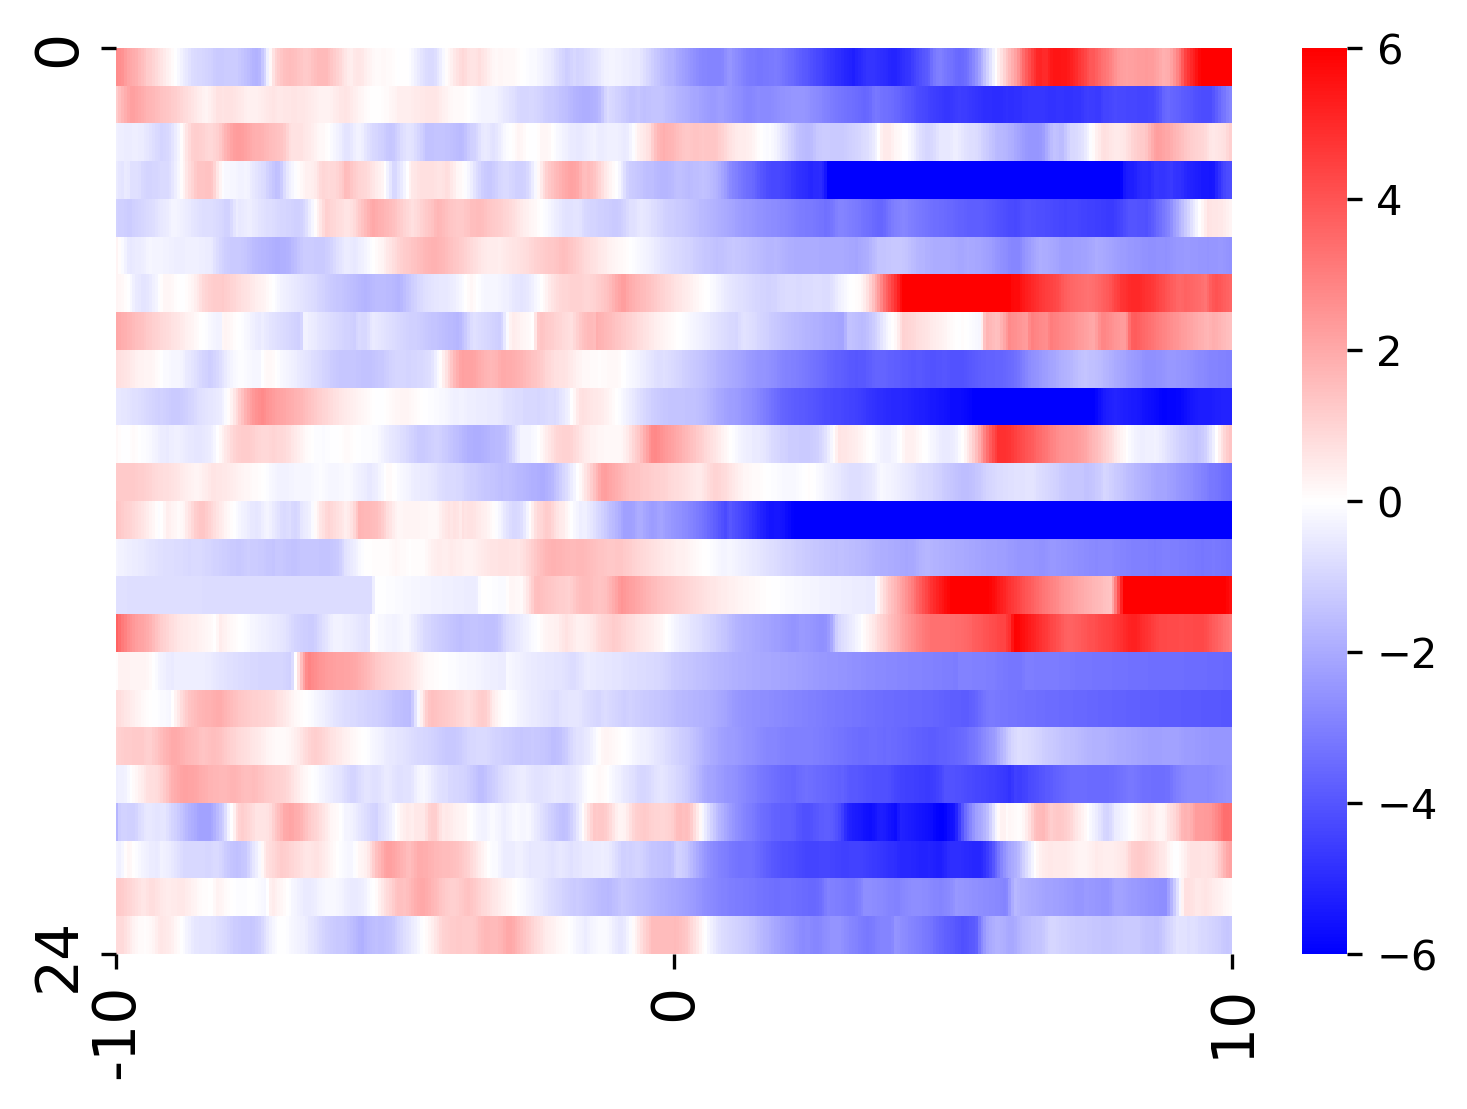

In [11]:
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 14)
ax = sb.heatmap(inhibited_hungry.iloc[:,2:], vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(inhibited_hungry.iloc[:,2:])])
ax.set_yticklabels([0, len(inhibited_hungry.iloc[:,2:])])



[Text(0, 0.5, '0'), Text(0, 2.5, '16')]

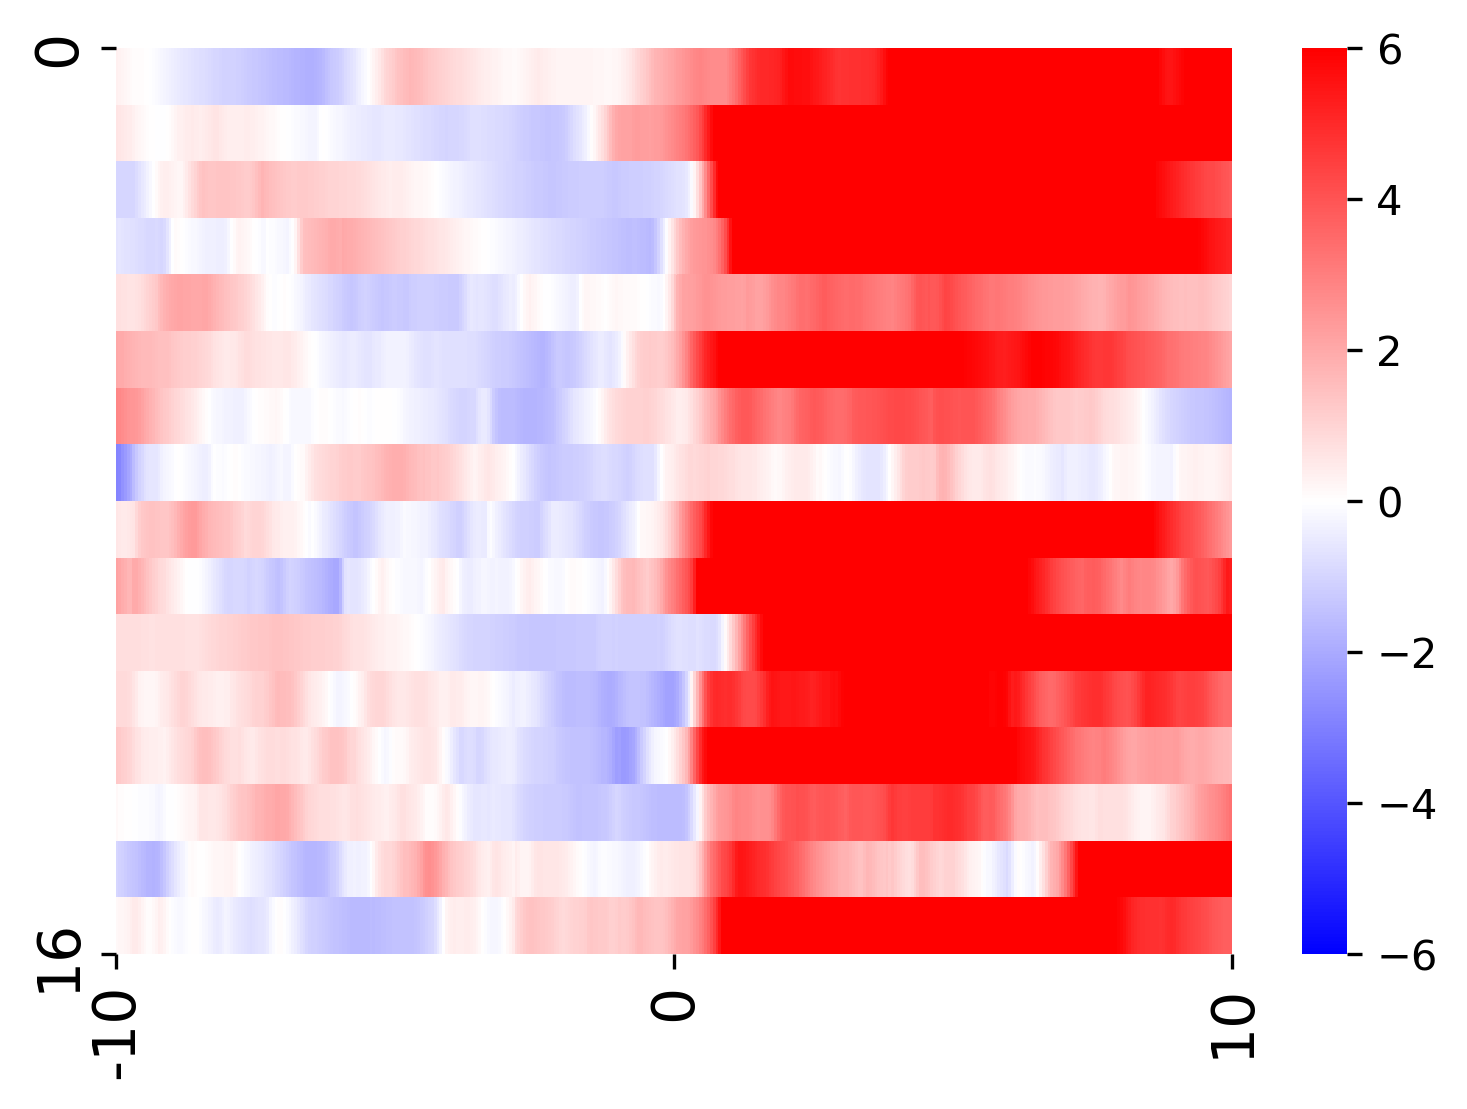

In [12]:
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 14)
ax = sb.heatmap(excited_hungry.iloc[:,2:], vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(excited_hungry.iloc[:,2:])])
ax.set_yticklabels([0, len(excited_hungry.iloc[:,2:])])

[Text(0, 0.5, '0'), Text(0, 2.5, '16')]

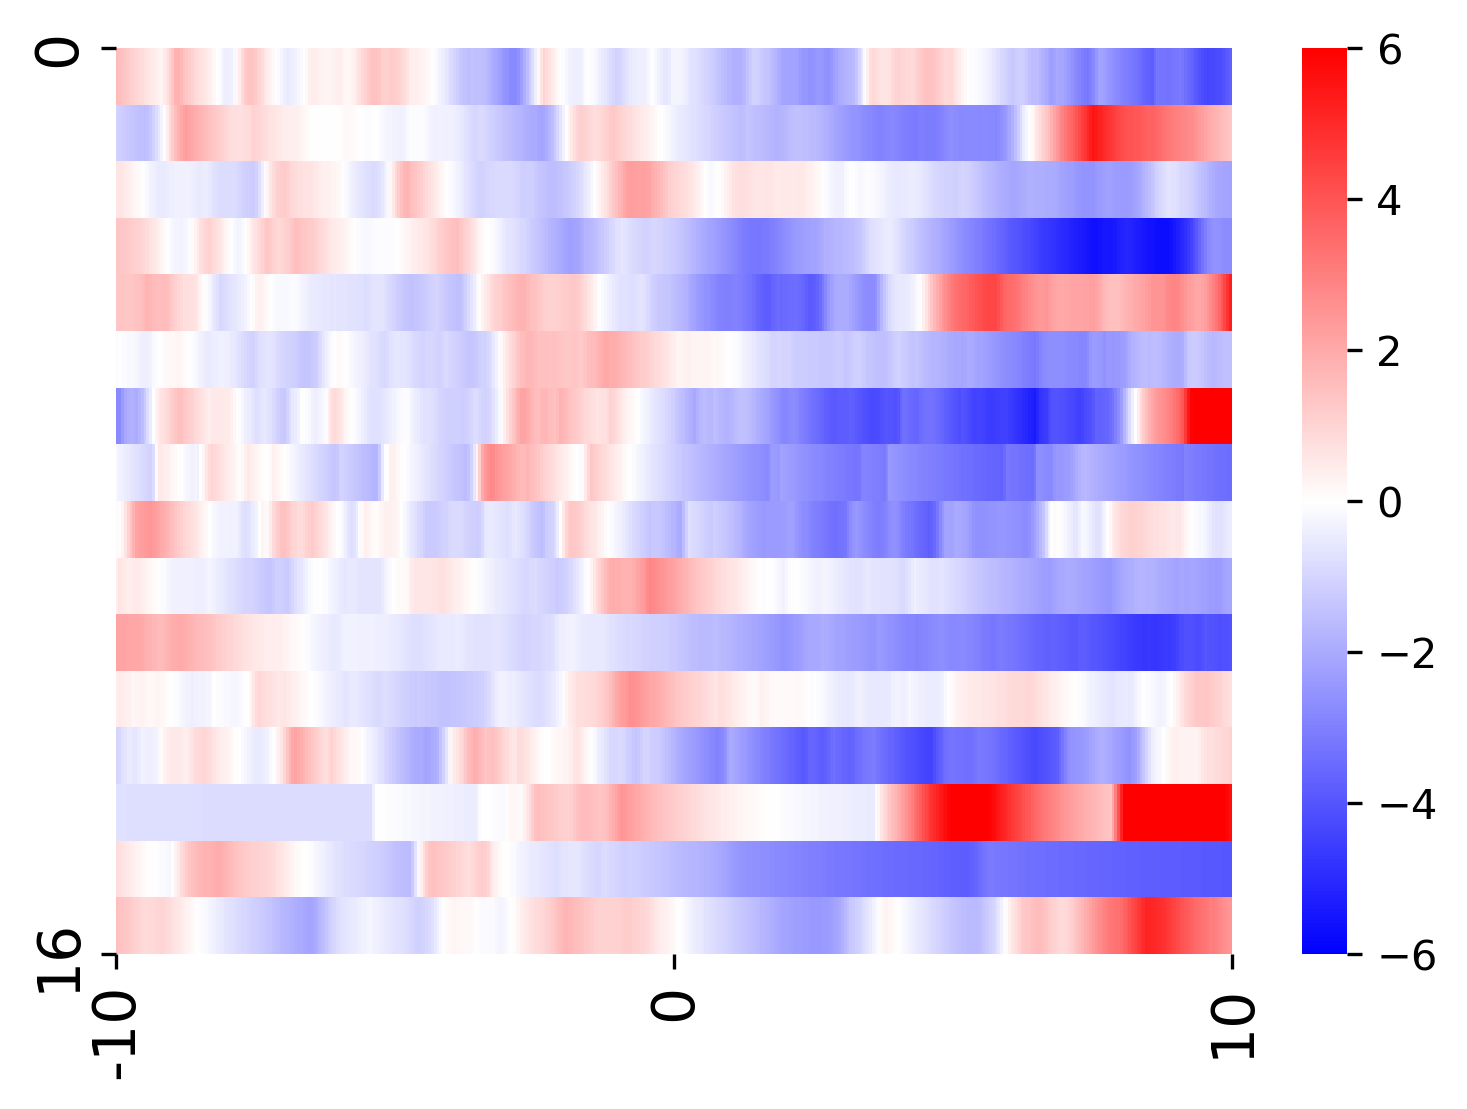

In [13]:
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 14)
ax = sb.heatmap(inhibited_satiated.iloc[:,2:], vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(inhibited_satiated.iloc[:,2:])])
ax.set_yticklabels([0, len(inhibited_satiated.iloc[:,2:])])

[Text(0, 0.5, '0'), Text(0, 2.5, '20')]

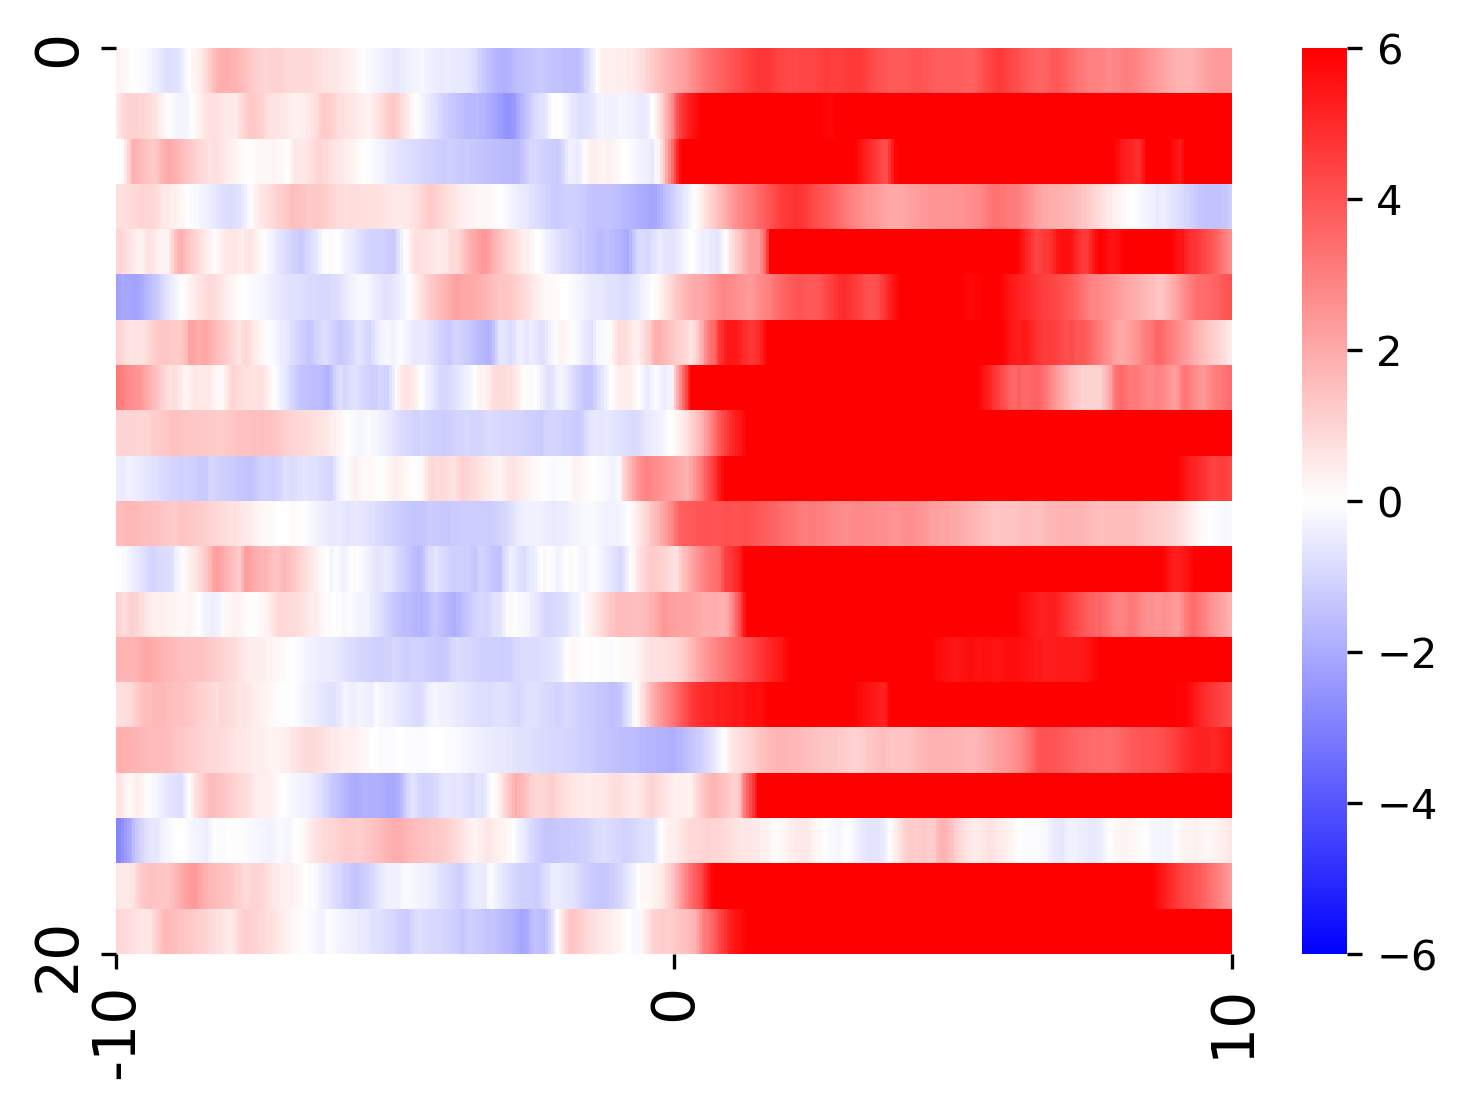

In [14]:
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 14)
ax = sb.heatmap(excited_satiated.iloc[:,2:], vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(excited_satiated.iloc[:,2:])])
ax.set_yticklabels([0, len(excited_satiated.iloc[:,2:])])

In [15]:
excited_hungry_mean = excited_hungry.iloc[:,2:].mean(axis=0)
excited_hungry_sem = excited_hungry.iloc[:,2:].sem(axis=0)
inhibited_hungry_mean = inhibited_hungry.iloc[:,2:].mean(axis=0)
inhibited_hungry_sem = inhibited_hungry.iloc[:,2:].sem(axis=0)
excited_satiated_mean = excited_satiated.iloc[:,2:].mean(axis=0)
excited_satiated_sem = excited_satiated.iloc[:,2:].sem(axis=0)
inhibited_satiated_mean = inhibited_satiated.iloc[:,2:].mean(axis=0)
inhibited_satiated_sem = inhibited_satiated.iloc[:,2:].sem(axis=0)


16

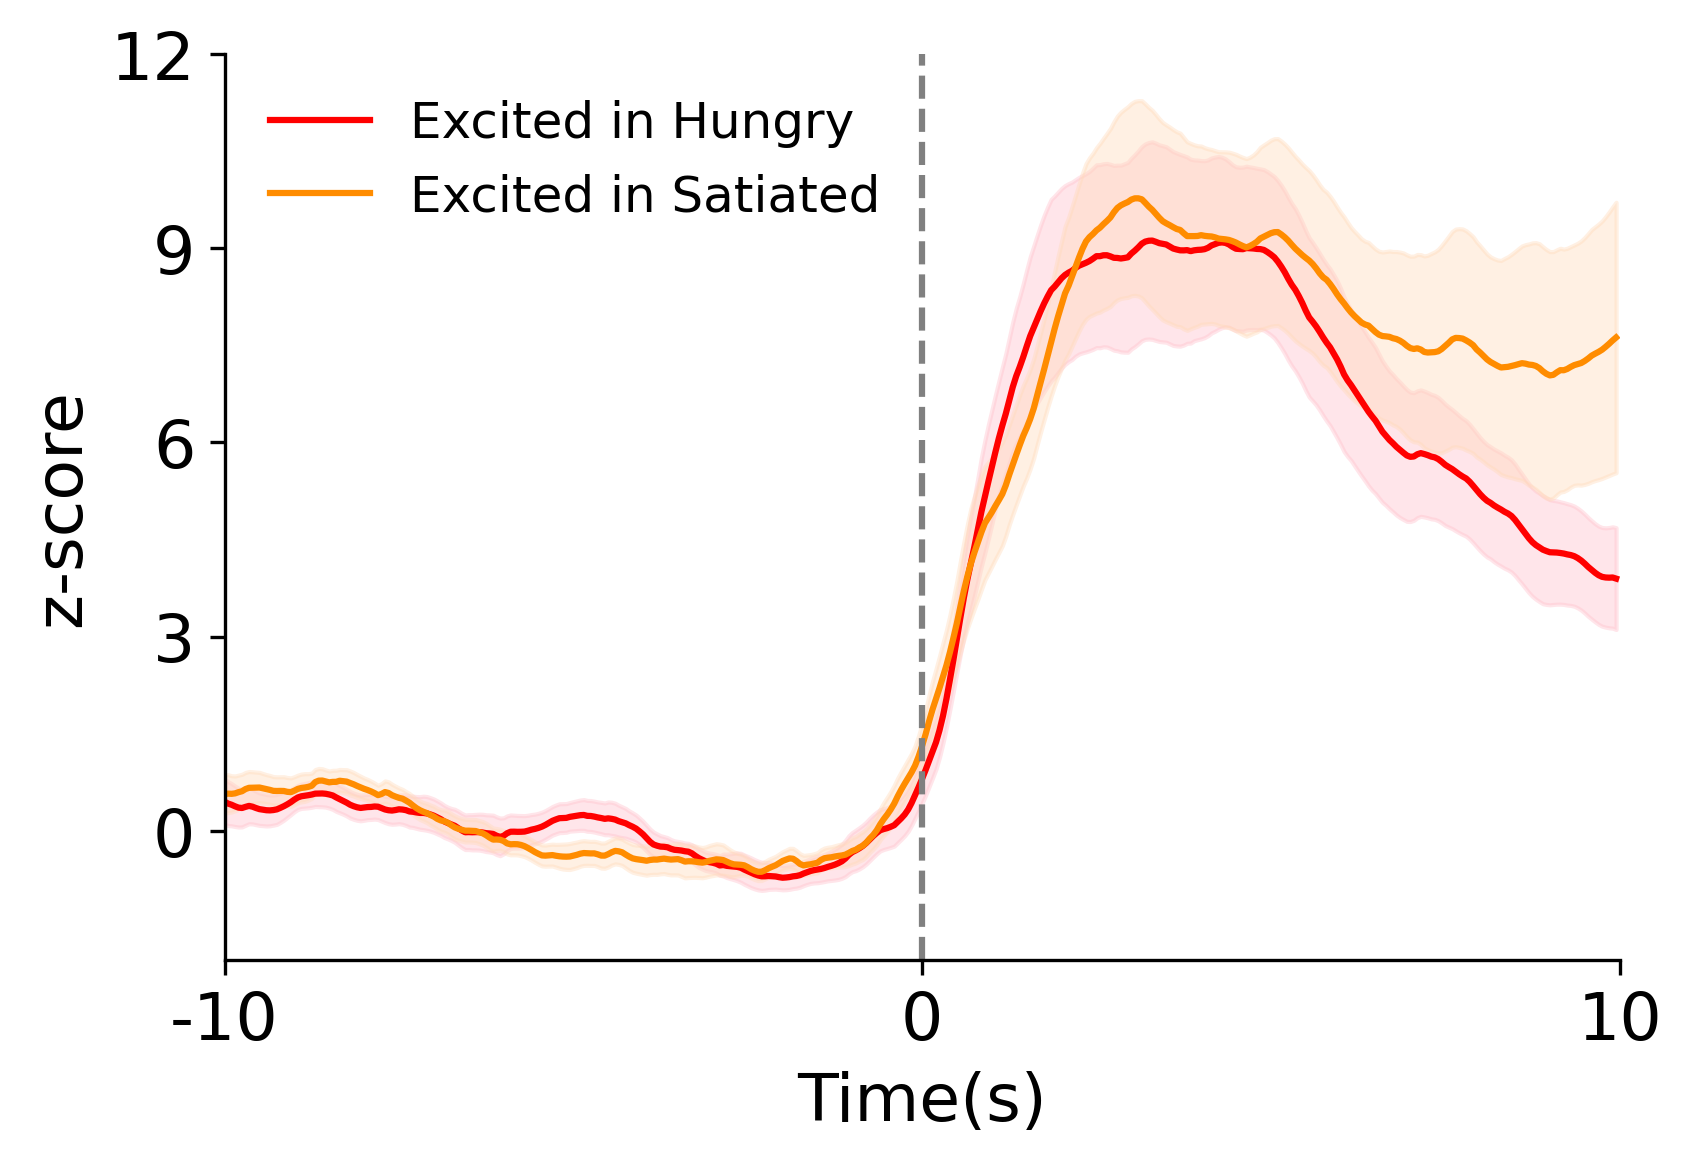

In [16]:

x=np.arange(Bins)
y=excited_hungry_mean
z=excited_satiated_mean
erry = excited_hungry_sem
errz = excited_satiated_sem
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.plot(x, z, label = 'Excited in Satiated', color = 'darkorange')
ax.fill_between(x, y-erry, y+erry, color='pink', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='peachpuff', alpha = 0.4)
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-2, 12)
#ax.set_ylim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry)

24

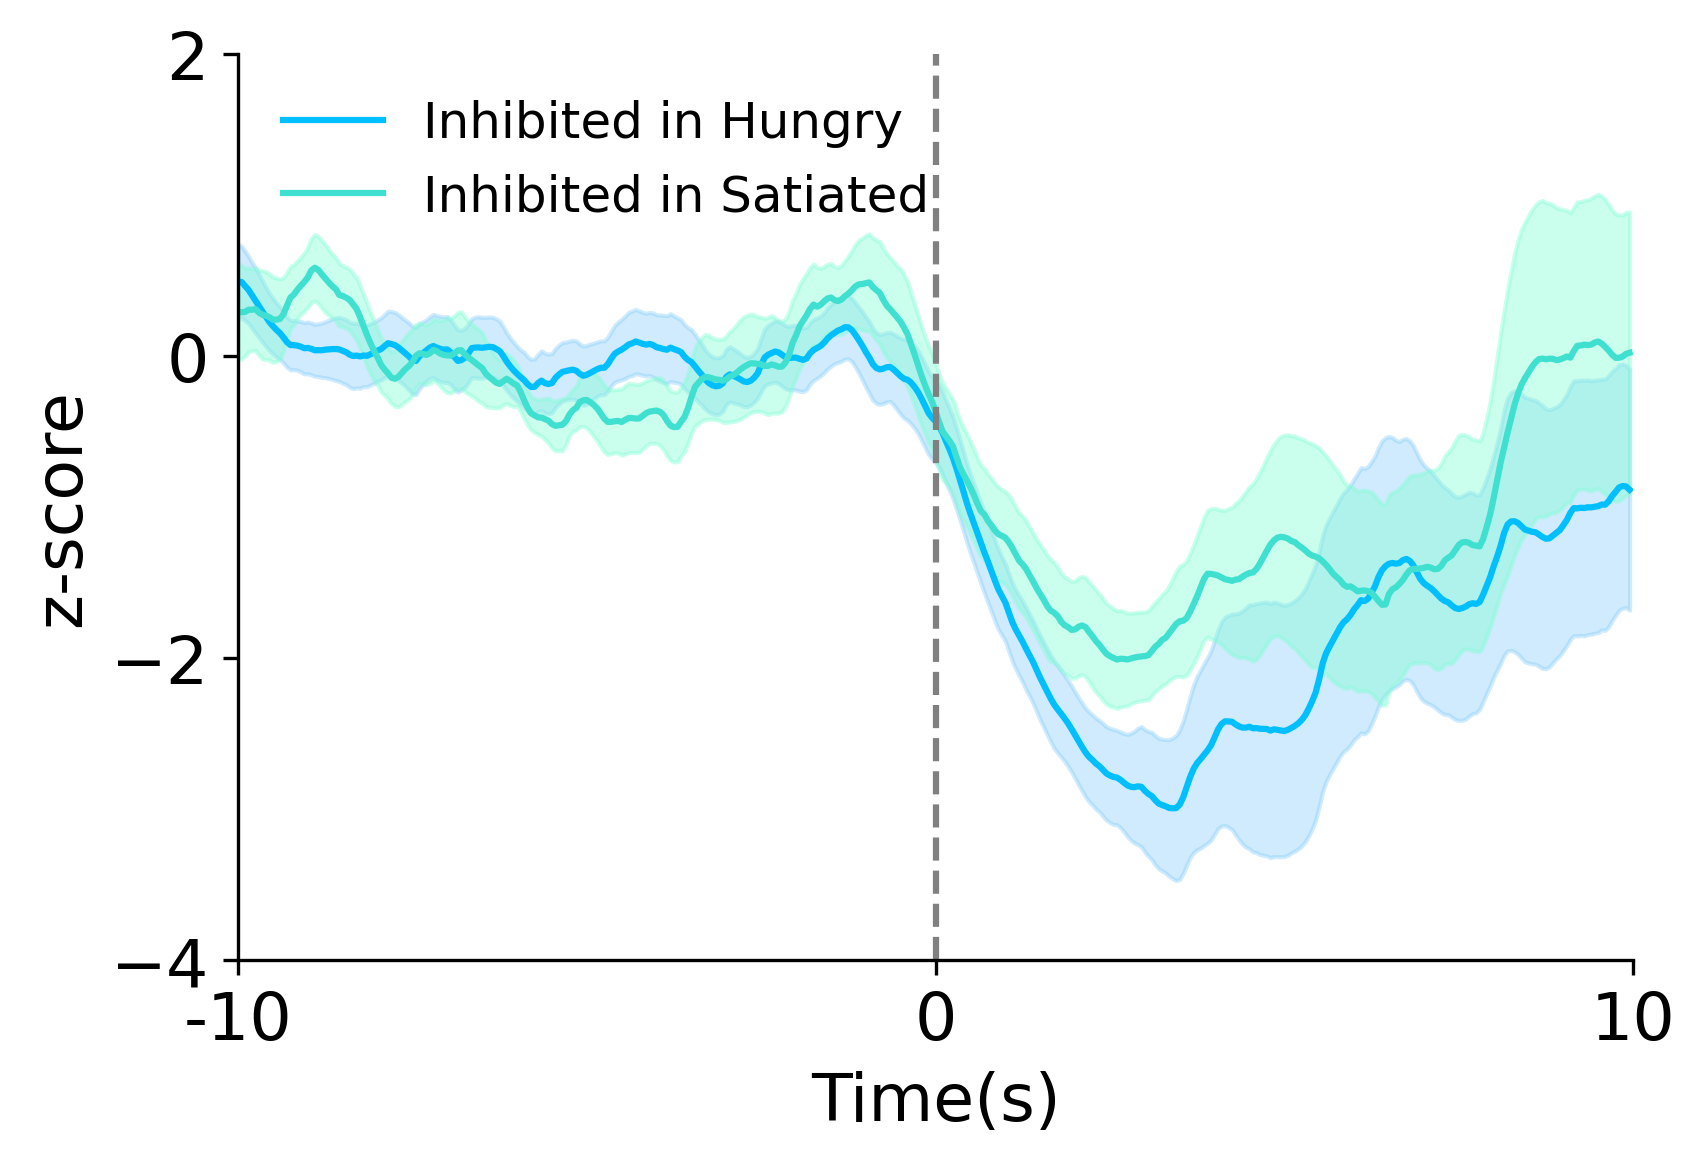

In [17]:
x=np.arange(Bins)
y=inhibited_hungry_mean
z=inhibited_satiated_mean
erry = inhibited_hungry_sem
errz = inhibited_satiated_sem
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue')
ax.plot(x, z, label = 'Inhibited in Satiated', color = 'turquoise')
ax.fill_between(x, y-erry, y+erry, color='lightskyblue', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='aquamarine', alpha = 0.4)
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-4, 2)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize= 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry)

In [18]:
excited_hungry_insatiated_mean = tracesatiated.iloc[excited_hungry_where, 1:].mean(axis=0)
excited_hungry_insatiated_sem =  tracesatiated.iloc[excited_hungry_where, 1:].sem(axis=0)

16

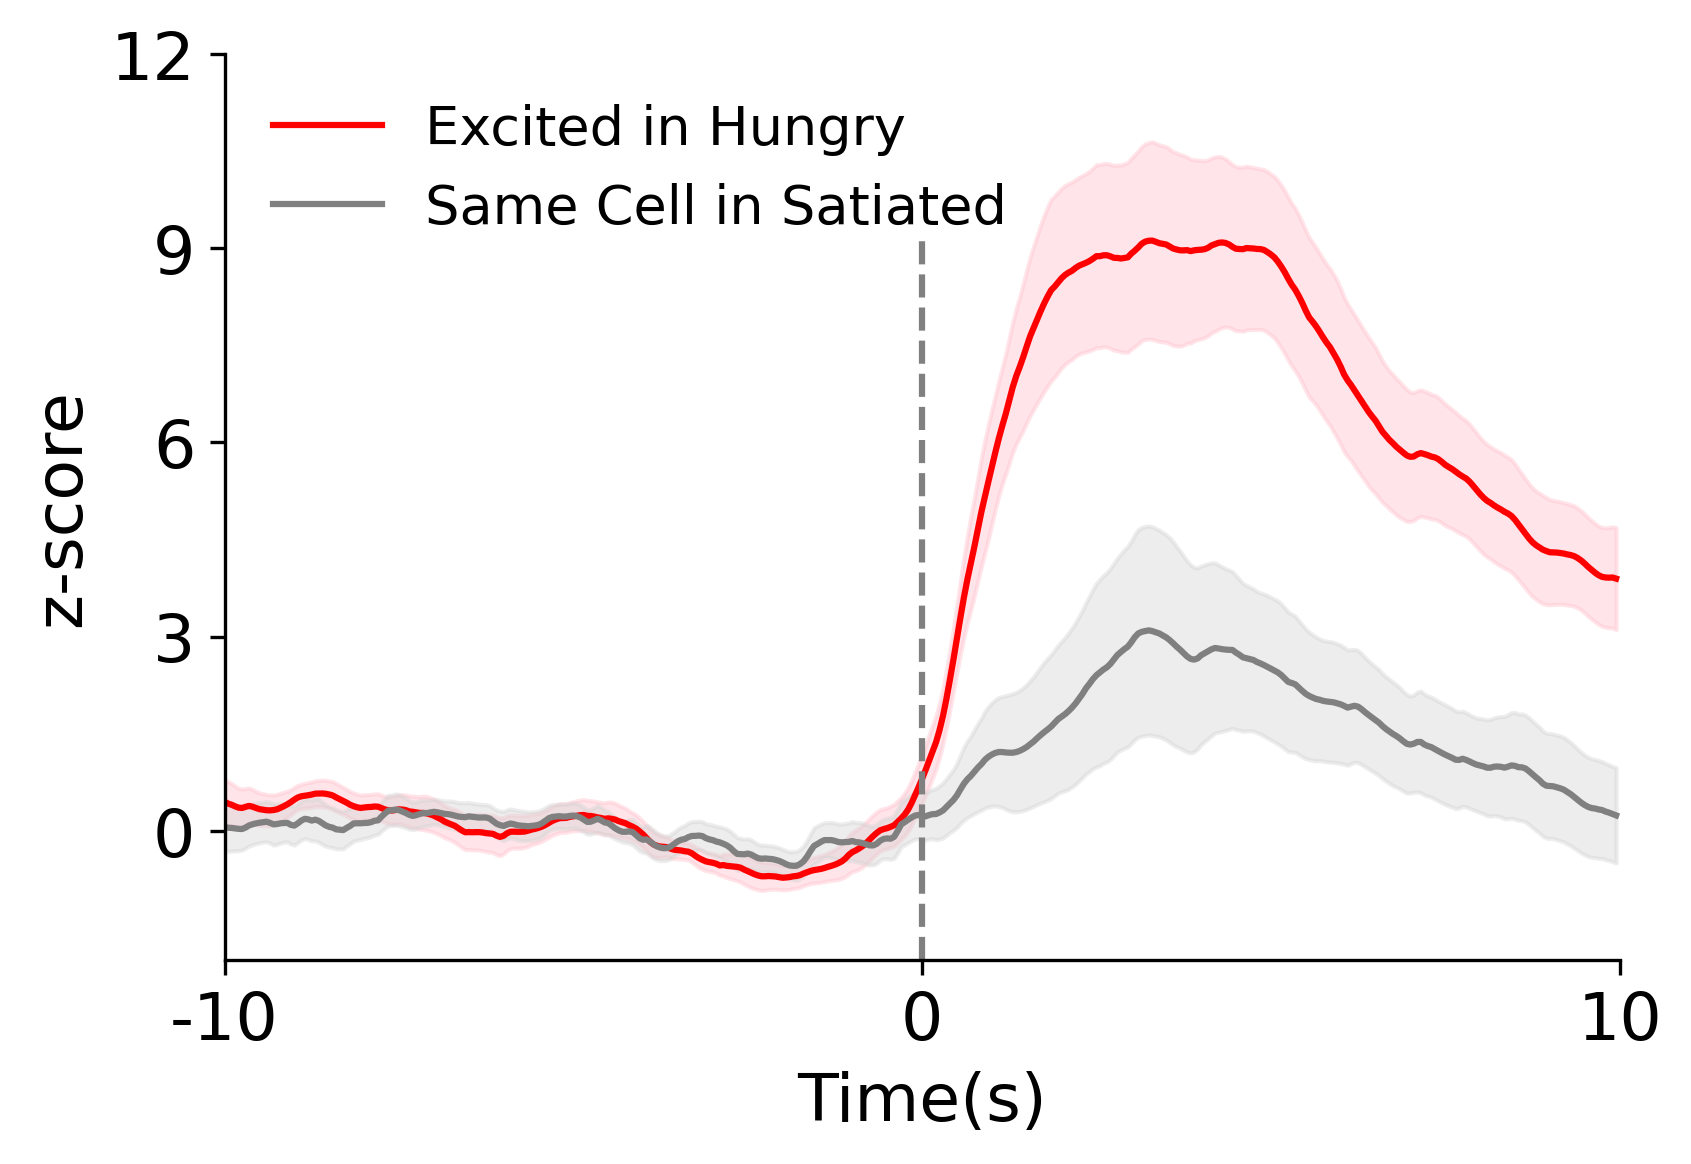

In [19]:
x=np.arange(Bins)
y=excited_hungry_mean
z=excited_hungry_insatiated_mean
erry = excited_hungry_sem
errz = excited_hungry_insatiated_sem
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.plot(x, z, label = 'Same Cell in Satiated', color = 'grey')
ax.fill_between(x, y-erry, y+erry, color='pink', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='lightgrey', alpha = 0.4)
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-2, 12)
ax.axvline(int((Bins/2)), ymax=0.8, color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry)

In [20]:
inhibited_hungry_insatiated_mean = tracesatiated.iloc[inhibited_hungry_where,1:].mean(axis=0)
inhibited_hungry_insatiated_sem =  tracesatiated.iloc[inhibited_hungry_where,1:].sem(axis=0)

24

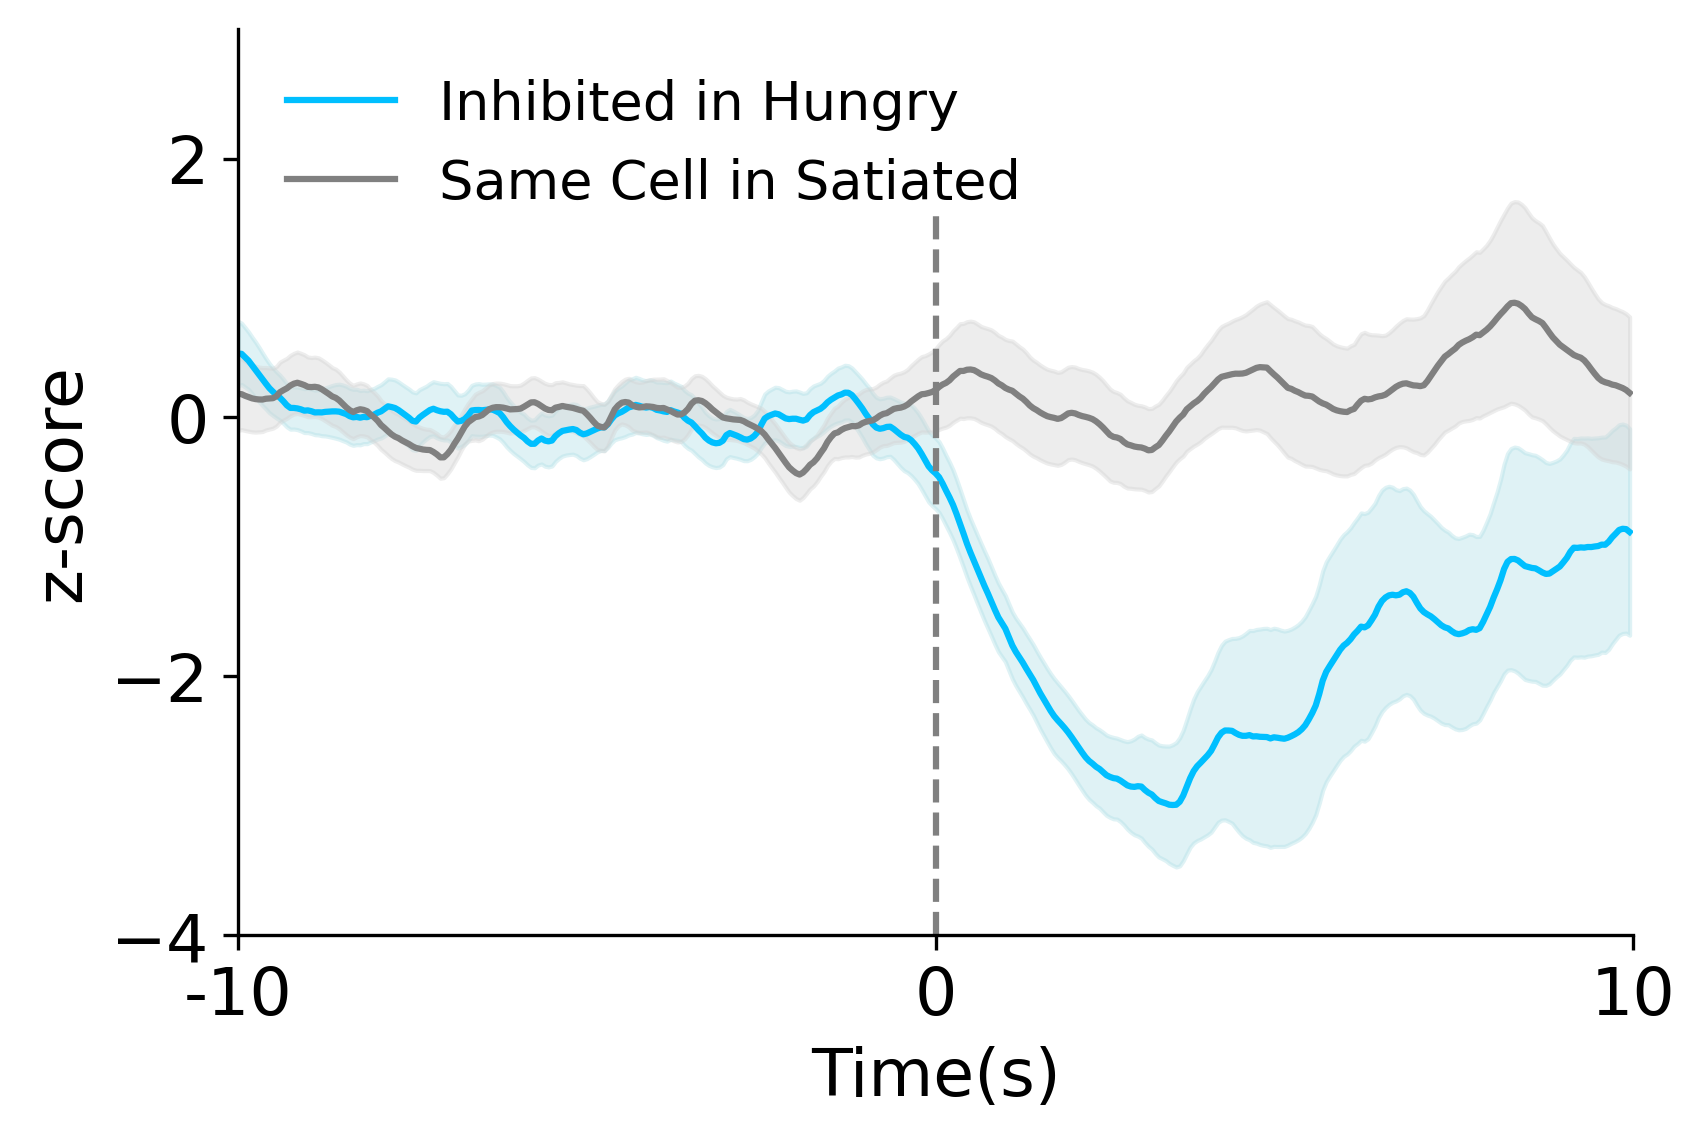

In [21]:
x=np.arange(Bins)
y=inhibited_hungry_mean
z=inhibited_hungry_insatiated_mean
erry = inhibited_hungry_sem
errz = inhibited_hungry_insatiated_sem
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.plot(x, y, label = 'Inhibited in Hungry', color='deepskyblue')
ax.plot(x, z, label = 'Same Cell in Satiated', color='grey')
ax.fill_between(x, y-erry, y+erry, color = 'powderblue', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color = 'lightgrey', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-4, 3)
ax.axvline(int((Bins/2)), ymax=0.8,color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry)

In [53]:
excited_satiated_inhungry_mean = tracehungry.iloc[excited_satiated_where,1:].mean(axis=0)
excited_satiated_inhungry_sem =  tracehungry.iloc[excited_satiated_where,1:].sem(axis=0)

20

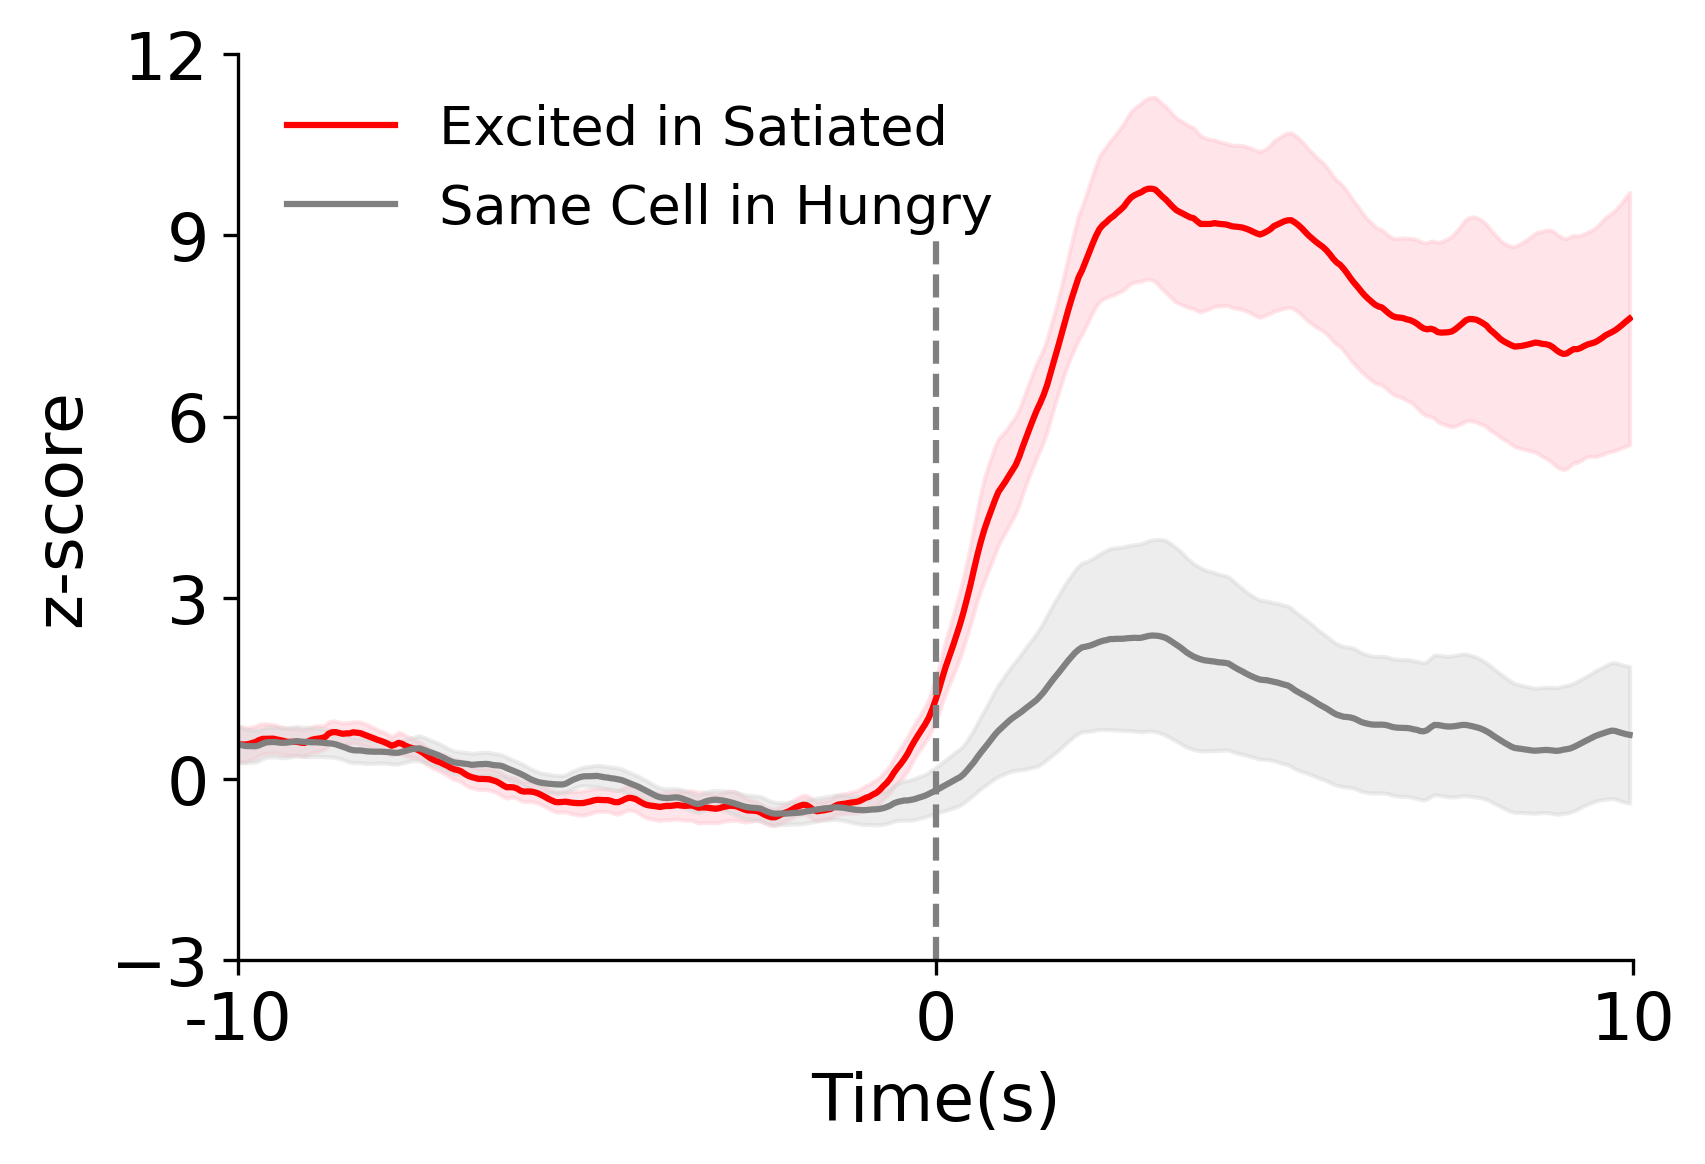

In [55]:
x=np.arange(Bins)
y=excited_satiated_mean
z=excited_satiated_inhungry_mean
erry = excited_satiated_sem
errz = excited_satiated_inhungry_sem
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.plot(x, y, label = 'Excited in Satiated',color='red')
ax.plot(x, z, label = 'Same Cell in Hungry',color='grey')
ax.fill_between(x, y-erry, y+erry, color = 'pink', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color = 'lightgrey', alpha = 0.4)
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-3, 12)
ax.axvline(int((Bins/2)), ymax = 0.8,color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_satiated)

In [23]:
inhibited_satiated_inhungry_mean = tracehungry.iloc[inhibited_satiated_where, 1:].mean(axis=0)
inhibited_satiated_inhungry_sem =  tracehungry.iloc[inhibited_satiated_where,1:].sem(axis=0)

16

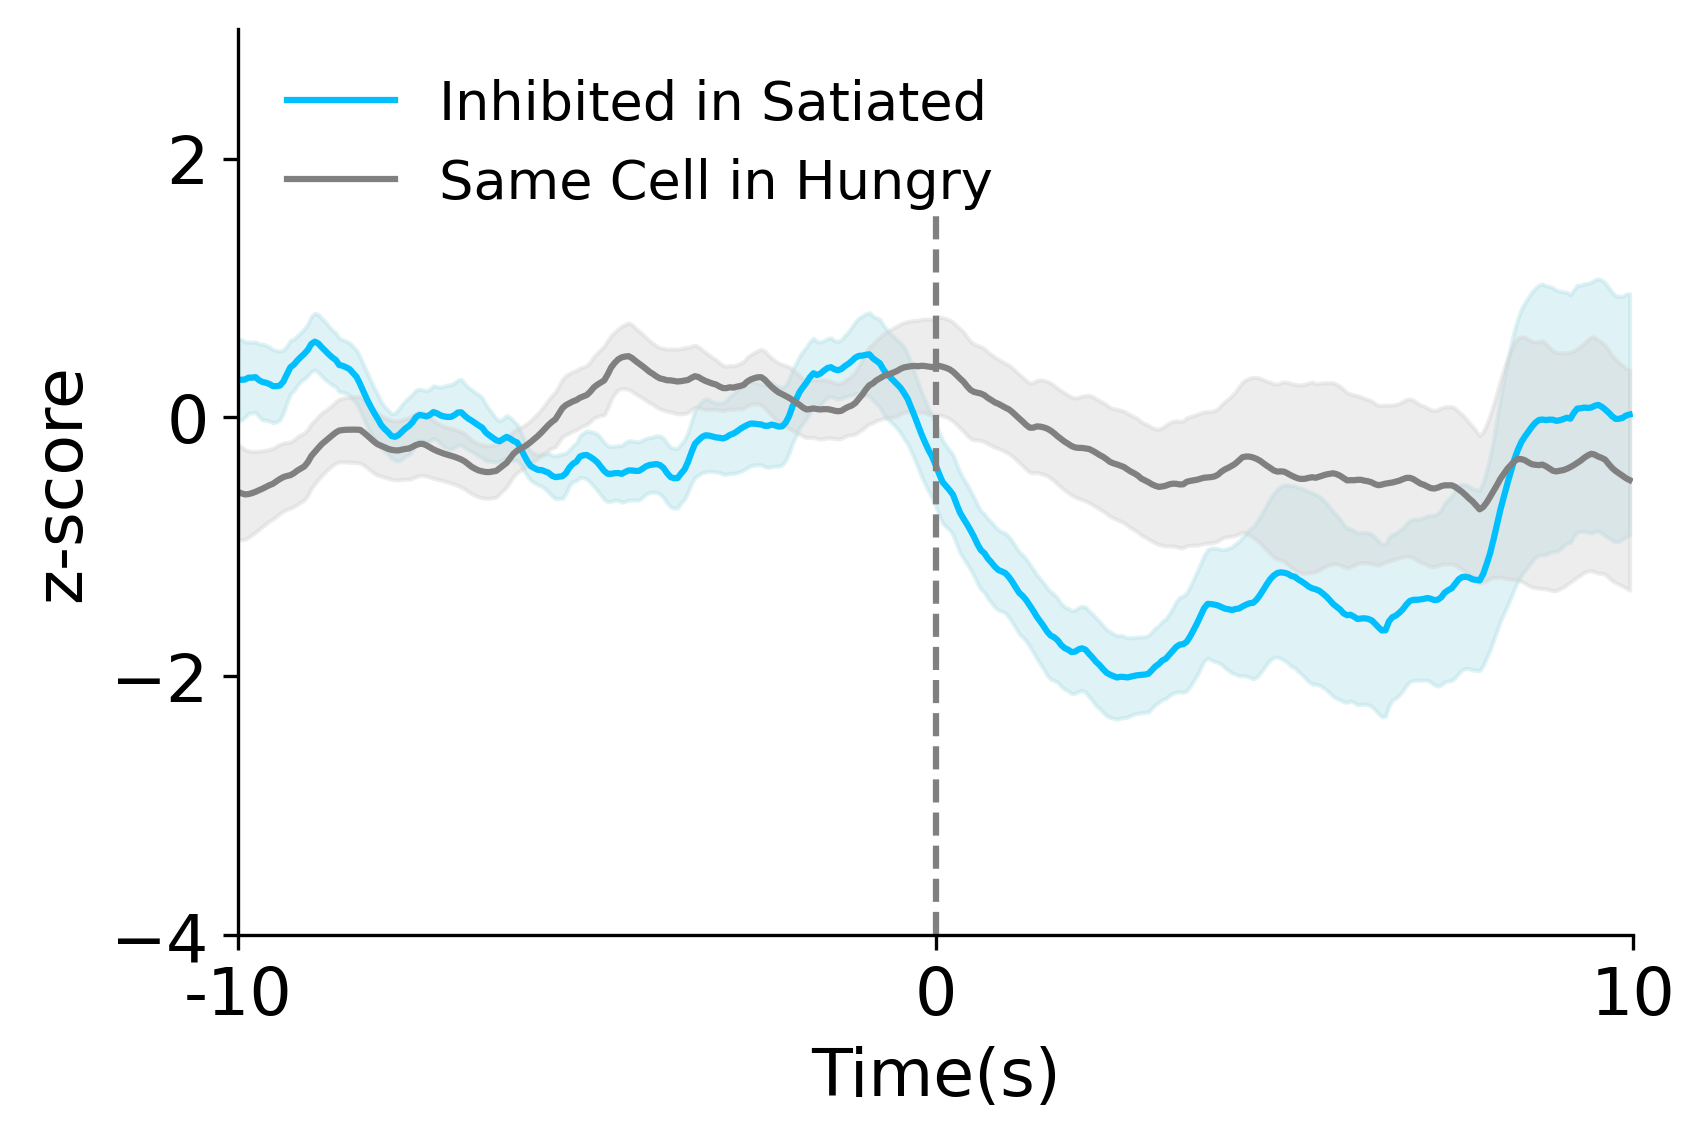

In [24]:
x=np.arange(Bins)
y=inhibited_satiated_mean
z=inhibited_satiated_inhungry_mean
erry = inhibited_satiated_sem
errz = inhibited_satiated_inhungry_sem
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.plot(x, y, label = 'Inhibited in Satiated',color='deepskyblue')
ax.plot(x, z, label = 'Same Cell in Hungry',color='grey')
ax.fill_between(x, y-erry, y+erry, color = 'powderblue', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color = 'lightgrey', alpha = 0.4)
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-4, 3)
ax.axvline(int((Bins/2)), ymax = 0.8, color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_satiated)

In [58]:
tracehungry=tracehungry.iloc[:,1:]
tracesatiated=tracesatiated.iloc[:,1:]
tracehungry.reset_index(inplace=True)
tracesorted_hungry = tracehungry.sort_values(by=int((Bins/2)), axis =0)

In [59]:

tracesatiated.reset_index(inplace=True)
tracesorted_satiated = tracesatiated.sort_values(by=int((Bins/2)), axis =0)

548 neurons in Satiated


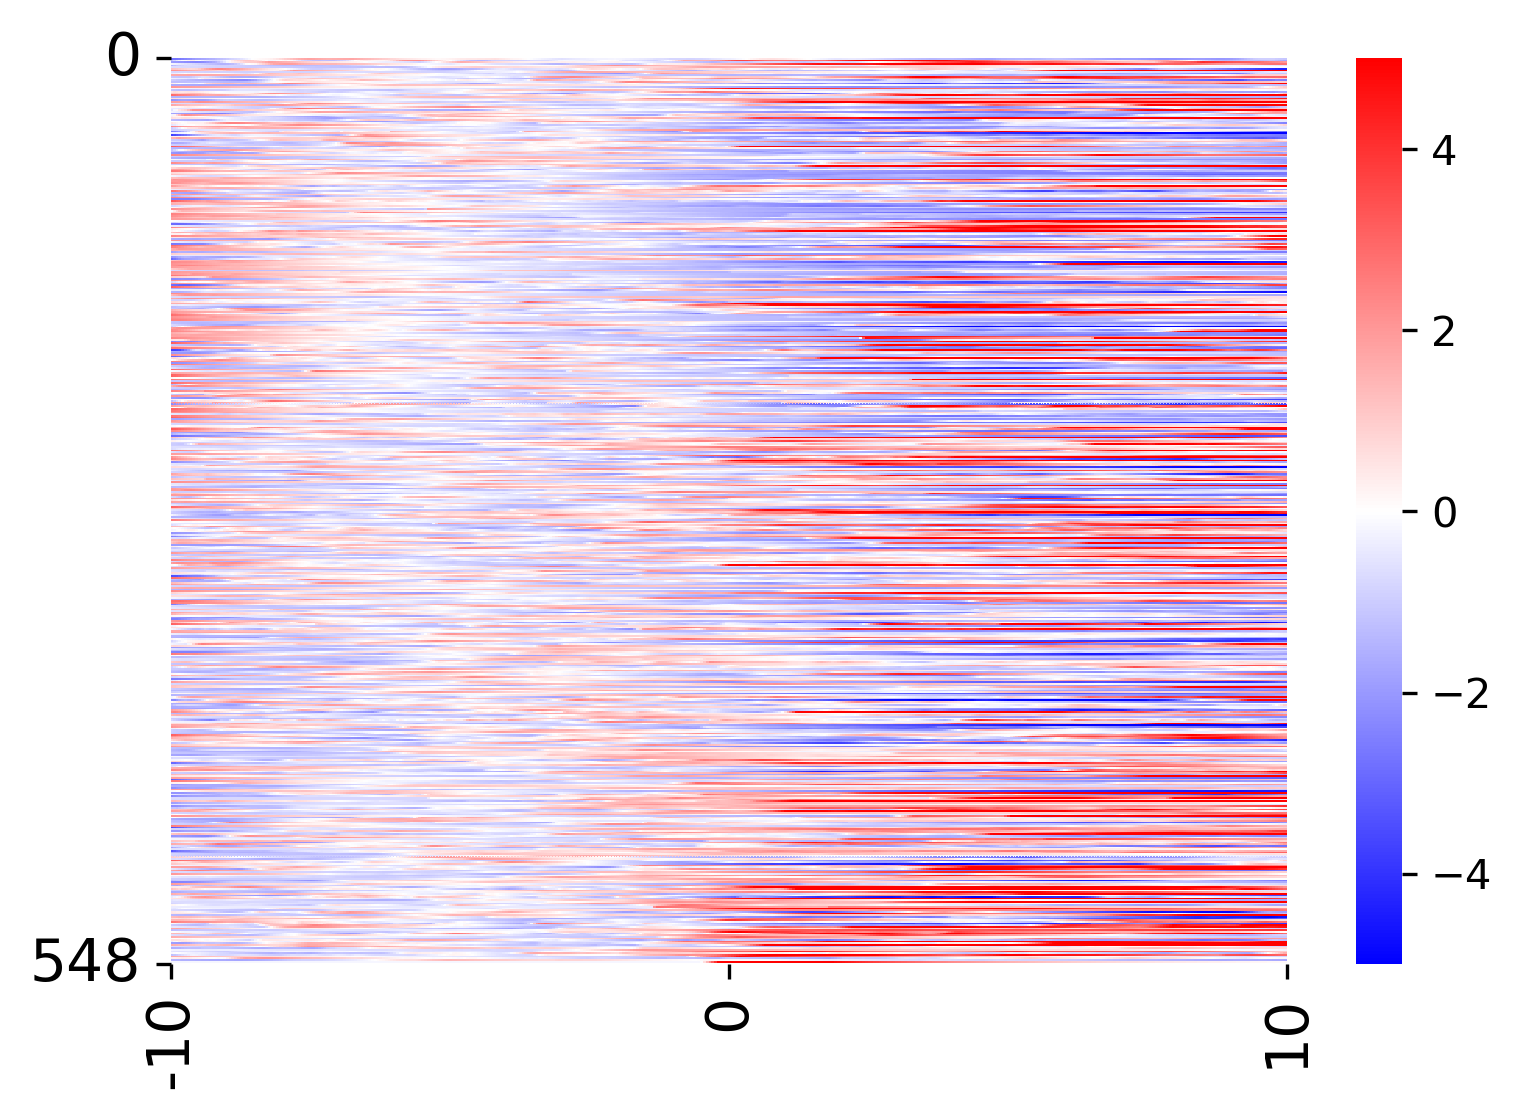

In [60]:
cross_hungry_satiated = tracesatiated.iloc[tracesorted_hungry.index, 1:]
cross_hungry_satiated
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 14)
ax = sb.heatmap(cross_hungry_satiated, vmin = -5, vmax= 5, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(cross_hungry_satiated)])
ax.set_yticklabels([0, len(cross_hungry_satiated)])
print(str(len(tracesatiated)) + ' neurons in Satiated')

548 neurons in Satiated


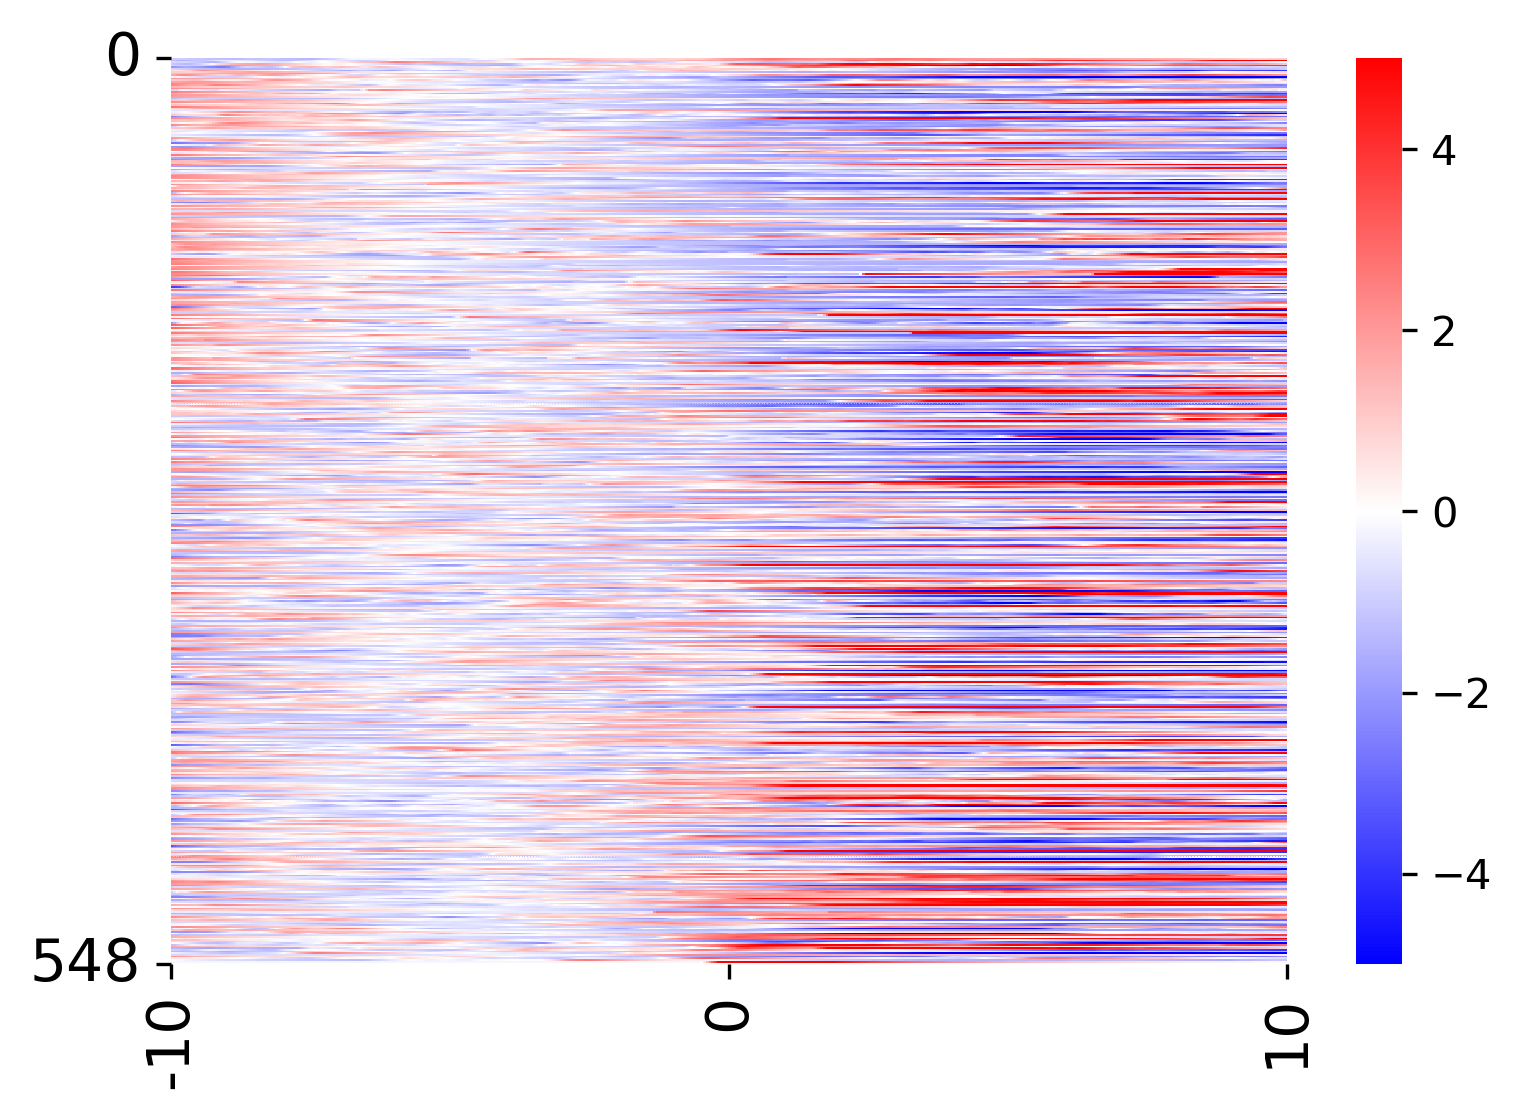

In [61]:
cross_satiatde_hungry = tracehungry.iloc[tracesorted_satiated.index, 1:]
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 14)
ax = sb.heatmap(cross_satiatde_hungry, vmin = -5, vmax= 5, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(cross_satiatde_hungry)])
ax.set_yticklabels([0, len(cross_satiatde_hungry)])
print(str(len(tracesatiated)) + ' neurons in Satiated')

In [62]:
tracesatiated_mean = tracesatiated.iloc[:,1:].mean(axis=0)#.dropna(axis=0))
tracesatiated_sem = tracesatiated.iloc[:,1:].sem(axis=0)#.dropna(axis=0))
tracehungry_mean = tracehungry.iloc[:,1:].mean(axis=0)#.dropna(axis=0)
tracehungry_sem = tracehungry.iloc[:,1:].sem(axis=0)#.dropna(axis=0)

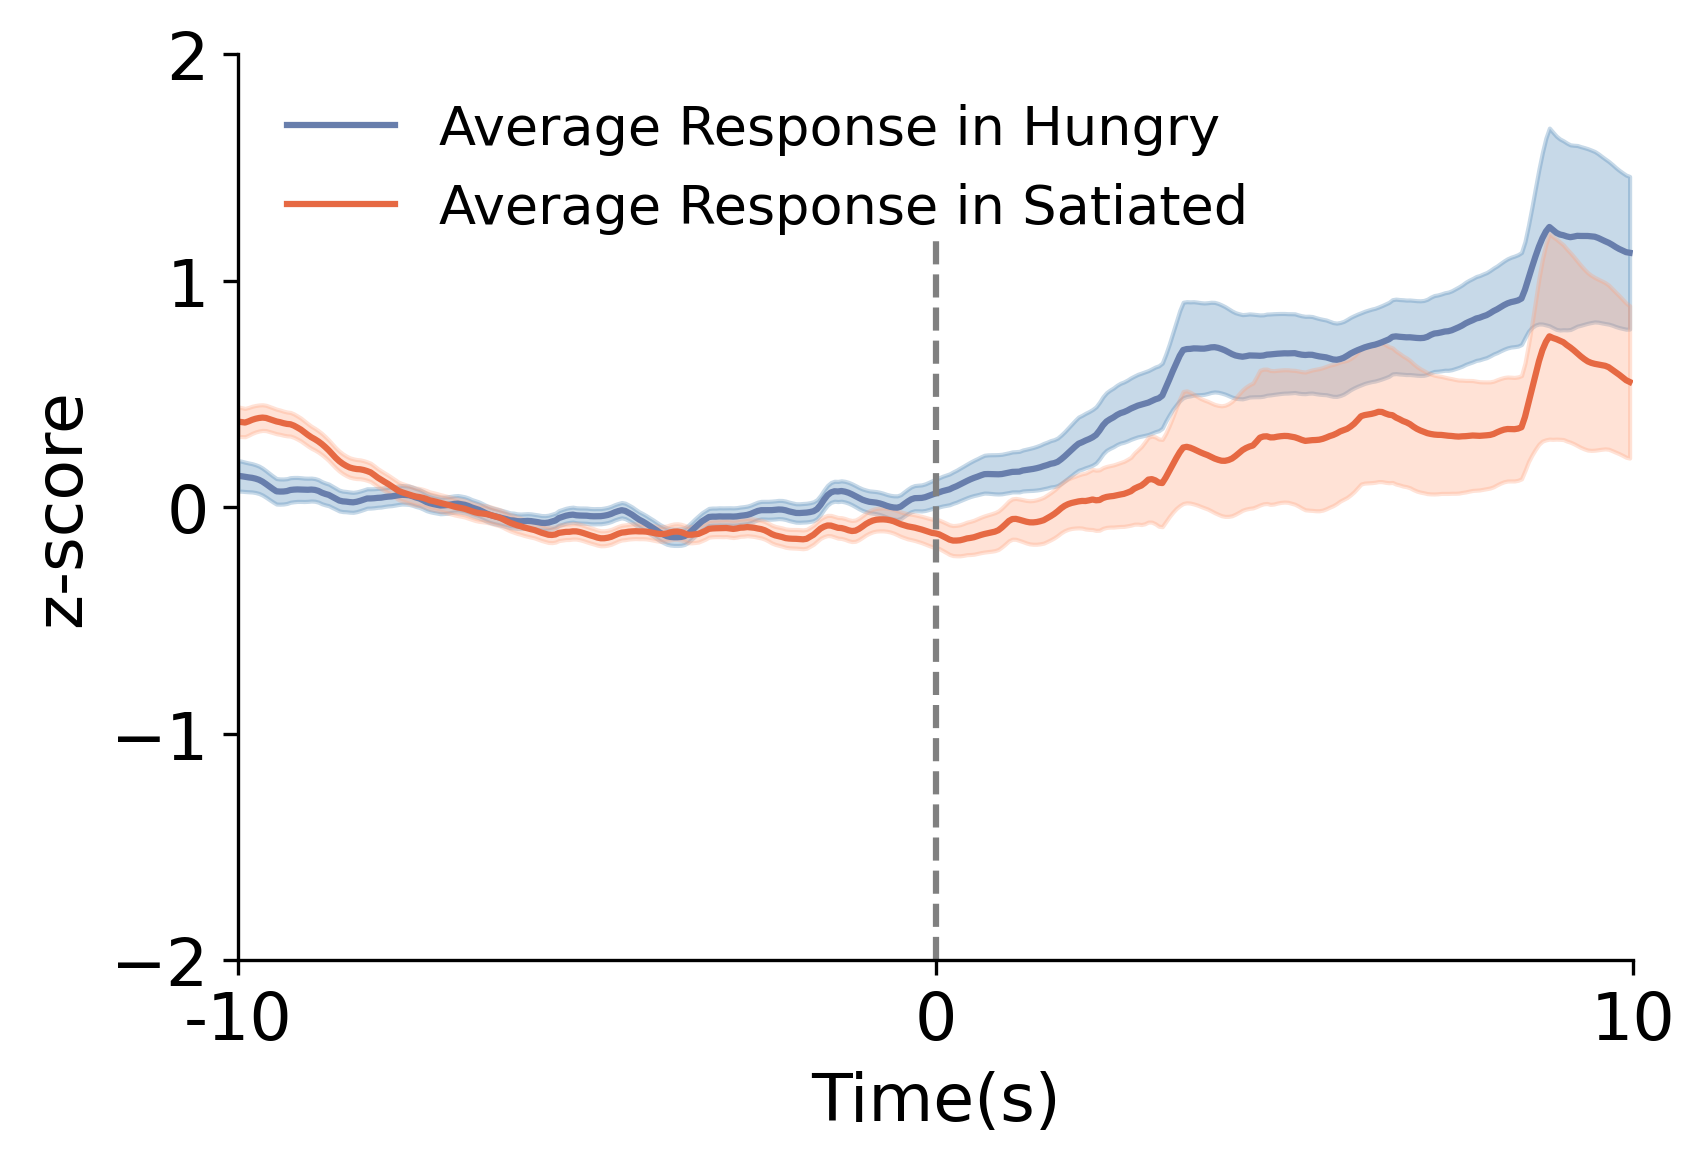

In [64]:
x=np.arange(Bins)
y=tracesatiated_mean
z=tracehungry_mean
erry = tracesatiated_sem
errz = tracehungry_sem
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.plot(x, y, label = 'Average Response in Hungry', color = '#687eac')
ax.plot(x, z, label = 'Average Response in Satiated', color = '#e66943')
ax.fill_between(x, y-erry, y+erry, color='steelblue', alpha = 0.3)
ax.fill_between(x, z-errz, z+errz, color='lightsalmon', alpha = 0.3)
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-2,2)
ax.tick_params(labelsize = 16)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--', ymax = 0.8)
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#len(excited_hungry)

In [153]:
hungrycells = np.append(excited_hungry_where, inhibited_hungry_where)
satiatedcells = np.append(excited_satiated_where, inhibited_satiated_where)

In [154]:
len(np.intersect1d(hungrycells, satiatedcells))

6

In [155]:
len((satiatedcells))

36

In [156]:
len((hungrycells))

40

# Adding animals IDs

In [222]:
tracehungry = pd.DataFrame()
animalid = pd.DataFrame()

for n in range(len(os.listdir(hungry_dir))):
    f = pd.read_pickle(os.path.join(hungry_dir, os.listdir(hungry_dir)[n]))
    animalid = pd.DataFrame(np.tile(n,len(f)-2), columns = ['animal'])
    cueonset = np.array(np.where(np.diff(np.concatenate(([0],f.loc['cue']>0)))>0)[0])
    start = cueonset-FrameRange
    trace = f[:(len(f)-2)]
    trace = (trace-trace.mean(axis=0))/trace.mean(axis=0)
    tracenew = pd.DataFrame(0, index = trace.index, columns= np.arange(TotalFrame))
    for i in range(TotalFrame):
        tracenew.iloc[:,i] = trace.iloc[:,start+i].mean(axis=1)
    tracebin = tracenew.groupby(pd.cut(tracenew.columns,Bins),axis=1).mean()
    tracebin.columns = np.arange(0,Bins)
    tracezscore = tracebin.sub(tracebin.iloc[:,0:int((Bins/2))].mean(axis=1),axis = 0).divide(tracebin.iloc[:,0:int((Bins/2))].std(axis=1),axis=0)
    tracezscore.insert(0, 'animal', animalid.values)
    tracehungry = tracehungry.append(tracezscore)

In [223]:
tracesatiated = pd.DataFrame()
animalid = pd.DataFrame()

for n in range(len(os.listdir(satiated_dir))):
    f = pd.read_pickle(os.path.join(satiated_dir, os.listdir(satiated_dir)[n]))
    animalid = pd.DataFrame(np.tile(n,len(f)-2), columns = ['animal'])
    cueonset = np.array(np.where(np.diff(np.concatenate(([0],f.loc['cue']>0)))>0)[0])
    start = cueonset-FrameRange
    trace = f[:(len(f)-2)]
    trace = (trace-trace.mean(axis=0))/trace.mean(axis=0)
    tracenew = pd.DataFrame(0, index = trace.index, columns= np.arange(TotalFrame))
    for i in range(TotalFrame):
        tracenew.iloc[:,i] = trace.iloc[:,start+i].mean(axis=1)
    tracebin = tracenew.groupby(pd.cut(tracenew.columns,Bins),axis=1).mean()
    tracebin.columns = np.arange(0,Bins)
    tracezscore = tracebin.sub(tracebin.iloc[:,0:int((Bins/2))].mean(axis=1),axis = 0).divide(tracebin.iloc[:,0:int((Bins/2))].std(axis=1),axis=0)
    tracezscore.insert(0, 'animal', animalid.values)
    tracesatiated = tracesatiated.append(tracezscore)

In [224]:
os.listdir(hungry_dir)

['1I5_Hungry.pkl',
 '1S5_Hungry.pkl',
 '2I5_Hungry.pkl',
 '2S5_Hungry.pkl',
 '2Z4_Hungry.pkl',
 '6S5_Hungry.pkl']

In [226]:
tracehungry.iloc[excited_hungry_where[0]]

animal         0         1         2         3         4         5  \
49        0  0.342515  0.299781  0.255503  0.206535  0.155874  0.113594   
84        1 -0.741378 -0.535403 -0.400591 -0.366358 -0.555031 -0.553119   
13        2 -0.957388 -0.958418 -0.960143 -0.977648 -0.982409 -0.978890   
17        2 -0.628075 -0.600636 -0.627155 -0.657748 -0.688719 -0.718805   
0         3  2.043608  2.010972  1.971160  1.909079  1.862545  1.817319   
75        4 -1.304279 -1.271194 -1.103265 -0.976414 -0.874889 -0.832298   
160       4  0.573140  0.523667  0.499219  0.501155  0.526600  0.572171   
184       4  1.024977  0.961711  0.906152  0.859470  0.818874  0.778519   
2         5  2.189337  2.079935  1.967708  1.845333  1.715901  1.714967   
3         5  0.778368  0.777113  0.774962  0.765590  0.762982  0.761313   
8         5  0.844829  0.859993  0.870377  0.860349  0.828084  0.773942   
13        5  1.310304  1.239922  1.161203  1.086033  1.026563  0.939003   
17        5  0.143179  0.074347  0.047202  0.037812  0.027586  0.010152   
32        5 -0.954341 -1.035540 -1.118582 -1.205754 -1.275461 -1.336199   
51        5  0.159154  0.199319  0.233948  0.254901  0.296063  0.381392   

            6         7         8  ...        390        391        392  \
49   0.092515  0.076327  0.062873  ...   6.601979   6.652251   6.699610   
84  -0.438145 -0.364029 -0.251566  ...   2.267666   2.232663   2.189496   
13  -0.953302 -0.819053 -0.673825  ...   4.355202   4.280049   4.271996   
17  -0.747021 -0.775132 -0.805161  ...   5.736971   5.643561   5.557817   
0    1.770899  1.718045  1.662577  ...   2.864533   2.821525   2.746020   
75  -0.706364 -0.646744 -0.574963  ...  -2.271842  -2.299401  -2.322758   
160  0.633646  0.915220  1.139993  ...   3.608299   3.466429   3.332975   
184  0.736311  0.691610  0.641082  ...  17.056780  17.009815  17.026823   
2    1.969959  2.015409  1.874583  ...   3.947111   3.931745   4.012761   
3    0.761650  0.760650  0.754622  ...  11.199083  11.211127  11.213251   
8    0.628224  0.471582  0.322116  ...   4.240704   4.107105   3.969461   
13   0.815280  0.701646  0.612659  ...   2.003108   1.949923   1.892965   
17  -0.001759 -0.019843 -0.047897  ...   2.406945   2.496735   2.587019   
32  -1.393631 -1.451343 -1.517283  ...   7.148495   6.963201   6.777823   
51   0.475931  0.503705  0.381813  ...   4.198831   4.131272   4.057576   

           393        394        395        396        397        398  \
49    6.734829   6.779842   6.887587   7.007971   7.137504   7.271102   
84    2.148873   2.161308   2.190853   2.213230   2.232547   2.232325   
13    4.266741   4.213940   4.132003   4.064872   3.986075   3.952572   
17    5.490813   5.431083   5.374616   5.315561   5.257375   5.195191   
0     2.648706   2.550750   2.452732   2.355807   2.259594   2.168504   
75   -2.333492  -2.341230  -2.334785  -2.313129  -2.296740  -2.267430   
160   3.206484   3.070385   2.929596   2.796489   2.663659   2.527504   
184  17.092289  17.189681  17.316005  17.458379  17.602936  17.725864   
2     4.157780   4.291433   4.468017   4.776303   5.106640   5.393176   
3    11.212100  11.223797  11.244710  11.281183  11.349568  11.423577   
8     3.832577   3.708843   3.607391   3.523243   3.462653   3.429827   
13    1.828093   1.771669   1.730519   1.701160   1.679205   1.663409   
17    2.671141   2.757813   2.848939   2.931022   3.003861   3.149764   
32    6.623813   6.499423   6.393158   6.302641   6.220212   6.128380   
51    3.975261   3.902369   3.850051   3.813382   3.794183   3.783150   

           399  
49    7.409998  
84    2.186162  
13    3.877277  
17    5.133438  
0     2.087889  
75   -2.223537  
160   2.384126  
184  17.814283  
2     5.303249  
3    11.495354  
8     3.441921  
13    1.636880  
17    3.323495  
32    5.998024  
51    3.763759  

[15 rows x 401 columns]

In [228]:
tracehungry.iloc[inhibited_hungry_where[0]].to_csv('Inhibited_Hungry.csv')

In [231]:
tracesatiated.iloc[inhibited_satiated_where[0]].to_csv('Inhibited_Satiated.csv')

In [232]:
tracesatiated.iloc[excited_satiated_where[0]].to_csv('Excited_Satiated.csv')